##### Copyright 2020 The TensorFlow Authors.


In [1]:
#@title Licensed under the Apache License, Version 2.0
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow Addons 层：WeightNormalization

<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://tensorflow.google.cn/addons/tutorials/layers_weightnormalization"><img src="https://tensorflow.google.cn/images/tf_logo_32px.png">在 TensorFlow.org 上查看 </a></td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/zh-cn/addons/tutorials/layers_weightnormalization.ipynb"><img src="https://tensorflow.google.cn/images/colab_logo_32px.png">在 Google Colab 中运行 </a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/zh-cn/addons/tutorials/layers_weightnormalization.ipynb"><img src="https://tensorflow.google.cn/images/GitHub-Mark-32px.png">View source on GitHub</a></td>
  <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/zh-cn/addons/tutorials/layers_weightnormalization.ipynb"><img src="https://tensorflow.google.cn/images/download_logo_32px.png">Download notebook</a></td>
</table>

## 概述

此笔记本将演示如何使用权重归一化层以及如何提升收敛。


# WeightNormalization

用于加速深度神经网络训练的一个简单的重新参数化：

Tim Salimans、Diederik P. Kingma (2016)

> 通过以这种方式重新参数化权重，我们改善了优化问题的条件，并加快了随机梯度下降的收敛速度。我们的重新参数化受到批次归一化的启发，但没有在 minibatch 中的样本之间引入任何依赖关系。这意味着我们的方法也可以成功应用于循环模型（例如 LSTM）和对噪声敏感的应用（例如深度强化学习或生成模型），而批次归一化则不太适合这类模型和应用。尽管我们的方法要简单得多，但它仍可以在很大程度上为完整批次归一化提供加速。另外，我们的方法计算开销较低，从而可以在相同的时间内执行更多优化步骤。

> https://arxiv.org/abs/1602.07868

<img src="https://raw.githubusercontent.com/seanpmorgan/tf-weightnorm/master/static/wrapped-graph.png" width="80%"><br><br>


## 设置

In [2]:
!pip install -q -U tensorflow-addons

In [3]:
import tensorflow as tf
import tensorflow_addons as tfa

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
# Hyper Parameters
batch_size = 32
epochs = 10
num_classes=10

## 构建模型

In [6]:
# Standard ConvNet
reg_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, 5, activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, 5, activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

In [7]:
# WeightNorm ConvNet
wn_model = tf.keras.Sequential([
    tfa.layers.WeightNormalization(tf.keras.layers.Conv2D(6, 5, activation='relu')),
    tf.keras.layers.MaxPooling2D(2, 2),
    tfa.layers.WeightNormalization(tf.keras.layers.Conv2D(16, 5, activation='relu')),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(120, activation='relu')),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(84, activation='relu')),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(num_classes, activation='softmax')),
])

## 加载数据

In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

     8192/170498071 [..............................] - ETA: 34:42

    40960/170498071 [..............................] - ETA: 14:08

    90112/170498071 [..............................] - ETA: 9:35 

   204800/170498071 [..............................] - ETA: 5:38

   434176/170498071 [..............................] - ETA: 3:19

   876544/170498071 [..............................] - ETA: 1:58

  1777664/170498071 [..............................] - ETA: 1:07

  3579904/170498071 [..............................] - ETA: 38s 

  6725632/170498071 [>.............................] - ETA: 22s

  9854976/170498071 [>.............................] - ETA: 16s

 12836864/170498071 [=>............................] - ETA: 13s

 15966208/170498071 [=>............................] - ETA: 11s

 19095552/170498071 [==>...........................] - ETA: 10s

 22241280/170498071 [==>...........................] - ETA: 9s 

 25370624/170498071 [===>..........................] - ETA: 8s

 28188672/170498071 [===>..........................] - ETA: 8s

 28499968/170498071 [====>.........................] - ETA: 8s

 31203328/170498071 [====>.........................] - ETA: 7s

 31645696/170498071 [====>.........................] - ETA: 7s

 34299904/170498071 [=====>........................] - ETA: 7s

 34758656/170498071 [=====>........................] - ETA: 7s

 37412864/170498071 [=====>........................] - ETA: 6s

 37904384/170498071 [=====>........................] - ETA: 6s

 40460288/170498071 [======>.......................] - ETA: 6s

 41017344/170498071 [======>.......................] - ETA: 6s

 43245568/170498071 [======>.......................] - ETA: 6s

 44113920/170498071 [======>.......................] - ETA: 6s

 46292992/170498071 [=======>......................] - ETA: 5s

 47194112/170498071 [=======>......................] - ETA: 5s

 49356800/170498071 [=======>......................] - ETA: 5s

 50323456/170498071 [=======>......................] - ETA: 5s

 52445184/170498071 [========>.....................] - ETA: 5s

 53436416/170498071 [========>.....................] - ETA: 5s

 55304192/170498071 [========>.....................] - ETA: 5s

 56401920/170498071 [========>.....................] - ETA: 5s

 59056128/170498071 [=========>....................] - ETA: 4s

 59498496/170498071 [=========>....................] - ETA: 4s

 62152704/170498071 [=========>....................] - ETA: 4s

 62644224/170498071 [==========>...................] - ETA: 4s

 65101824/170498071 [==========>...................] - ETA: 4s

 65757184/170498071 [==========>...................] - ETA: 4s

 67788800/170498071 [==========>...................] - ETA: 4s

 68837376/170498071 [===========>..................] - ETA: 4s

 70901760/170498071 [===========>..................] - ETA: 4s

 71933952/170498071 [===========>..................] - ETA: 4s

 74014720/170498071 [============>.................] - ETA: 4s

 75063296/170498071 [============>.................] - ETA: 4s

 77111296/170498071 [============>.................] - ETA: 3s

 78192640/170498071 [============>.................] - ETA: 3s

 80240640/170498071 [=============>................] - ETA: 3s

 81305600/170498071 [=============>................] - ETA: 3s

 83189760/170498071 [=============>................] - ETA: 3s

 84090880/170498071 [=============>................] - ETA: 3s

 86720512/170498071 [==============>...............] - ETA: 3s

 87236608/170498071 [==============>...............] - ETA: 3s

 89628672/170498071 [==============>...............] - ETA: 3s

 90349568/170498071 [==============>...............] - ETA: 3s

 92348416/170498071 [===============>..............] - ETA: 3s

 93495296/170498071 [===============>..............] - ETA: 3s

 95543296/170498071 [===============>..............] - ETA: 3s

 96591872/170498071 [===============>..............] - ETA: 2s

 98525184/170498071 [================>.............] - ETA: 2s

 99704832/170498071 [================>.............] - ETA: 2s

101638144/170498071 [================>.............] - ETA: 2s

102817792/170498071 [=================>............] - ETA: 2s

104718336/170498071 [=================>............] - ETA: 2s

105930752/170498071 [=================>............] - ETA: 2s

107536384/170498071 [=================>............] - ETA: 2s

109043712/170498071 [==================>...........] - ETA: 2s

110321664/170498071 [==================>...........] - ETA: 2s

112009216/170498071 [==================>...........] - ETA: 2s

114384896/170498071 [===================>..........] - ETA: 2s

115122176/170498071 [===================>..........] - ETA: 2s

117055488/170498071 [===================>..........] - ETA: 2s

118218752/170498071 [===================>..........] - ETA: 2s

120152064/170498071 [====================>.........] - ETA: 1s

121315328/170498071 [====================>.........] - ETA: 1s

123281408/170498071 [====================>.........] - ETA: 1s

124444672/170498071 [====================>.........] - ETA: 1s

126377984/170498071 [=====================>........] - ETA: 1s

127541248/170498071 [=====================>........] - ETA: 1s

129474560/170498071 [=====================>........] - ETA: 1s

130654208/170498071 [=====================>........] - ETA: 1s

132587520/170498071 [======================>.......] - ETA: 1s

133750784/170498071 [======================>.......] - ETA: 1s

135553024/170498071 [======================>.......] - ETA: 1s

136519680/170498071 [=======================>......] - ETA: 1s

138633216/170498071 [=======================>......] - ETA: 1s

139616256/170498071 [=======================>......] - ETA: 1s

141746176/170498071 [=======================>......] - ETA: 1s

142532608/170498071 [========================>.....] - ETA: 1s

144629760/170498071 [========================>.....] - ETA: 0s

145530880/170498071 [========================>.....] - ETA: 0s

147660800/170498071 [========================>.....] - ETA: 0s

148561920/170498071 [=========================>....] - ETA: 0s

150749184/170498071 [=========================>....] - ETA: 0s

151527424/170498071 [=========================>....] - ETA: 0s

153591808/170498071 [==========================>...] - ETA: 0s

154509312/170498071 [==========================>...] - ETA: 0s

156590080/170498071 [==========================>...] - ETA: 0s

157605888/170498071 [==========================>...] - ETA: 0s

159358976/170498071 [===========================>..] - ETA: 0s

160669696/170498071 [===========================>..] - ETA: 0s

162226176/170498071 [===========================>..] - ETA: 0s

163717120/170498071 [===========================>..] - ETA: 0s

165847040/170498071 [============================>.] - ETA: 0s

166813696/170498071 [============================>.] - ETA: 0s

168869888/170498071 [============================>.] - ETA: 0s

169943040/170498071 [============================>.] - ETA: 0s

170500096/170498071 [==============================] - 6s 0us/step


## 训练模型

In [9]:
reg_model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

reg_history = reg_model.fit(x_train, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_data=(x_test, y_test),
                            shuffle=True)

Epoch 1/10


   1/1563 [..............................] - ETA: 0s - loss: 2.3125 - accuracy: 0.0625

  22/1563 [..............................] - ETA: 3s - loss: 2.3010 - accuracy: 0.1023

  44/1563 [..............................] - ETA: 3s - loss: 2.2926 - accuracy: 0.1236

  65/1563 [>.............................] - ETA: 3s - loss: 2.2671 - accuracy: 0.1409

  86/1563 [>.............................] - ETA: 3s - loss: 2.2250 - accuracy: 0.1581

 108/1563 [=>............................] - ETA: 3s - loss: 2.1778 - accuracy: 0.1719

 130/1563 [=>............................] - ETA: 3s - loss: 2.1489 - accuracy: 0.1861

 152/1563 [=>............................] - ETA: 3s - loss: 2.1266 - accuracy: 0.1961

 174/1563 [==>...........................] - ETA: 3s - loss: 2.1081 - accuracy: 0.2078

 197/1563 [==>...........................] - ETA: 3s - loss: 2.0909 - accuracy: 0.2141

 219/1563 [===>..........................] - ETA: 3s - loss: 2.0677 - accuracy: 0.2257

 241/1563 [===>..........................] - ETA: 3s - loss: 2.0454 - accuracy: 0.2352

 263/1563 [====>.........................] - ETA: 3s - loss: 2.0231 - accuracy: 0.2436

 284/1563 [====>.........................] - ETA: 3s - loss: 2.0098 - accuracy: 0.2499

 306/1563 [====>.........................] - ETA: 2s - loss: 1.9930 - accuracy: 0.2569

 327/1563 [=====>........................] - ETA: 2s - loss: 1.9781 - accuracy: 0.2633

 349/1563 [=====>........................] - ETA: 2s - loss: 1.9651 - accuracy: 0.2699

 371/1563 [======>.......................] - ETA: 2s - loss: 1.9546 - accuracy: 0.2747

 393/1563 [======>.......................] - ETA: 2s - loss: 1.9447 - accuracy: 0.2794

 414/1563 [======>.......................] - ETA: 2s - loss: 1.9342 - accuracy: 0.2820

 436/1563 [=======>......................] - ETA: 2s - loss: 1.9244 - accuracy: 0.2871

 458/1563 [=======>......................] - ETA: 2s - loss: 1.9159 - accuracy: 0.2905

 480/1563 [========>.....................] - ETA: 2s - loss: 1.9037 - accuracy: 0.2956

 502/1563 [========>.....................] - ETA: 2s - loss: 1.8936 - accuracy: 0.3002

 524/1563 [=========>....................] - ETA: 2s - loss: 1.8837 - accuracy: 0.3033

 546/1563 [=========>....................] - ETA: 2s - loss: 1.8772 - accuracy: 0.3061

 568/1563 [=========>....................] - ETA: 2s - loss: 1.8699 - accuracy: 0.3089

 589/1563 [==========>...................] - ETA: 2s - loss: 1.8614 - accuracy: 0.3118

 611/1563 [==========>...................] - ETA: 2s - loss: 1.8526 - accuracy: 0.3150

 633/1563 [===========>..................] - ETA: 2s - loss: 1.8450 - accuracy: 0.3176

 655/1563 [===========>..................] - ETA: 2s - loss: 1.8392 - accuracy: 0.3208

 677/1563 [===========>..................] - ETA: 2s - loss: 1.8338 - accuracy: 0.3234

 699/1563 [============>.................] - ETA: 2s - loss: 1.8255 - accuracy: 0.3269

 721/1563 [============>.................] - ETA: 1s - loss: 1.8194 - accuracy: 0.3294

 742/1563 [=============>................] - ETA: 1s - loss: 1.8137 - accuracy: 0.3305

 764/1563 [=============>................] - ETA: 1s - loss: 1.8060 - accuracy: 0.3331

 786/1563 [==============>...............] - ETA: 1s - loss: 1.8000 - accuracy: 0.3351

 807/1563 [==============>...............] - ETA: 1s - loss: 1.7940 - accuracy: 0.3377

 828/1563 [==============>...............] - ETA: 1s - loss: 1.7871 - accuracy: 0.3402

 850/1563 [===============>..............] - ETA: 1s - loss: 1.7817 - accuracy: 0.3425

 871/1563 [===============>..............] - ETA: 1s - loss: 1.7756 - accuracy: 0.3454

 893/1563 [================>.............] - ETA: 1s - loss: 1.7697 - accuracy: 0.3478

 915/1563 [================>.............] - ETA: 1s - loss: 1.7634 - accuracy: 0.3500

 937/1563 [================>.............] - ETA: 1s - loss: 1.7588 - accuracy: 0.3521

 959/1563 [=================>............] - ETA: 1s - loss: 1.7515 - accuracy: 0.3550

 982/1563 [=================>............] - ETA: 1s - loss: 1.7456 - accuracy: 0.3577

1004/1563 [==================>...........] - ETA: 1s - loss: 1.7387 - accuracy: 0.3600

1026/1563 [==================>...........] - ETA: 1s - loss: 1.7355 - accuracy: 0.3607

1048/1563 [===================>..........] - ETA: 1s - loss: 1.7302 - accuracy: 0.3629

1070/1563 [===================>..........] - ETA: 1s - loss: 1.7262 - accuracy: 0.3647

1091/1563 [===================>..........] - ETA: 1s - loss: 1.7230 - accuracy: 0.3663

1112/1563 [====================>.........] - ETA: 1s - loss: 1.7197 - accuracy: 0.3677

1134/1563 [====================>.........] - ETA: 1s - loss: 1.7165 - accuracy: 0.3686

1156/1563 [=====================>........] - ETA: 0s - loss: 1.7120 - accuracy: 0.3702

1178/1563 [=====================>........] - ETA: 0s - loss: 1.7090 - accuracy: 0.3712

1200/1563 [======================>.......] - ETA: 0s - loss: 1.7050 - accuracy: 0.3725

1222/1563 [======================>.......] - ETA: 0s - loss: 1.7008 - accuracy: 0.3740

1244/1563 [======================>.......] - ETA: 0s - loss: 1.6960 - accuracy: 0.3758

1265/1563 [=======================>......] - ETA: 0s - loss: 1.6925 - accuracy: 0.3770

1287/1563 [=======================>......] - ETA: 0s - loss: 1.6900 - accuracy: 0.3784

1308/1563 [========================>.....] - ETA: 0s - loss: 1.6869 - accuracy: 0.3797

1329/1563 [========================>.....] - ETA: 0s - loss: 1.6835 - accuracy: 0.3814

1351/1563 [========================>.....] - ETA: 0s - loss: 1.6802 - accuracy: 0.3827

1373/1563 [=========================>....] - ETA: 0s - loss: 1.6771 - accuracy: 0.3839

1395/1563 [=========================>....] - ETA: 0s - loss: 1.6737 - accuracy: 0.3855

1417/1563 [==========================>...] - ETA: 0s - loss: 1.6701 - accuracy: 0.3868

1439/1563 [==========================>...] - ETA: 0s - loss: 1.6673 - accuracy: 0.3879

1461/1563 [===========================>..] - ETA: 0s - loss: 1.6650 - accuracy: 0.3886

1484/1563 [===========================>..] - ETA: 0s - loss: 1.6609 - accuracy: 0.3906

1505/1563 [===========================>..] - ETA: 0s - loss: 1.6576 - accuracy: 0.3918

1527/1563 [============================>.] - ETA: 0s - loss: 1.6541 - accuracy: 0.3932

1548/1563 [============================>.] - ETA: 0s - loss: 1.6504 - accuracy: 0.3948

1563/1563 [==============================] - 5s 3ms/step - loss: 1.6481 - accuracy: 0.3959 - val_loss: 1.5032 - val_accuracy: 0.4505


Epoch 2/10
   1/1563 [..............................] - ETA: 0s - loss: 1.6935 - accuracy: 0.4062

  23/1563 [..............................] - ETA: 3s - loss: 1.4299 - accuracy: 0.4810

  45/1563 [..............................] - ETA: 3s - loss: 1.3991 - accuracy: 0.4972

  67/1563 [>.............................] - ETA: 3s - loss: 1.4079 - accuracy: 0.4874

  88/1563 [>.............................] - ETA: 3s - loss: 1.3982 - accuracy: 0.4893

 110/1563 [=>............................] - ETA: 3s - loss: 1.4033 - accuracy: 0.4884

 132/1563 [=>............................] - ETA: 3s - loss: 1.4049 - accuracy: 0.4917

 154/1563 [=>............................] - ETA: 3s - loss: 1.4012 - accuracy: 0.4947

 175/1563 [==>...........................] - ETA: 3s - loss: 1.3948 - accuracy: 0.4959

 197/1563 [==>...........................] - ETA: 3s - loss: 1.3875 - accuracy: 0.5000

 219/1563 [===>..........................] - ETA: 3s - loss: 1.3880 - accuracy: 0.5009

 241/1563 [===>..........................] - ETA: 3s - loss: 1.3891 - accuracy: 0.5013

 262/1563 [====>.........................] - ETA: 3s - loss: 1.3898 - accuracy: 0.5010

 283/1563 [====>.........................] - ETA: 3s - loss: 1.3860 - accuracy: 0.5021

 305/1563 [====>.........................] - ETA: 2s - loss: 1.3892 - accuracy: 0.5003

 327/1563 [=====>........................] - ETA: 2s - loss: 1.3865 - accuracy: 0.5019

 349/1563 [=====>........................] - ETA: 2s - loss: 1.3848 - accuracy: 0.5029

 371/1563 [======>.......................] - ETA: 2s - loss: 1.3853 - accuracy: 0.5028

 393/1563 [======>.......................] - ETA: 2s - loss: 1.3804 - accuracy: 0.5044

 415/1563 [======>.......................] - ETA: 2s - loss: 1.3787 - accuracy: 0.5038

 437/1563 [=======>......................] - ETA: 2s - loss: 1.3803 - accuracy: 0.5036

 458/1563 [=======>......................] - ETA: 2s - loss: 1.3807 - accuracy: 0.5035

 480/1563 [========>.....................] - ETA: 2s - loss: 1.3803 - accuracy: 0.5038

 502/1563 [========>.....................] - ETA: 2s - loss: 1.3777 - accuracy: 0.5060

 524/1563 [=========>....................] - ETA: 2s - loss: 1.3741 - accuracy: 0.5072

 545/1563 [=========>....................] - ETA: 2s - loss: 1.3737 - accuracy: 0.5077

 566/1563 [=========>....................] - ETA: 2s - loss: 1.3715 - accuracy: 0.5081

 588/1563 [==========>...................] - ETA: 2s - loss: 1.3712 - accuracy: 0.5087

 609/1563 [==========>...................] - ETA: 2s - loss: 1.3741 - accuracy: 0.5080

 631/1563 [===========>..................] - ETA: 2s - loss: 1.3733 - accuracy: 0.5088

 652/1563 [===========>..................] - ETA: 2s - loss: 1.3725 - accuracy: 0.5092

 674/1563 [===========>..................] - ETA: 2s - loss: 1.3717 - accuracy: 0.5097

 695/1563 [============>.................] - ETA: 2s - loss: 1.3695 - accuracy: 0.5109

 715/1563 [============>.................] - ETA: 1s - loss: 1.3666 - accuracy: 0.5115

 735/1563 [=============>................] - ETA: 1s - loss: 1.3650 - accuracy: 0.5119

 757/1563 [=============>................] - ETA: 1s - loss: 1.3662 - accuracy: 0.5106

 779/1563 [=============>................] - ETA: 1s - loss: 1.3658 - accuracy: 0.5115

 801/1563 [==============>...............] - ETA: 1s - loss: 1.3645 - accuracy: 0.5124

 823/1563 [==============>...............] - ETA: 1s - loss: 1.3648 - accuracy: 0.5122

 845/1563 [===============>..............] - ETA: 1s - loss: 1.3639 - accuracy: 0.5125

 867/1563 [===============>..............] - ETA: 1s - loss: 1.3614 - accuracy: 0.5137

 888/1563 [================>.............] - ETA: 1s - loss: 1.3618 - accuracy: 0.5133

 910/1563 [================>.............] - ETA: 1s - loss: 1.3616 - accuracy: 0.5135

 931/1563 [================>.............] - ETA: 1s - loss: 1.3617 - accuracy: 0.5133

 953/1563 [=================>............] - ETA: 1s - loss: 1.3628 - accuracy: 0.5127

 974/1563 [=================>............] - ETA: 1s - loss: 1.3622 - accuracy: 0.5129

 995/1563 [==================>...........] - ETA: 1s - loss: 1.3623 - accuracy: 0.5130

1015/1563 [==================>...........] - ETA: 1s - loss: 1.3618 - accuracy: 0.5130

1036/1563 [==================>...........] - ETA: 1s - loss: 1.3613 - accuracy: 0.5132

1057/1563 [===================>..........] - ETA: 1s - loss: 1.3595 - accuracy: 0.5138

1078/1563 [===================>..........] - ETA: 1s - loss: 1.3577 - accuracy: 0.5144

1099/1563 [====================>.........] - ETA: 1s - loss: 1.3560 - accuracy: 0.5155

1121/1563 [====================>.........] - ETA: 1s - loss: 1.3548 - accuracy: 0.5160

1143/1563 [====================>.........] - ETA: 0s - loss: 1.3538 - accuracy: 0.5163

1164/1563 [=====================>........] - ETA: 0s - loss: 1.3529 - accuracy: 0.5166

1185/1563 [=====================>........] - ETA: 0s - loss: 1.3519 - accuracy: 0.5168

1207/1563 [======================>.......] - ETA: 0s - loss: 1.3501 - accuracy: 0.5175

1228/1563 [======================>.......] - ETA: 0s - loss: 1.3478 - accuracy: 0.5182

1250/1563 [======================>.......] - ETA: 0s - loss: 1.3464 - accuracy: 0.5189

1271/1563 [=======================>......] - ETA: 0s - loss: 1.3451 - accuracy: 0.5193

1293/1563 [=======================>......] - ETA: 0s - loss: 1.3455 - accuracy: 0.5193

1315/1563 [========================>.....] - ETA: 0s - loss: 1.3456 - accuracy: 0.5191

1336/1563 [========================>.....] - ETA: 0s - loss: 1.3453 - accuracy: 0.5189

1357/1563 [=========================>....] - ETA: 0s - loss: 1.3451 - accuracy: 0.5188

1378/1563 [=========================>....] - ETA: 0s - loss: 1.3449 - accuracy: 0.5192

1400/1563 [=========================>....] - ETA: 0s - loss: 1.3440 - accuracy: 0.5195

1422/1563 [==========================>...] - ETA: 0s - loss: 1.3439 - accuracy: 0.5195

1444/1563 [==========================>...] - ETA: 0s - loss: 1.3426 - accuracy: 0.5195

1465/1563 [===========================>..] - ETA: 0s - loss: 1.3417 - accuracy: 0.5199

1486/1563 [===========================>..] - ETA: 0s - loss: 1.3433 - accuracy: 0.5193

1506/1563 [===========================>..] - ETA: 0s - loss: 1.3425 - accuracy: 0.5198

1526/1563 [============================>.] - ETA: 0s - loss: 1.3421 - accuracy: 0.5203

1548/1563 [============================>.] - ETA: 0s - loss: 1.3412 - accuracy: 0.5207

1563/1563 [==============================] - 4s 3ms/step - loss: 1.3405 - accuracy: 0.5207 - val_loss: 1.2814 - val_accuracy: 0.5434


Epoch 3/10
   1/1563 [..............................] - ETA: 0s - loss: 1.0990 - accuracy: 0.6250

  23/1563 [..............................] - ETA: 3s - loss: 1.2126 - accuracy: 0.5639

  44/1563 [..............................] - ETA: 3s - loss: 1.2313 - accuracy: 0.5632

  66/1563 [>.............................] - ETA: 3s - loss: 1.2223 - accuracy: 0.5620

  88/1563 [>.............................] - ETA: 3s - loss: 1.2358 - accuracy: 0.5572

 109/1563 [=>............................] - ETA: 3s - loss: 1.2398 - accuracy: 0.5596

 131/1563 [=>............................] - ETA: 3s - loss: 1.2483 - accuracy: 0.5553

 153/1563 [=>............................] - ETA: 3s - loss: 1.2478 - accuracy: 0.5568

 174/1563 [==>...........................] - ETA: 3s - loss: 1.2527 - accuracy: 0.5551

 196/1563 [==>...........................] - ETA: 3s - loss: 1.2504 - accuracy: 0.5553

 217/1563 [===>..........................] - ETA: 3s - loss: 1.2405 - accuracy: 0.5595

 238/1563 [===>..........................] - ETA: 3s - loss: 1.2407 - accuracy: 0.5586

 259/1563 [===>..........................] - ETA: 3s - loss: 1.2470 - accuracy: 0.5562

 281/1563 [====>.........................] - ETA: 3s - loss: 1.2421 - accuracy: 0.5591

 303/1563 [====>.........................] - ETA: 2s - loss: 1.2405 - accuracy: 0.5591

 325/1563 [=====>........................] - ETA: 2s - loss: 1.2427 - accuracy: 0.5592

 347/1563 [=====>........................] - ETA: 2s - loss: 1.2422 - accuracy: 0.5594

 369/1563 [======>.......................] - ETA: 2s - loss: 1.2433 - accuracy: 0.5584

 390/1563 [======>.......................] - ETA: 2s - loss: 1.2439 - accuracy: 0.5587

 411/1563 [======>.......................] - ETA: 2s - loss: 1.2393 - accuracy: 0.5587

 432/1563 [=======>......................] - ETA: 2s - loss: 1.2372 - accuracy: 0.5592

 453/1563 [=======>......................] - ETA: 2s - loss: 1.2373 - accuracy: 0.5594

 474/1563 [========>.....................] - ETA: 2s - loss: 1.2370 - accuracy: 0.5600

 496/1563 [========>.....................] - ETA: 2s - loss: 1.2369 - accuracy: 0.5602

 518/1563 [========>.....................] - ETA: 2s - loss: 1.2393 - accuracy: 0.5597

 540/1563 [=========>....................] - ETA: 2s - loss: 1.2357 - accuracy: 0.5615

 562/1563 [=========>....................] - ETA: 2s - loss: 1.2367 - accuracy: 0.5613

 584/1563 [==========>...................] - ETA: 2s - loss: 1.2366 - accuracy: 0.5609

 605/1563 [==========>...................] - ETA: 2s - loss: 1.2388 - accuracy: 0.5601

 627/1563 [===========>..................] - ETA: 2s - loss: 1.2391 - accuracy: 0.5595

 648/1563 [===========>..................] - ETA: 2s - loss: 1.2397 - accuracy: 0.5585

 669/1563 [===========>..................] - ETA: 2s - loss: 1.2423 - accuracy: 0.5575

 691/1563 [============>.................] - ETA: 2s - loss: 1.2393 - accuracy: 0.5586

 713/1563 [============>.................] - ETA: 2s - loss: 1.2398 - accuracy: 0.5588

 734/1563 [=============>................] - ETA: 1s - loss: 1.2394 - accuracy: 0.5590

 756/1563 [=============>................] - ETA: 1s - loss: 1.2395 - accuracy: 0.5592

 777/1563 [=============>................] - ETA: 1s - loss: 1.2383 - accuracy: 0.5598

 798/1563 [==============>...............] - ETA: 1s - loss: 1.2359 - accuracy: 0.5602

 819/1563 [==============>...............] - ETA: 1s - loss: 1.2380 - accuracy: 0.5593

 841/1563 [===============>..............] - ETA: 1s - loss: 1.2361 - accuracy: 0.5600

 862/1563 [===============>..............] - ETA: 1s - loss: 1.2362 - accuracy: 0.5598

 883/1563 [===============>..............] - ETA: 1s - loss: 1.2382 - accuracy: 0.5590

 904/1563 [================>.............] - ETA: 1s - loss: 1.2379 - accuracy: 0.5587

 926/1563 [================>.............] - ETA: 1s - loss: 1.2375 - accuracy: 0.5590

 948/1563 [=================>............] - ETA: 1s - loss: 1.2379 - accuracy: 0.5592

 970/1563 [=================>............] - ETA: 1s - loss: 1.2379 - accuracy: 0.5590

 991/1563 [==================>...........] - ETA: 1s - loss: 1.2390 - accuracy: 0.5586

1012/1563 [==================>...........] - ETA: 1s - loss: 1.2376 - accuracy: 0.5593

1034/1563 [==================>...........] - ETA: 1s - loss: 1.2364 - accuracy: 0.5597

1055/1563 [===================>..........] - ETA: 1s - loss: 1.2367 - accuracy: 0.5592

1077/1563 [===================>..........] - ETA: 1s - loss: 1.2363 - accuracy: 0.5593

1098/1563 [====================>.........] - ETA: 1s - loss: 1.2361 - accuracy: 0.5595

1120/1563 [====================>.........] - ETA: 1s - loss: 1.2355 - accuracy: 0.5597

1141/1563 [====================>.........] - ETA: 1s - loss: 1.2342 - accuracy: 0.5605

1162/1563 [=====================>........] - ETA: 0s - loss: 1.2334 - accuracy: 0.5609

1184/1563 [=====================>........] - ETA: 0s - loss: 1.2330 - accuracy: 0.5609

1206/1563 [======================>.......] - ETA: 0s - loss: 1.2310 - accuracy: 0.5614

1227/1563 [======================>.......] - ETA: 0s - loss: 1.2308 - accuracy: 0.5614

1249/1563 [======================>.......] - ETA: 0s - loss: 1.2298 - accuracy: 0.5616

1270/1563 [=======================>......] - ETA: 0s - loss: 1.2304 - accuracy: 0.5615

1291/1563 [=======================>......] - ETA: 0s - loss: 1.2297 - accuracy: 0.5617

1312/1563 [========================>.....] - ETA: 0s - loss: 1.2284 - accuracy: 0.5621

1333/1563 [========================>.....] - ETA: 0s - loss: 1.2281 - accuracy: 0.5621

1355/1563 [=========================>....] - ETA: 0s - loss: 1.2285 - accuracy: 0.5618

1377/1563 [=========================>....] - ETA: 0s - loss: 1.2285 - accuracy: 0.5619

1398/1563 [=========================>....] - ETA: 0s - loss: 1.2287 - accuracy: 0.5618

1420/1563 [==========================>...] - ETA: 0s - loss: 1.2277 - accuracy: 0.5622

1441/1563 [==========================>...] - ETA: 0s - loss: 1.2282 - accuracy: 0.5622

1462/1563 [===========================>..] - ETA: 0s - loss: 1.2282 - accuracy: 0.5624

1484/1563 [===========================>..] - ETA: 0s - loss: 1.2279 - accuracy: 0.5624

1506/1563 [===========================>..] - ETA: 0s - loss: 1.2275 - accuracy: 0.5626

1528/1563 [============================>.] - ETA: 0s - loss: 1.2279 - accuracy: 0.5626

1550/1563 [============================>.] - ETA: 0s - loss: 1.2278 - accuracy: 0.5627

1563/1563 [==============================] - 4s 3ms/step - loss: 1.2279 - accuracy: 0.5627 - val_loss: 1.2407 - val_accuracy: 0.5507


Epoch 4/10
   1/1563 [..............................] - ETA: 0s - loss: 1.2353 - accuracy: 0.5625

  22/1563 [..............................] - ETA: 3s - loss: 1.1486 - accuracy: 0.5852

  43/1563 [..............................] - ETA: 3s - loss: 1.1623 - accuracy: 0.5887

  65/1563 [>.............................] - ETA: 3s - loss: 1.1706 - accuracy: 0.5856

  86/1563 [>.............................] - ETA: 3s - loss: 1.1668 - accuracy: 0.5821

 107/1563 [=>............................] - ETA: 3s - loss: 1.1620 - accuracy: 0.5853

 128/1563 [=>............................] - ETA: 3s - loss: 1.1633 - accuracy: 0.5847

 149/1563 [=>............................] - ETA: 3s - loss: 1.1582 - accuracy: 0.5877

 170/1563 [==>...........................] - ETA: 3s - loss: 1.1544 - accuracy: 0.5899

 191/1563 [==>...........................] - ETA: 3s - loss: 1.1554 - accuracy: 0.5903

 212/1563 [===>..........................] - ETA: 3s - loss: 1.1566 - accuracy: 0.5880

 234/1563 [===>..........................] - ETA: 3s - loss: 1.1573 - accuracy: 0.5865

 255/1563 [===>..........................] - ETA: 3s - loss: 1.1600 - accuracy: 0.5869

 277/1563 [====>.........................] - ETA: 3s - loss: 1.1612 - accuracy: 0.5877

 299/1563 [====>.........................] - ETA: 3s - loss: 1.1575 - accuracy: 0.5904

 321/1563 [=====>........................] - ETA: 2s - loss: 1.1646 - accuracy: 0.5885

 343/1563 [=====>........................] - ETA: 2s - loss: 1.1616 - accuracy: 0.5899

 364/1563 [=====>........................] - ETA: 2s - loss: 1.1564 - accuracy: 0.5924

 385/1563 [======>.......................] - ETA: 2s - loss: 1.1591 - accuracy: 0.5908

 407/1563 [======>.......................] - ETA: 2s - loss: 1.1599 - accuracy: 0.5902

 429/1563 [=======>......................] - ETA: 2s - loss: 1.1585 - accuracy: 0.5900

 451/1563 [=======>......................] - ETA: 2s - loss: 1.1580 - accuracy: 0.5904

 473/1563 [========>.....................] - ETA: 2s - loss: 1.1577 - accuracy: 0.5906

 495/1563 [========>.....................] - ETA: 2s - loss: 1.1571 - accuracy: 0.5903

 517/1563 [========>.....................] - ETA: 2s - loss: 1.1561 - accuracy: 0.5905

 539/1563 [=========>....................] - ETA: 2s - loss: 1.1562 - accuracy: 0.5897

 561/1563 [=========>....................] - ETA: 2s - loss: 1.1544 - accuracy: 0.5900

 582/1563 [==========>...................] - ETA: 2s - loss: 1.1560 - accuracy: 0.5892

 604/1563 [==========>...................] - ETA: 2s - loss: 1.1554 - accuracy: 0.5897

 626/1563 [===========>..................] - ETA: 2s - loss: 1.1557 - accuracy: 0.5893

 648/1563 [===========>..................] - ETA: 2s - loss: 1.1556 - accuracy: 0.5892

 669/1563 [===========>..................] - ETA: 2s - loss: 1.1552 - accuracy: 0.5895

 690/1563 [============>.................] - ETA: 2s - loss: 1.1547 - accuracy: 0.5898

 711/1563 [============>.................] - ETA: 2s - loss: 1.1567 - accuracy: 0.5893

 732/1563 [=============>................] - ETA: 1s - loss: 1.1567 - accuracy: 0.5888

 753/1563 [=============>................] - ETA: 1s - loss: 1.1577 - accuracy: 0.5885

 774/1563 [=============>................] - ETA: 1s - loss: 1.1582 - accuracy: 0.5883

 795/1563 [==============>...............] - ETA: 1s - loss: 1.1557 - accuracy: 0.5894

 816/1563 [==============>...............] - ETA: 1s - loss: 1.1549 - accuracy: 0.5897

 838/1563 [===============>..............] - ETA: 1s - loss: 1.1558 - accuracy: 0.5895

 860/1563 [===============>..............] - ETA: 1s - loss: 1.1552 - accuracy: 0.5898

 882/1563 [===============>..............] - ETA: 1s - loss: 1.1536 - accuracy: 0.5903

 903/1563 [================>.............] - ETA: 1s - loss: 1.1524 - accuracy: 0.5915

 925/1563 [================>.............] - ETA: 1s - loss: 1.1522 - accuracy: 0.5919

 947/1563 [=================>............] - ETA: 1s - loss: 1.1536 - accuracy: 0.5915

 968/1563 [=================>............] - ETA: 1s - loss: 1.1538 - accuracy: 0.5910

 990/1563 [==================>...........] - ETA: 1s - loss: 1.1536 - accuracy: 0.5912

1011/1563 [==================>...........] - ETA: 1s - loss: 1.1521 - accuracy: 0.5923

1033/1563 [==================>...........] - ETA: 1s - loss: 1.1522 - accuracy: 0.5923

1054/1563 [===================>..........] - ETA: 1s - loss: 1.1514 - accuracy: 0.5928

1075/1563 [===================>..........] - ETA: 1s - loss: 1.1502 - accuracy: 0.5932

1096/1563 [====================>.........] - ETA: 1s - loss: 1.1490 - accuracy: 0.5940

1117/1563 [====================>.........] - ETA: 1s - loss: 1.1475 - accuracy: 0.5944

1139/1563 [====================>.........] - ETA: 1s - loss: 1.1467 - accuracy: 0.5944

1160/1563 [=====================>........] - ETA: 0s - loss: 1.1467 - accuracy: 0.5946

1181/1563 [=====================>........] - ETA: 0s - loss: 1.1485 - accuracy: 0.5941

1203/1563 [======================>.......] - ETA: 0s - loss: 1.1485 - accuracy: 0.5942

1225/1563 [======================>.......] - ETA: 0s - loss: 1.1484 - accuracy: 0.5942

1247/1563 [======================>.......] - ETA: 0s - loss: 1.1481 - accuracy: 0.5947

1268/1563 [=======================>......] - ETA: 0s - loss: 1.1469 - accuracy: 0.5945

1289/1563 [=======================>......] - ETA: 0s - loss: 1.1475 - accuracy: 0.5945

1311/1563 [========================>.....] - ETA: 0s - loss: 1.1486 - accuracy: 0.5940

1333/1563 [========================>.....] - ETA: 0s - loss: 1.1478 - accuracy: 0.5944

1354/1563 [========================>.....] - ETA: 0s - loss: 1.1467 - accuracy: 0.5948

1377/1563 [=========================>....] - ETA: 0s - loss: 1.1465 - accuracy: 0.5948

1400/1563 [=========================>....] - ETA: 0s - loss: 1.1461 - accuracy: 0.5945

1422/1563 [==========================>...] - ETA: 0s - loss: 1.1475 - accuracy: 0.5940

1444/1563 [==========================>...] - ETA: 0s - loss: 1.1467 - accuracy: 0.5938

1466/1563 [===========================>..] - ETA: 0s - loss: 1.1476 - accuracy: 0.5935

1488/1563 [===========================>..] - ETA: 0s - loss: 1.1465 - accuracy: 0.5938

1510/1563 [===========================>..] - ETA: 0s - loss: 1.1462 - accuracy: 0.5940

1531/1563 [============================>.] - ETA: 0s - loss: 1.1464 - accuracy: 0.5939

1553/1563 [============================>.] - ETA: 0s - loss: 1.1464 - accuracy: 0.5937

1563/1563 [==============================] - 4s 3ms/step - loss: 1.1465 - accuracy: 0.5939 - val_loss: 1.2135 - val_accuracy: 0.5650


Epoch 5/10
   1/1563 [..............................] - ETA: 0s - loss: 1.4587 - accuracy: 0.4688

  24/1563 [..............................] - ETA: 3s - loss: 1.1621 - accuracy: 0.5703

  47/1563 [..............................] - ETA: 3s - loss: 1.1301 - accuracy: 0.5984

  69/1563 [>.............................] - ETA: 3s - loss: 1.1101 - accuracy: 0.6173

  91/1563 [>.............................] - ETA: 3s - loss: 1.0975 - accuracy: 0.6178

 113/1563 [=>............................] - ETA: 3s - loss: 1.0906 - accuracy: 0.6184

 135/1563 [=>............................] - ETA: 3s - loss: 1.0767 - accuracy: 0.6225

 156/1563 [=>............................] - ETA: 3s - loss: 1.0827 - accuracy: 0.6182

 177/1563 [==>...........................] - ETA: 3s - loss: 1.0780 - accuracy: 0.6202

 198/1563 [==>...........................] - ETA: 3s - loss: 1.0882 - accuracy: 0.6165

 220/1563 [===>..........................] - ETA: 3s - loss: 1.0903 - accuracy: 0.6139

 241/1563 [===>..........................] - ETA: 3s - loss: 1.0944 - accuracy: 0.6110

 263/1563 [====>.........................] - ETA: 3s - loss: 1.0962 - accuracy: 0.6099

 284/1563 [====>.........................] - ETA: 2s - loss: 1.0955 - accuracy: 0.6101

 305/1563 [====>.........................] - ETA: 2s - loss: 1.0946 - accuracy: 0.6105

 327/1563 [=====>........................] - ETA: 2s - loss: 1.0882 - accuracy: 0.6136

 349/1563 [=====>........................] - ETA: 2s - loss: 1.0859 - accuracy: 0.6139

 371/1563 [======>.......................] - ETA: 2s - loss: 1.0900 - accuracy: 0.6133

 393/1563 [======>.......................] - ETA: 2s - loss: 1.0890 - accuracy: 0.6129

 415/1563 [======>.......................] - ETA: 2s - loss: 1.0907 - accuracy: 0.6132

 436/1563 [=======>......................] - ETA: 2s - loss: 1.0906 - accuracy: 0.6127

 457/1563 [=======>......................] - ETA: 2s - loss: 1.0898 - accuracy: 0.6139

 479/1563 [========>.....................] - ETA: 2s - loss: 1.0908 - accuracy: 0.6131

 500/1563 [========>.....................] - ETA: 2s - loss: 1.0857 - accuracy: 0.6148

 521/1563 [=========>....................] - ETA: 2s - loss: 1.0875 - accuracy: 0.6138

 543/1563 [=========>....................] - ETA: 2s - loss: 1.0869 - accuracy: 0.6137

 564/1563 [=========>....................] - ETA: 2s - loss: 1.0878 - accuracy: 0.6134

 585/1563 [==========>...................] - ETA: 2s - loss: 1.0882 - accuracy: 0.6131

 607/1563 [==========>...................] - ETA: 2s - loss: 1.0887 - accuracy: 0.6123

 629/1563 [===========>..................] - ETA: 2s - loss: 1.0887 - accuracy: 0.6127

 651/1563 [===========>..................] - ETA: 2s - loss: 1.0875 - accuracy: 0.6140

 674/1563 [===========>..................] - ETA: 2s - loss: 1.0887 - accuracy: 0.6138

 696/1563 [============>.................] - ETA: 2s - loss: 1.0905 - accuracy: 0.6130

 719/1563 [============>.................] - ETA: 1s - loss: 1.0892 - accuracy: 0.6137

 741/1563 [=============>................] - ETA: 1s - loss: 1.0901 - accuracy: 0.6138

 763/1563 [=============>................] - ETA: 1s - loss: 1.0904 - accuracy: 0.6134

 785/1563 [==============>...............] - ETA: 1s - loss: 1.0907 - accuracy: 0.6135

 807/1563 [==============>...............] - ETA: 1s - loss: 1.0913 - accuracy: 0.6134

 829/1563 [==============>...............] - ETA: 1s - loss: 1.0913 - accuracy: 0.6141

 850/1563 [===============>..............] - ETA: 1s - loss: 1.0904 - accuracy: 0.6149

 872/1563 [===============>..............] - ETA: 1s - loss: 1.0912 - accuracy: 0.6147

 894/1563 [================>.............] - ETA: 1s - loss: 1.0905 - accuracy: 0.6150

 916/1563 [================>.............] - ETA: 1s - loss: 1.0920 - accuracy: 0.6147

 938/1563 [=================>............] - ETA: 1s - loss: 1.0931 - accuracy: 0.6142

 960/1563 [=================>............] - ETA: 1s - loss: 1.0925 - accuracy: 0.6143

 982/1563 [=================>............] - ETA: 1s - loss: 1.0921 - accuracy: 0.6145

1003/1563 [==================>...........] - ETA: 1s - loss: 1.0903 - accuracy: 0.6151

1024/1563 [==================>...........] - ETA: 1s - loss: 1.0892 - accuracy: 0.6154

1046/1563 [===================>..........] - ETA: 1s - loss: 1.0891 - accuracy: 0.6154

1067/1563 [===================>..........] - ETA: 1s - loss: 1.0901 - accuracy: 0.6150

1088/1563 [===================>..........] - ETA: 1s - loss: 1.0900 - accuracy: 0.6148

1109/1563 [====================>.........] - ETA: 1s - loss: 1.0882 - accuracy: 0.6154

1130/1563 [====================>.........] - ETA: 1s - loss: 1.0875 - accuracy: 0.6157

1150/1563 [=====================>........] - ETA: 0s - loss: 1.0863 - accuracy: 0.6162

1172/1563 [=====================>........] - ETA: 0s - loss: 1.0871 - accuracy: 0.6161

1193/1563 [=====================>........] - ETA: 0s - loss: 1.0867 - accuracy: 0.6163

1215/1563 [======================>.......] - ETA: 0s - loss: 1.0860 - accuracy: 0.6166

1237/1563 [======================>.......] - ETA: 0s - loss: 1.0876 - accuracy: 0.6163

1259/1563 [=======================>......] - ETA: 0s - loss: 1.0882 - accuracy: 0.6160

1281/1563 [=======================>......] - ETA: 0s - loss: 1.0877 - accuracy: 0.6164

1303/1563 [========================>.....] - ETA: 0s - loss: 1.0883 - accuracy: 0.6162

1324/1563 [========================>.....] - ETA: 0s - loss: 1.0884 - accuracy: 0.6161

1345/1563 [========================>.....] - ETA: 0s - loss: 1.0890 - accuracy: 0.6157

1367/1563 [=========================>....] - ETA: 0s - loss: 1.0897 - accuracy: 0.6155

1388/1563 [=========================>....] - ETA: 0s - loss: 1.0894 - accuracy: 0.6155

1409/1563 [==========================>...] - ETA: 0s - loss: 1.0897 - accuracy: 0.6153

1430/1563 [==========================>...] - ETA: 0s - loss: 1.0900 - accuracy: 0.6155

1452/1563 [==========================>...] - ETA: 0s - loss: 1.0899 - accuracy: 0.6152

1473/1563 [===========================>..] - ETA: 0s - loss: 1.0895 - accuracy: 0.6156

1494/1563 [===========================>..] - ETA: 0s - loss: 1.0895 - accuracy: 0.6157

1515/1563 [============================>.] - ETA: 0s - loss: 1.0892 - accuracy: 0.6158

1536/1563 [============================>.] - ETA: 0s - loss: 1.0885 - accuracy: 0.6159

1558/1563 [============================>.] - ETA: 0s - loss: 1.0891 - accuracy: 0.6155

1563/1563 [==============================] - 4s 3ms/step - loss: 1.0887 - accuracy: 0.6156 - val_loss: 1.1859 - val_accuracy: 0.5871


Epoch 6/10
   1/1563 [..............................] - ETA: 0s - loss: 1.2335 - accuracy: 0.5312

  23/1563 [..............................] - ETA: 3s - loss: 1.1123 - accuracy: 0.5842

  45/1563 [..............................] - ETA: 3s - loss: 1.0308 - accuracy: 0.6187

  66/1563 [>.............................] - ETA: 3s - loss: 1.0055 - accuracy: 0.6345

  87/1563 [>.............................] - ETA: 3s - loss: 1.0041 - accuracy: 0.6394

 109/1563 [=>............................] - ETA: 3s - loss: 1.0050 - accuracy: 0.6408

 131/1563 [=>............................] - ETA: 3s - loss: 1.0148 - accuracy: 0.6415

 153/1563 [=>............................] - ETA: 3s - loss: 1.0108 - accuracy: 0.6434

 175/1563 [==>...........................] - ETA: 3s - loss: 1.0191 - accuracy: 0.6391

 197/1563 [==>...........................] - ETA: 3s - loss: 1.0218 - accuracy: 0.6396

 219/1563 [===>..........................] - ETA: 3s - loss: 1.0276 - accuracy: 0.6384

 241/1563 [===>..........................] - ETA: 3s - loss: 1.0286 - accuracy: 0.6385

 262/1563 [====>.........................] - ETA: 3s - loss: 1.0184 - accuracy: 0.6398

 284/1563 [====>.........................] - ETA: 3s - loss: 1.0164 - accuracy: 0.6393

 306/1563 [====>.........................] - ETA: 2s - loss: 1.0237 - accuracy: 0.6362

 328/1563 [=====>........................] - ETA: 2s - loss: 1.0217 - accuracy: 0.6375

 351/1563 [=====>........................] - ETA: 2s - loss: 1.0239 - accuracy: 0.6361

 373/1563 [======>.......................] - ETA: 2s - loss: 1.0243 - accuracy: 0.6356

 395/1563 [======>.......................] - ETA: 2s - loss: 1.0222 - accuracy: 0.6369

 417/1563 [=======>......................] - ETA: 2s - loss: 1.0252 - accuracy: 0.6356

 439/1563 [=======>......................] - ETA: 2s - loss: 1.0250 - accuracy: 0.6353

 460/1563 [=======>......................] - ETA: 2s - loss: 1.0248 - accuracy: 0.6354

 482/1563 [========>.....................] - ETA: 2s - loss: 1.0262 - accuracy: 0.6353

 504/1563 [========>.....................] - ETA: 2s - loss: 1.0276 - accuracy: 0.6346

 526/1563 [=========>....................] - ETA: 2s - loss: 1.0286 - accuracy: 0.6345

 548/1563 [=========>....................] - ETA: 2s - loss: 1.0290 - accuracy: 0.6346

 569/1563 [=========>....................] - ETA: 2s - loss: 1.0302 - accuracy: 0.6345

 590/1563 [==========>...................] - ETA: 2s - loss: 1.0292 - accuracy: 0.6351

 612/1563 [==========>...................] - ETA: 2s - loss: 1.0296 - accuracy: 0.6347

 634/1563 [===========>..................] - ETA: 2s - loss: 1.0268 - accuracy: 0.6360

 656/1563 [===========>..................] - ETA: 2s - loss: 1.0269 - accuracy: 0.6361

 678/1563 [============>.................] - ETA: 2s - loss: 1.0259 - accuracy: 0.6363

 700/1563 [============>.................] - ETA: 2s - loss: 1.0280 - accuracy: 0.6357

 722/1563 [============>.................] - ETA: 1s - loss: 1.0244 - accuracy: 0.6371

 744/1563 [=============>................] - ETA: 1s - loss: 1.0234 - accuracy: 0.6372

 766/1563 [=============>................] - ETA: 1s - loss: 1.0234 - accuracy: 0.6375

 788/1563 [==============>...............] - ETA: 1s - loss: 1.0250 - accuracy: 0.6369

 809/1563 [==============>...............] - ETA: 1s - loss: 1.0257 - accuracy: 0.6364

 832/1563 [==============>...............] - ETA: 1s - loss: 1.0256 - accuracy: 0.6360

 855/1563 [===============>..............] - ETA: 1s - loss: 1.0238 - accuracy: 0.6369

 877/1563 [===============>..............] - ETA: 1s - loss: 1.0228 - accuracy: 0.6376

 898/1563 [================>.............] - ETA: 1s - loss: 1.0218 - accuracy: 0.6377

 920/1563 [================>.............] - ETA: 1s - loss: 1.0222 - accuracy: 0.6375

 942/1563 [=================>............] - ETA: 1s - loss: 1.0237 - accuracy: 0.6374

 964/1563 [=================>............] - ETA: 1s - loss: 1.0252 - accuracy: 0.6369

 985/1563 [=================>............] - ETA: 1s - loss: 1.0267 - accuracy: 0.6363

1006/1563 [==================>...........] - ETA: 1s - loss: 1.0273 - accuracy: 0.6357

1027/1563 [==================>...........] - ETA: 1s - loss: 1.0274 - accuracy: 0.6357

1048/1563 [===================>..........] - ETA: 1s - loss: 1.0282 - accuracy: 0.6358

1069/1563 [===================>..........] - ETA: 1s - loss: 1.0280 - accuracy: 0.6361

1090/1563 [===================>..........] - ETA: 1s - loss: 1.0302 - accuracy: 0.6353

1111/1563 [====================>.........] - ETA: 1s - loss: 1.0291 - accuracy: 0.6355

1133/1563 [====================>.........] - ETA: 1s - loss: 1.0280 - accuracy: 0.6360

1155/1563 [=====================>........] - ETA: 0s - loss: 1.0283 - accuracy: 0.6360

1177/1563 [=====================>........] - ETA: 0s - loss: 1.0298 - accuracy: 0.6356

1199/1563 [======================>.......] - ETA: 0s - loss: 1.0301 - accuracy: 0.6352

1221/1563 [======================>.......] - ETA: 0s - loss: 1.0303 - accuracy: 0.6353

1243/1563 [======================>.......] - ETA: 0s - loss: 1.0307 - accuracy: 0.6350

1265/1563 [=======================>......] - ETA: 0s - loss: 1.0311 - accuracy: 0.6347

1287/1563 [=======================>......] - ETA: 0s - loss: 1.0302 - accuracy: 0.6349

1309/1563 [========================>.....] - ETA: 0s - loss: 1.0302 - accuracy: 0.6352

1330/1563 [========================>.....] - ETA: 0s - loss: 1.0304 - accuracy: 0.6349

1351/1563 [========================>.....] - ETA: 0s - loss: 1.0303 - accuracy: 0.6348

1372/1563 [=========================>....] - ETA: 0s - loss: 1.0306 - accuracy: 0.6346

1393/1563 [=========================>....] - ETA: 0s - loss: 1.0311 - accuracy: 0.6341

1415/1563 [==========================>...] - ETA: 0s - loss: 1.0315 - accuracy: 0.6341

1438/1563 [==========================>...] - ETA: 0s - loss: 1.0317 - accuracy: 0.6341

1460/1563 [===========================>..] - ETA: 0s - loss: 1.0309 - accuracy: 0.6345

1482/1563 [===========================>..] - ETA: 0s - loss: 1.0319 - accuracy: 0.6342

1505/1563 [===========================>..] - ETA: 0s - loss: 1.0322 - accuracy: 0.6339

1526/1563 [============================>.] - ETA: 0s - loss: 1.0325 - accuracy: 0.6336

1548/1563 [============================>.] - ETA: 0s - loss: 1.0321 - accuracy: 0.6338

1563/1563 [==============================] - 4s 3ms/step - loss: 1.0320 - accuracy: 0.6338 - val_loss: 1.1298 - val_accuracy: 0.6070


Epoch 7/10
   1/1563 [..............................] - ETA: 0s - loss: 1.0098 - accuracy: 0.6250

  22/1563 [..............................] - ETA: 3s - loss: 0.9874 - accuracy: 0.6491

  44/1563 [..............................] - ETA: 3s - loss: 0.9846 - accuracy: 0.6562

  65/1563 [>.............................] - ETA: 3s - loss: 0.9783 - accuracy: 0.6572

  87/1563 [>.............................] - ETA: 3s - loss: 0.9731 - accuracy: 0.6552

 109/1563 [=>............................] - ETA: 3s - loss: 0.9707 - accuracy: 0.6557

 131/1563 [=>............................] - ETA: 3s - loss: 0.9732 - accuracy: 0.6546

 152/1563 [=>............................] - ETA: 3s - loss: 0.9687 - accuracy: 0.6575

 174/1563 [==>...........................] - ETA: 3s - loss: 0.9556 - accuracy: 0.6631

 196/1563 [==>...........................] - ETA: 3s - loss: 0.9630 - accuracy: 0.6582

 217/1563 [===>..........................] - ETA: 3s - loss: 0.9545 - accuracy: 0.6601

 239/1563 [===>..........................] - ETA: 3s - loss: 0.9643 - accuracy: 0.6569

 261/1563 [====>.........................] - ETA: 3s - loss: 0.9613 - accuracy: 0.6580

 282/1563 [====>.........................] - ETA: 3s - loss: 0.9622 - accuracy: 0.6579

 304/1563 [====>.........................] - ETA: 2s - loss: 0.9648 - accuracy: 0.6571

 326/1563 [=====>........................] - ETA: 2s - loss: 0.9693 - accuracy: 0.6550

 348/1563 [=====>........................] - ETA: 2s - loss: 0.9724 - accuracy: 0.6532

 370/1563 [======>.......................] - ETA: 2s - loss: 0.9725 - accuracy: 0.6535

 392/1563 [======>.......................] - ETA: 2s - loss: 0.9687 - accuracy: 0.6546

 414/1563 [======>.......................] - ETA: 2s - loss: 0.9692 - accuracy: 0.6543

 435/1563 [=======>......................] - ETA: 2s - loss: 0.9715 - accuracy: 0.6537

 455/1563 [=======>......................] - ETA: 2s - loss: 0.9726 - accuracy: 0.6525

 476/1563 [========>.....................] - ETA: 2s - loss: 0.9744 - accuracy: 0.6516

 498/1563 [========>.....................] - ETA: 2s - loss: 0.9736 - accuracy: 0.6521

 519/1563 [========>.....................] - ETA: 2s - loss: 0.9748 - accuracy: 0.6522

 540/1563 [=========>....................] - ETA: 2s - loss: 0.9753 - accuracy: 0.6518

 561/1563 [=========>....................] - ETA: 2s - loss: 0.9805 - accuracy: 0.6502

 582/1563 [==========>...................] - ETA: 2s - loss: 0.9801 - accuracy: 0.6499

 604/1563 [==========>...................] - ETA: 2s - loss: 0.9831 - accuracy: 0.6489

 626/1563 [===========>..................] - ETA: 2s - loss: 0.9840 - accuracy: 0.6493

 648/1563 [===========>..................] - ETA: 2s - loss: 0.9838 - accuracy: 0.6497

 670/1563 [===========>..................] - ETA: 2s - loss: 0.9849 - accuracy: 0.6490

 691/1563 [============>.................] - ETA: 2s - loss: 0.9839 - accuracy: 0.6488

 713/1563 [============>.................] - ETA: 2s - loss: 0.9841 - accuracy: 0.6482

 736/1563 [=============>................] - ETA: 1s - loss: 0.9854 - accuracy: 0.6482

 758/1563 [=============>................] - ETA: 1s - loss: 0.9873 - accuracy: 0.6476

 780/1563 [=============>................] - ETA: 1s - loss: 0.9881 - accuracy: 0.6474

 801/1563 [==============>...............] - ETA: 1s - loss: 0.9878 - accuracy: 0.6479

 823/1563 [==============>...............] - ETA: 1s - loss: 0.9880 - accuracy: 0.6480

 845/1563 [===============>..............] - ETA: 1s - loss: 0.9870 - accuracy: 0.6481

 866/1563 [===============>..............] - ETA: 1s - loss: 0.9882 - accuracy: 0.6479

 887/1563 [================>.............] - ETA: 1s - loss: 0.9872 - accuracy: 0.6480

 909/1563 [================>.............] - ETA: 1s - loss: 0.9870 - accuracy: 0.6481

 931/1563 [================>.............] - ETA: 1s - loss: 0.9856 - accuracy: 0.6487

 953/1563 [=================>............] - ETA: 1s - loss: 0.9851 - accuracy: 0.6488

 975/1563 [=================>............] - ETA: 1s - loss: 0.9853 - accuracy: 0.6488

 997/1563 [==================>...........] - ETA: 1s - loss: 0.9829 - accuracy: 0.6498

1018/1563 [==================>...........] - ETA: 1s - loss: 0.9825 - accuracy: 0.6497

1040/1563 [==================>...........] - ETA: 1s - loss: 0.9822 - accuracy: 0.6495

1063/1563 [===================>..........] - ETA: 1s - loss: 0.9833 - accuracy: 0.6493

1085/1563 [===================>..........] - ETA: 1s - loss: 0.9825 - accuracy: 0.6494

1107/1563 [====================>.........] - ETA: 1s - loss: 0.9828 - accuracy: 0.6494

1128/1563 [====================>.........] - ETA: 1s - loss: 0.9839 - accuracy: 0.6488

1148/1563 [=====================>........] - ETA: 0s - loss: 0.9833 - accuracy: 0.6492

1168/1563 [=====================>........] - ETA: 0s - loss: 0.9844 - accuracy: 0.6491

1189/1563 [=====================>........] - ETA: 0s - loss: 0.9847 - accuracy: 0.6487

1210/1563 [======================>.......] - ETA: 0s - loss: 0.9840 - accuracy: 0.6493

1231/1563 [======================>.......] - ETA: 0s - loss: 0.9837 - accuracy: 0.6496

1252/1563 [=======================>......] - ETA: 0s - loss: 0.9849 - accuracy: 0.6494

1273/1563 [=======================>......] - ETA: 0s - loss: 0.9842 - accuracy: 0.6499

1293/1563 [=======================>......] - ETA: 0s - loss: 0.9844 - accuracy: 0.6499

1314/1563 [========================>.....] - ETA: 0s - loss: 0.9844 - accuracy: 0.6497

1335/1563 [========================>.....] - ETA: 0s - loss: 0.9855 - accuracy: 0.6495

1356/1563 [=========================>....] - ETA: 0s - loss: 0.9854 - accuracy: 0.6496

1377/1563 [=========================>....] - ETA: 0s - loss: 0.9857 - accuracy: 0.6494

1398/1563 [=========================>....] - ETA: 0s - loss: 0.9859 - accuracy: 0.6494

1420/1563 [==========================>...] - ETA: 0s - loss: 0.9870 - accuracy: 0.6490

1442/1563 [==========================>...] - ETA: 0s - loss: 0.9873 - accuracy: 0.6488

1464/1563 [===========================>..] - ETA: 0s - loss: 0.9878 - accuracy: 0.6487

1486/1563 [===========================>..] - ETA: 0s - loss: 0.9877 - accuracy: 0.6489

1507/1563 [===========================>..] - ETA: 0s - loss: 0.9882 - accuracy: 0.6485

1528/1563 [============================>.] - ETA: 0s - loss: 0.9878 - accuracy: 0.6488

1550/1563 [============================>.] - ETA: 0s - loss: 0.9884 - accuracy: 0.6484

1563/1563 [==============================] - 4s 3ms/step - loss: 0.9882 - accuracy: 0.6486 - val_loss: 1.1232 - val_accuracy: 0.6112


Epoch 8/10
   1/1563 [..............................] - ETA: 0s - loss: 0.9631 - accuracy: 0.5625

  23/1563 [..............................] - ETA: 3s - loss: 0.8950 - accuracy: 0.6997

  44/1563 [..............................] - ETA: 3s - loss: 0.9580 - accuracy: 0.6861

  65/1563 [>.............................] - ETA: 3s - loss: 0.9491 - accuracy: 0.6837

  87/1563 [>.............................] - ETA: 3s - loss: 0.9647 - accuracy: 0.6735

 108/1563 [=>............................] - ETA: 3s - loss: 0.9489 - accuracy: 0.6762

 130/1563 [=>............................] - ETA: 3s - loss: 0.9377 - accuracy: 0.6798

 151/1563 [=>............................] - ETA: 3s - loss: 0.9346 - accuracy: 0.6794

 172/1563 [==>...........................] - ETA: 3s - loss: 0.9413 - accuracy: 0.6788

 195/1563 [==>...........................] - ETA: 3s - loss: 0.9326 - accuracy: 0.6796

 217/1563 [===>..........................] - ETA: 3s - loss: 0.9316 - accuracy: 0.6796

 239/1563 [===>..........................] - ETA: 3s - loss: 0.9258 - accuracy: 0.6795

 261/1563 [====>.........................] - ETA: 3s - loss: 0.9256 - accuracy: 0.6785

 283/1563 [====>.........................] - ETA: 3s - loss: 0.9320 - accuracy: 0.6756

 305/1563 [====>.........................] - ETA: 2s - loss: 0.9333 - accuracy: 0.6742

 326/1563 [=====>........................] - ETA: 2s - loss: 0.9345 - accuracy: 0.6720

 348/1563 [=====>........................] - ETA: 2s - loss: 0.9380 - accuracy: 0.6703

 369/1563 [======>.......................] - ETA: 2s - loss: 0.9377 - accuracy: 0.6701

 391/1563 [======>.......................] - ETA: 2s - loss: 0.9364 - accuracy: 0.6707

 413/1563 [======>.......................] - ETA: 2s - loss: 0.9361 - accuracy: 0.6699

 434/1563 [=======>......................] - ETA: 2s - loss: 0.9373 - accuracy: 0.6699

 456/1563 [=======>......................] - ETA: 2s - loss: 0.9368 - accuracy: 0.6713

 478/1563 [========>.....................] - ETA: 2s - loss: 0.9371 - accuracy: 0.6710

 500/1563 [========>.....................] - ETA: 2s - loss: 0.9367 - accuracy: 0.6711

 522/1563 [=========>....................] - ETA: 2s - loss: 0.9370 - accuracy: 0.6706

 543/1563 [=========>....................] - ETA: 2s - loss: 0.9357 - accuracy: 0.6702

 565/1563 [=========>....................] - ETA: 2s - loss: 0.9369 - accuracy: 0.6703

 587/1563 [==========>...................] - ETA: 2s - loss: 0.9368 - accuracy: 0.6705

 609/1563 [==========>...................] - ETA: 2s - loss: 0.9346 - accuracy: 0.6707

 632/1563 [===========>..................] - ETA: 2s - loss: 0.9340 - accuracy: 0.6701

 654/1563 [===========>..................] - ETA: 2s - loss: 0.9350 - accuracy: 0.6699

 675/1563 [===========>..................] - ETA: 2s - loss: 0.9345 - accuracy: 0.6699

 697/1563 [============>.................] - ETA: 2s - loss: 0.9340 - accuracy: 0.6698

 720/1563 [============>.................] - ETA: 1s - loss: 0.9339 - accuracy: 0.6701

 742/1563 [=============>................] - ETA: 1s - loss: 0.9339 - accuracy: 0.6699

 763/1563 [=============>................] - ETA: 1s - loss: 0.9353 - accuracy: 0.6700

 785/1563 [==============>...............] - ETA: 1s - loss: 0.9361 - accuracy: 0.6698

 807/1563 [==============>...............] - ETA: 1s - loss: 0.9379 - accuracy: 0.6695

 829/1563 [==============>...............] - ETA: 1s - loss: 0.9364 - accuracy: 0.6699

 851/1563 [===============>..............] - ETA: 1s - loss: 0.9364 - accuracy: 0.6701

 873/1563 [===============>..............] - ETA: 1s - loss: 0.9360 - accuracy: 0.6697

 895/1563 [================>.............] - ETA: 1s - loss: 0.9372 - accuracy: 0.6689

 917/1563 [================>.............] - ETA: 1s - loss: 0.9366 - accuracy: 0.6689

 939/1563 [=================>............] - ETA: 1s - loss: 0.9374 - accuracy: 0.6687

 961/1563 [=================>............] - ETA: 1s - loss: 0.9378 - accuracy: 0.6690

 983/1563 [=================>............] - ETA: 1s - loss: 0.9399 - accuracy: 0.6685

1005/1563 [==================>...........] - ETA: 1s - loss: 0.9395 - accuracy: 0.6687

1027/1563 [==================>...........] - ETA: 1s - loss: 0.9400 - accuracy: 0.6680

1049/1563 [===================>..........] - ETA: 1s - loss: 0.9395 - accuracy: 0.6681

1071/1563 [===================>..........] - ETA: 1s - loss: 0.9398 - accuracy: 0.6680

1092/1563 [===================>..........] - ETA: 1s - loss: 0.9402 - accuracy: 0.6681

1113/1563 [====================>.........] - ETA: 1s - loss: 0.9397 - accuracy: 0.6680

1135/1563 [====================>.........] - ETA: 1s - loss: 0.9391 - accuracy: 0.6684

1157/1563 [=====================>........] - ETA: 0s - loss: 0.9399 - accuracy: 0.6680

1179/1563 [=====================>........] - ETA: 0s - loss: 0.9403 - accuracy: 0.6677

1201/1563 [======================>.......] - ETA: 0s - loss: 0.9405 - accuracy: 0.6676

1223/1563 [======================>.......] - ETA: 0s - loss: 0.9404 - accuracy: 0.6675

1245/1563 [======================>.......] - ETA: 0s - loss: 0.9415 - accuracy: 0.6672

1267/1563 [=======================>......] - ETA: 0s - loss: 0.9416 - accuracy: 0.6670

1289/1563 [=======================>......] - ETA: 0s - loss: 0.9420 - accuracy: 0.6670

1312/1563 [========================>.....] - ETA: 0s - loss: 0.9424 - accuracy: 0.6670

1335/1563 [========================>.....] - ETA: 0s - loss: 0.9429 - accuracy: 0.6672

1358/1563 [=========================>....] - ETA: 0s - loss: 0.9434 - accuracy: 0.6673

1380/1563 [=========================>....] - ETA: 0s - loss: 0.9437 - accuracy: 0.6671

1402/1563 [=========================>....] - ETA: 0s - loss: 0.9428 - accuracy: 0.6676

1424/1563 [==========================>...] - ETA: 0s - loss: 0.9429 - accuracy: 0.6676

1446/1563 [==========================>...] - ETA: 0s - loss: 0.9423 - accuracy: 0.6679

1468/1563 [===========================>..] - ETA: 0s - loss: 0.9425 - accuracy: 0.6677

1490/1563 [===========================>..] - ETA: 0s - loss: 0.9421 - accuracy: 0.6679

1512/1563 [============================>.] - ETA: 0s - loss: 0.9417 - accuracy: 0.6679

1534/1563 [============================>.] - ETA: 0s - loss: 0.9427 - accuracy: 0.6674

1555/1563 [============================>.] - ETA: 0s - loss: 0.9434 - accuracy: 0.6671

1563/1563 [==============================] - 4s 3ms/step - loss: 0.9439 - accuracy: 0.6669 - val_loss: 1.1192 - val_accuracy: 0.6120


Epoch 9/10
   1/1563 [..............................] - ETA: 0s - loss: 0.9417 - accuracy: 0.6562

  22/1563 [..............................] - ETA: 3s - loss: 0.9484 - accuracy: 0.6648

  44/1563 [..............................] - ETA: 3s - loss: 0.9197 - accuracy: 0.6768

  66/1563 [>.............................] - ETA: 3s - loss: 0.9014 - accuracy: 0.6799

  87/1563 [>.............................] - ETA: 3s - loss: 0.9030 - accuracy: 0.6782

 109/1563 [=>............................] - ETA: 3s - loss: 0.8887 - accuracy: 0.6803

 131/1563 [=>............................] - ETA: 3s - loss: 0.8854 - accuracy: 0.6815

 153/1563 [=>............................] - ETA: 3s - loss: 0.8894 - accuracy: 0.6816

 174/1563 [==>...........................] - ETA: 3s - loss: 0.8858 - accuracy: 0.6835

 195/1563 [==>...........................] - ETA: 3s - loss: 0.8816 - accuracy: 0.6845

 217/1563 [===>..........................] - ETA: 3s - loss: 0.8787 - accuracy: 0.6859

 238/1563 [===>..........................] - ETA: 3s - loss: 0.8822 - accuracy: 0.6861

 260/1563 [===>..........................] - ETA: 3s - loss: 0.8799 - accuracy: 0.6880

 282/1563 [====>.........................] - ETA: 3s - loss: 0.8820 - accuracy: 0.6869

 304/1563 [====>.........................] - ETA: 2s - loss: 0.8769 - accuracy: 0.6872

 326/1563 [=====>........................] - ETA: 2s - loss: 0.8803 - accuracy: 0.6847

 348/1563 [=====>........................] - ETA: 2s - loss: 0.8796 - accuracy: 0.6852

 370/1563 [======>.......................] - ETA: 2s - loss: 0.8806 - accuracy: 0.6848

 392/1563 [======>.......................] - ETA: 2s - loss: 0.8840 - accuracy: 0.6838

 414/1563 [======>.......................] - ETA: 2s - loss: 0.8833 - accuracy: 0.6851

 436/1563 [=======>......................] - ETA: 2s - loss: 0.8836 - accuracy: 0.6851

 458/1563 [=======>......................] - ETA: 2s - loss: 0.8836 - accuracy: 0.6850

 480/1563 [========>.....................] - ETA: 2s - loss: 0.8823 - accuracy: 0.6856

 502/1563 [========>.....................] - ETA: 2s - loss: 0.8841 - accuracy: 0.6858

 524/1563 [=========>....................] - ETA: 2s - loss: 0.8842 - accuracy: 0.6853

 546/1563 [=========>....................] - ETA: 2s - loss: 0.8831 - accuracy: 0.6854

 568/1563 [=========>....................] - ETA: 2s - loss: 0.8819 - accuracy: 0.6847

 590/1563 [==========>...................] - ETA: 2s - loss: 0.8841 - accuracy: 0.6843

 612/1563 [==========>...................] - ETA: 2s - loss: 0.8840 - accuracy: 0.6845

 634/1563 [===========>..................] - ETA: 2s - loss: 0.8819 - accuracy: 0.6856

 656/1563 [===========>..................] - ETA: 2s - loss: 0.8832 - accuracy: 0.6849

 678/1563 [============>.................] - ETA: 2s - loss: 0.8846 - accuracy: 0.6846

 700/1563 [============>.................] - ETA: 2s - loss: 0.8853 - accuracy: 0.6837

 722/1563 [============>.................] - ETA: 1s - loss: 0.8858 - accuracy: 0.6842

 744/1563 [=============>................] - ETA: 1s - loss: 0.8853 - accuracy: 0.6845

 766/1563 [=============>................] - ETA: 1s - loss: 0.8837 - accuracy: 0.6855

 788/1563 [==============>...............] - ETA: 1s - loss: 0.8851 - accuracy: 0.6851

 810/1563 [==============>...............] - ETA: 1s - loss: 0.8857 - accuracy: 0.6852

 832/1563 [==============>...............] - ETA: 1s - loss: 0.8846 - accuracy: 0.6857

 854/1563 [===============>..............] - ETA: 1s - loss: 0.8850 - accuracy: 0.6850

 876/1563 [===============>..............] - ETA: 1s - loss: 0.8864 - accuracy: 0.6848

 898/1563 [================>.............] - ETA: 1s - loss: 0.8879 - accuracy: 0.6841

 920/1563 [================>.............] - ETA: 1s - loss: 0.8899 - accuracy: 0.6836

 942/1563 [=================>............] - ETA: 1s - loss: 0.8919 - accuracy: 0.6827

 964/1563 [=================>............] - ETA: 1s - loss: 0.8935 - accuracy: 0.6825

 985/1563 [=================>............] - ETA: 1s - loss: 0.8945 - accuracy: 0.6824

1008/1563 [==================>...........] - ETA: 1s - loss: 0.8959 - accuracy: 0.6816

1030/1563 [==================>...........] - ETA: 1s - loss: 0.8974 - accuracy: 0.6816

1052/1563 [===================>..........] - ETA: 1s - loss: 0.8977 - accuracy: 0.6813

1074/1563 [===================>..........] - ETA: 1s - loss: 0.8983 - accuracy: 0.6808

1096/1563 [====================>.........] - ETA: 1s - loss: 0.8974 - accuracy: 0.6813

1118/1563 [====================>.........] - ETA: 1s - loss: 0.8998 - accuracy: 0.6806

1140/1563 [====================>.........] - ETA: 0s - loss: 0.9000 - accuracy: 0.6804

1162/1563 [=====================>........] - ETA: 0s - loss: 0.9010 - accuracy: 0.6798

1184/1563 [=====================>........] - ETA: 0s - loss: 0.9012 - accuracy: 0.6802

1206/1563 [======================>.......] - ETA: 0s - loss: 0.9019 - accuracy: 0.6799

1228/1563 [======================>.......] - ETA: 0s - loss: 0.9026 - accuracy: 0.6799

1249/1563 [======================>.......] - ETA: 0s - loss: 0.9028 - accuracy: 0.6795

1271/1563 [=======================>......] - ETA: 0s - loss: 0.9032 - accuracy: 0.6794

1294/1563 [=======================>......] - ETA: 0s - loss: 0.9061 - accuracy: 0.6785

1317/1563 [========================>.....] - ETA: 0s - loss: 0.9068 - accuracy: 0.6784

1339/1563 [========================>.....] - ETA: 0s - loss: 0.9082 - accuracy: 0.6781

1361/1563 [=========================>....] - ETA: 0s - loss: 0.9075 - accuracy: 0.6782

1383/1563 [=========================>....] - ETA: 0s - loss: 0.9068 - accuracy: 0.6785

1405/1563 [=========================>....] - ETA: 0s - loss: 0.9071 - accuracy: 0.6783

1427/1563 [==========================>...] - ETA: 0s - loss: 0.9065 - accuracy: 0.6787

1449/1563 [==========================>...] - ETA: 0s - loss: 0.9068 - accuracy: 0.6787

1471/1563 [===========================>..] - ETA: 0s - loss: 0.9067 - accuracy: 0.6785

1493/1563 [===========================>..] - ETA: 0s - loss: 0.9064 - accuracy: 0.6785

1516/1563 [============================>.] - ETA: 0s - loss: 0.9056 - accuracy: 0.6789

1538/1563 [============================>.] - ETA: 0s - loss: 0.9060 - accuracy: 0.6787

1560/1563 [============================>.] - ETA: 0s - loss: 0.9066 - accuracy: 0.6785

1563/1563 [==============================] - 4s 3ms/step - loss: 0.9070 - accuracy: 0.6784 - val_loss: 1.1235 - val_accuracy: 0.6168


Epoch 10/10
   1/1563 [..............................] - ETA: 0s - loss: 0.7256 - accuracy: 0.6875

  23/1563 [..............................] - ETA: 3s - loss: 0.8594 - accuracy: 0.7024

  45/1563 [..............................] - ETA: 3s - loss: 0.8833 - accuracy: 0.6986

  68/1563 [>.............................] - ETA: 3s - loss: 0.8942 - accuracy: 0.6898

  90/1563 [>.............................] - ETA: 3s - loss: 0.8828 - accuracy: 0.6941

 112/1563 [=>............................] - ETA: 3s - loss: 0.8777 - accuracy: 0.6961

 134/1563 [=>............................] - ETA: 3s - loss: 0.8771 - accuracy: 0.6950

 156/1563 [=>............................] - ETA: 3s - loss: 0.8709 - accuracy: 0.6957

 177/1563 [==>...........................] - ETA: 3s - loss: 0.8714 - accuracy: 0.6962

 199/1563 [==>...........................] - ETA: 3s - loss: 0.8704 - accuracy: 0.6960

 221/1563 [===>..........................] - ETA: 3s - loss: 0.8661 - accuracy: 0.6977

 243/1563 [===>..........................] - ETA: 3s - loss: 0.8647 - accuracy: 0.6986

 265/1563 [====>.........................] - ETA: 3s - loss: 0.8653 - accuracy: 0.6989

 287/1563 [====>.........................] - ETA: 2s - loss: 0.8693 - accuracy: 0.6969

 308/1563 [====>.........................] - ETA: 2s - loss: 0.8691 - accuracy: 0.6961

 331/1563 [=====>........................] - ETA: 2s - loss: 0.8678 - accuracy: 0.6959

 354/1563 [=====>........................] - ETA: 2s - loss: 0.8675 - accuracy: 0.6961

 375/1563 [======>.......................] - ETA: 2s - loss: 0.8681 - accuracy: 0.6957

 397/1563 [======>.......................] - ETA: 2s - loss: 0.8659 - accuracy: 0.6959

 418/1563 [=======>......................] - ETA: 2s - loss: 0.8631 - accuracy: 0.6975

 440/1563 [=======>......................] - ETA: 2s - loss: 0.8616 - accuracy: 0.6964

 462/1563 [=======>......................] - ETA: 2s - loss: 0.8648 - accuracy: 0.6954

 484/1563 [========>.....................] - ETA: 2s - loss: 0.8662 - accuracy: 0.6951

 505/1563 [========>.....................] - ETA: 2s - loss: 0.8678 - accuracy: 0.6942

 526/1563 [=========>....................] - ETA: 2s - loss: 0.8665 - accuracy: 0.6952

 548/1563 [=========>....................] - ETA: 2s - loss: 0.8679 - accuracy: 0.6948

 570/1563 [=========>....................] - ETA: 2s - loss: 0.8684 - accuracy: 0.6951

 591/1563 [==========>...................] - ETA: 2s - loss: 0.8720 - accuracy: 0.6941

 613/1563 [==========>...................] - ETA: 2s - loss: 0.8732 - accuracy: 0.6932

 635/1563 [===========>..................] - ETA: 2s - loss: 0.8746 - accuracy: 0.6926

 657/1563 [===========>..................] - ETA: 2s - loss: 0.8744 - accuracy: 0.6928

 679/1563 [============>.................] - ETA: 2s - loss: 0.8742 - accuracy: 0.6923

 700/1563 [============>.................] - ETA: 2s - loss: 0.8741 - accuracy: 0.6920

 722/1563 [============>.................] - ETA: 1s - loss: 0.8750 - accuracy: 0.6913

 743/1563 [=============>................] - ETA: 1s - loss: 0.8760 - accuracy: 0.6906

 766/1563 [=============>................] - ETA: 1s - loss: 0.8759 - accuracy: 0.6906

 788/1563 [==============>...............] - ETA: 1s - loss: 0.8757 - accuracy: 0.6905

 810/1563 [==============>...............] - ETA: 1s - loss: 0.8781 - accuracy: 0.6895

 832/1563 [==============>...............] - ETA: 1s - loss: 0.8784 - accuracy: 0.6892

 855/1563 [===============>..............] - ETA: 1s - loss: 0.8793 - accuracy: 0.6895

 878/1563 [===============>..............] - ETA: 1s - loss: 0.8797 - accuracy: 0.6887

 901/1563 [================>.............] - ETA: 1s - loss: 0.8808 - accuracy: 0.6885

 923/1563 [================>.............] - ETA: 1s - loss: 0.8786 - accuracy: 0.6896

 945/1563 [=================>............] - ETA: 1s - loss: 0.8766 - accuracy: 0.6897

 966/1563 [=================>............] - ETA: 1s - loss: 0.8768 - accuracy: 0.6894

 988/1563 [=================>............] - ETA: 1s - loss: 0.8767 - accuracy: 0.6896

1010/1563 [==================>...........] - ETA: 1s - loss: 0.8775 - accuracy: 0.6896

1031/1563 [==================>...........] - ETA: 1s - loss: 0.8786 - accuracy: 0.6894

1053/1563 [===================>..........] - ETA: 1s - loss: 0.8781 - accuracy: 0.6892

1074/1563 [===================>..........] - ETA: 1s - loss: 0.8796 - accuracy: 0.6889

1095/1563 [====================>.........] - ETA: 1s - loss: 0.8797 - accuracy: 0.6890

1116/1563 [====================>.........] - ETA: 1s - loss: 0.8806 - accuracy: 0.6883

1138/1563 [====================>.........] - ETA: 0s - loss: 0.8813 - accuracy: 0.6880

1159/1563 [=====================>........] - ETA: 0s - loss: 0.8816 - accuracy: 0.6878

1181/1563 [=====================>........] - ETA: 0s - loss: 0.8810 - accuracy: 0.6879

1204/1563 [======================>.......] - ETA: 0s - loss: 0.8820 - accuracy: 0.6877

1227/1563 [======================>.......] - ETA: 0s - loss: 0.8811 - accuracy: 0.6878

1248/1563 [======================>.......] - ETA: 0s - loss: 0.8807 - accuracy: 0.6882

1270/1563 [=======================>......] - ETA: 0s - loss: 0.8814 - accuracy: 0.6881

1292/1563 [=======================>......] - ETA: 0s - loss: 0.8799 - accuracy: 0.6888

1314/1563 [========================>.....] - ETA: 0s - loss: 0.8811 - accuracy: 0.6884

1336/1563 [========================>.....] - ETA: 0s - loss: 0.8816 - accuracy: 0.6885

1358/1563 [=========================>....] - ETA: 0s - loss: 0.8817 - accuracy: 0.6885

1380/1563 [=========================>....] - ETA: 0s - loss: 0.8819 - accuracy: 0.6881

1402/1563 [=========================>....] - ETA: 0s - loss: 0.8818 - accuracy: 0.6882

1424/1563 [==========================>...] - ETA: 0s - loss: 0.8815 - accuracy: 0.6885

1445/1563 [==========================>...] - ETA: 0s - loss: 0.8819 - accuracy: 0.6884

1467/1563 [===========================>..] - ETA: 0s - loss: 0.8814 - accuracy: 0.6885

1489/1563 [===========================>..] - ETA: 0s - loss: 0.8814 - accuracy: 0.6886

1511/1563 [============================>.] - ETA: 0s - loss: 0.8805 - accuracy: 0.6889

1533/1563 [============================>.] - ETA: 0s - loss: 0.8800 - accuracy: 0.6891

1555/1563 [============================>.] - ETA: 0s - loss: 0.8798 - accuracy: 0.6890

1563/1563 [==============================] - 4s 3ms/step - loss: 0.8794 - accuracy: 0.6892 - val_loss: 1.1383 - val_accuracy: 0.6184


In [10]:
wn_model.compile(optimizer='adam', 
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

wn_history = wn_model.fit(x_train, y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          validation_data=(x_test, y_test),
                          shuffle=True)

Epoch 1/10


   1/1563 [..............................] - ETA: 0s - loss: 2.7437 - accuracy: 0.0625

  14/1563 [..............................] - ETA: 5s - loss: 2.3881 - accuracy: 0.1786

  28/1563 [..............................] - ETA: 5s - loss: 2.2533 - accuracy: 0.1864

  41/1563 [..............................] - ETA: 5s - loss: 2.1833 - accuracy: 0.2012

  54/1563 [>.............................] - ETA: 5s - loss: 2.1291 - accuracy: 0.2245

  68/1563 [>.............................] - ETA: 5s - loss: 2.1058 - accuracy: 0.2298

  82/1563 [>.............................] - ETA: 5s - loss: 2.0898 - accuracy: 0.2359

  96/1563 [>.............................] - ETA: 5s - loss: 2.0675 - accuracy: 0.2461

 110/1563 [=>............................] - ETA: 5s - loss: 2.0420 - accuracy: 0.2580

 123/1563 [=>............................] - ETA: 5s - loss: 2.0199 - accuracy: 0.2655

 137/1563 [=>............................] - ETA: 5s - loss: 2.0024 - accuracy: 0.2701

 151/1563 [=>............................] - ETA: 5s - loss: 1.9836 - accuracy: 0.2738

 165/1563 [==>...........................] - ETA: 5s - loss: 1.9739 - accuracy: 0.2784

 179/1563 [==>...........................] - ETA: 5s - loss: 1.9643 - accuracy: 0.2812

 193/1563 [==>...........................] - ETA: 5s - loss: 1.9544 - accuracy: 0.2863

 206/1563 [==>...........................] - ETA: 5s - loss: 1.9423 - accuracy: 0.2922

 220/1563 [===>..........................] - ETA: 5s - loss: 1.9266 - accuracy: 0.2972

 234/1563 [===>..........................] - ETA: 5s - loss: 1.9158 - accuracy: 0.2998

 247/1563 [===>..........................] - ETA: 5s - loss: 1.9080 - accuracy: 0.3007

 261/1563 [====>.........................] - ETA: 4s - loss: 1.8998 - accuracy: 0.3034

 275/1563 [====>.........................] - ETA: 4s - loss: 1.8914 - accuracy: 0.3041

 289/1563 [====>.........................] - ETA: 4s - loss: 1.8835 - accuracy: 0.3070

 303/1563 [====>.........................] - ETA: 4s - loss: 1.8725 - accuracy: 0.3115

 317/1563 [=====>........................] - ETA: 4s - loss: 1.8642 - accuracy: 0.3136

 331/1563 [=====>........................] - ETA: 4s - loss: 1.8548 - accuracy: 0.3170

 344/1563 [=====>........................] - ETA: 4s - loss: 1.8453 - accuracy: 0.3195

 358/1563 [=====>........................] - ETA: 4s - loss: 1.8383 - accuracy: 0.3212

 372/1563 [======>.......................] - ETA: 4s - loss: 1.8337 - accuracy: 0.3240

 385/1563 [======>.......................] - ETA: 4s - loss: 1.8264 - accuracy: 0.3256

 399/1563 [======>.......................] - ETA: 4s - loss: 1.8222 - accuracy: 0.3271

 412/1563 [======>.......................] - ETA: 4s - loss: 1.8164 - accuracy: 0.3301

 426/1563 [=======>......................] - ETA: 4s - loss: 1.8101 - accuracy: 0.3319

 440/1563 [=======>......................] - ETA: 4s - loss: 1.8066 - accuracy: 0.3336

 454/1563 [=======>......................] - ETA: 4s - loss: 1.7993 - accuracy: 0.3364

 468/1563 [=======>......................] - ETA: 4s - loss: 1.7971 - accuracy: 0.3371

 482/1563 [========>.....................] - ETA: 4s - loss: 1.7931 - accuracy: 0.3382

 496/1563 [========>.....................] - ETA: 4s - loss: 1.7882 - accuracy: 0.3403

 510/1563 [========>.....................] - ETA: 3s - loss: 1.7848 - accuracy: 0.3421

 524/1563 [=========>....................] - ETA: 3s - loss: 1.7775 - accuracy: 0.3449

 538/1563 [=========>....................] - ETA: 3s - loss: 1.7717 - accuracy: 0.3479

 552/1563 [=========>....................] - ETA: 3s - loss: 1.7662 - accuracy: 0.3501

 566/1563 [=========>....................] - ETA: 3s - loss: 1.7617 - accuracy: 0.3516

 580/1563 [==========>...................] - ETA: 3s - loss: 1.7589 - accuracy: 0.3533

 594/1563 [==========>...................] - ETA: 3s - loss: 1.7558 - accuracy: 0.3553

 607/1563 [==========>...................] - ETA: 3s - loss: 1.7516 - accuracy: 0.3564

 620/1563 [==========>...................] - ETA: 3s - loss: 1.7455 - accuracy: 0.3582

 634/1563 [===========>..................] - ETA: 3s - loss: 1.7433 - accuracy: 0.3599

 648/1563 [===========>..................] - ETA: 3s - loss: 1.7395 - accuracy: 0.3616

 661/1563 [===========>..................] - ETA: 3s - loss: 1.7345 - accuracy: 0.3637

 675/1563 [===========>..................] - ETA: 3s - loss: 1.7313 - accuracy: 0.3649

 689/1563 [============>.................] - ETA: 3s - loss: 1.7284 - accuracy: 0.3660

 702/1563 [============>.................] - ETA: 3s - loss: 1.7258 - accuracy: 0.3673

 716/1563 [============>.................] - ETA: 3s - loss: 1.7231 - accuracy: 0.3688

 730/1563 [=============>................] - ETA: 3s - loss: 1.7195 - accuracy: 0.3702

 744/1563 [=============>................] - ETA: 3s - loss: 1.7157 - accuracy: 0.3716

 758/1563 [=============>................] - ETA: 3s - loss: 1.7119 - accuracy: 0.3728

 772/1563 [=============>................] - ETA: 2s - loss: 1.7074 - accuracy: 0.3748

 786/1563 [==============>...............] - ETA: 2s - loss: 1.7035 - accuracy: 0.3767

 800/1563 [==============>...............] - ETA: 2s - loss: 1.6997 - accuracy: 0.3780

 814/1563 [==============>...............] - ETA: 2s - loss: 1.6971 - accuracy: 0.3790

 828/1563 [==============>...............] - ETA: 2s - loss: 1.6943 - accuracy: 0.3798

 841/1563 [===============>..............] - ETA: 2s - loss: 1.6933 - accuracy: 0.3806

 855/1563 [===============>..............] - ETA: 2s - loss: 1.6900 - accuracy: 0.3819

 869/1563 [===============>..............] - ETA: 2s - loss: 1.6869 - accuracy: 0.3828

 883/1563 [===============>..............] - ETA: 2s - loss: 1.6838 - accuracy: 0.3840

 896/1563 [================>.............] - ETA: 2s - loss: 1.6808 - accuracy: 0.3853

 909/1563 [================>.............] - ETA: 2s - loss: 1.6800 - accuracy: 0.3858

 921/1563 [================>.............] - ETA: 2s - loss: 1.6777 - accuracy: 0.3868

 933/1563 [================>.............] - ETA: 2s - loss: 1.6752 - accuracy: 0.3882

 944/1563 [=================>............] - ETA: 2s - loss: 1.6727 - accuracy: 0.3892

 956/1563 [=================>............] - ETA: 2s - loss: 1.6709 - accuracy: 0.3896

 968/1563 [=================>............] - ETA: 2s - loss: 1.6691 - accuracy: 0.3907

 980/1563 [=================>............] - ETA: 2s - loss: 1.6665 - accuracy: 0.3917

 992/1563 [==================>...........] - ETA: 2s - loss: 1.6645 - accuracy: 0.3922

1004/1563 [==================>...........] - ETA: 2s - loss: 1.6625 - accuracy: 0.3930

1016/1563 [==================>...........] - ETA: 2s - loss: 1.6611 - accuracy: 0.3934

1028/1563 [==================>...........] - ETA: 2s - loss: 1.6592 - accuracy: 0.3942

1040/1563 [==================>...........] - ETA: 2s - loss: 1.6566 - accuracy: 0.3948

1052/1563 [===================>..........] - ETA: 1s - loss: 1.6538 - accuracy: 0.3959

1064/1563 [===================>..........] - ETA: 1s - loss: 1.6526 - accuracy: 0.3962

1076/1563 [===================>..........] - ETA: 1s - loss: 1.6502 - accuracy: 0.3974

1088/1563 [===================>..........] - ETA: 1s - loss: 1.6482 - accuracy: 0.3981

1100/1563 [====================>.........] - ETA: 1s - loss: 1.6464 - accuracy: 0.3986

1112/1563 [====================>.........] - ETA: 1s - loss: 1.6447 - accuracy: 0.3992

1124/1563 [====================>.........] - ETA: 1s - loss: 1.6428 - accuracy: 0.3997

1136/1563 [====================>.........] - ETA: 1s - loss: 1.6414 - accuracy: 0.4003

1147/1563 [=====================>........] - ETA: 1s - loss: 1.6413 - accuracy: 0.4002

1159/1563 [=====================>........] - ETA: 1s - loss: 1.6401 - accuracy: 0.4009

1171/1563 [=====================>........] - ETA: 1s - loss: 1.6380 - accuracy: 0.4018

1183/1563 [=====================>........] - ETA: 1s - loss: 1.6358 - accuracy: 0.4027

1195/1563 [=====================>........] - ETA: 1s - loss: 1.6336 - accuracy: 0.4032

1207/1563 [======================>.......] - ETA: 1s - loss: 1.6320 - accuracy: 0.4042

1219/1563 [======================>.......] - ETA: 1s - loss: 1.6301 - accuracy: 0.4045

1231/1563 [======================>.......] - ETA: 1s - loss: 1.6283 - accuracy: 0.4050

1243/1563 [======================>.......] - ETA: 1s - loss: 1.6272 - accuracy: 0.4055

1255/1563 [=======================>......] - ETA: 1s - loss: 1.6254 - accuracy: 0.4060

1267/1563 [=======================>......] - ETA: 1s - loss: 1.6237 - accuracy: 0.4067

1279/1563 [=======================>......] - ETA: 1s - loss: 1.6219 - accuracy: 0.4073

1291/1563 [=======================>......] - ETA: 1s - loss: 1.6210 - accuracy: 0.4078

1303/1563 [========================>.....] - ETA: 1s - loss: 1.6194 - accuracy: 0.4082

1315/1563 [========================>.....] - ETA: 0s - loss: 1.6179 - accuracy: 0.4087

1327/1563 [========================>.....] - ETA: 0s - loss: 1.6162 - accuracy: 0.4095

1339/1563 [========================>.....] - ETA: 0s - loss: 1.6153 - accuracy: 0.4098

1351/1563 [========================>.....] - ETA: 0s - loss: 1.6139 - accuracy: 0.4104

1363/1563 [=========================>....] - ETA: 0s - loss: 1.6129 - accuracy: 0.4111

1375/1563 [=========================>....] - ETA: 0s - loss: 1.6109 - accuracy: 0.4120

1387/1563 [=========================>....] - ETA: 0s - loss: 1.6101 - accuracy: 0.4121

1399/1563 [=========================>....] - ETA: 0s - loss: 1.6082 - accuracy: 0.4128

1411/1563 [==========================>...] - ETA: 0s - loss: 1.6063 - accuracy: 0.4135

1423/1563 [==========================>...] - ETA: 0s - loss: 1.6044 - accuracy: 0.4142

1435/1563 [==========================>...] - ETA: 0s - loss: 1.6032 - accuracy: 0.4149

1447/1563 [==========================>...] - ETA: 0s - loss: 1.6021 - accuracy: 0.4152

1459/1563 [===========================>..] - ETA: 0s - loss: 1.6006 - accuracy: 0.4160

1471/1563 [===========================>..] - ETA: 0s - loss: 1.5996 - accuracy: 0.4164

1483/1563 [===========================>..] - ETA: 0s - loss: 1.5991 - accuracy: 0.4167

1495/1563 [===========================>..] - ETA: 0s - loss: 1.5978 - accuracy: 0.4172

1507/1563 [===========================>..] - ETA: 0s - loss: 1.5970 - accuracy: 0.4177

1519/1563 [============================>.] - ETA: 0s - loss: 1.5954 - accuracy: 0.4182

1531/1563 [============================>.] - ETA: 0s - loss: 1.5941 - accuracy: 0.4187

1543/1563 [============================>.] - ETA: 0s - loss: 1.5925 - accuracy: 0.4193

1555/1563 [============================>.] - ETA: 0s - loss: 1.5914 - accuracy: 0.4196

1563/1563 [==============================] - 8s 5ms/step - loss: 1.5910 - accuracy: 0.4199 - val_loss: 1.3740 - val_accuracy: 0.5097


Epoch 2/10
   1/1563 [..............................] - ETA: 0s - loss: 1.3884 - accuracy: 0.5312

  13/1563 [..............................] - ETA: 6s - loss: 1.3575 - accuracy: 0.5144

  25/1563 [..............................] - ETA: 6s - loss: 1.3434 - accuracy: 0.5138

  37/1563 [..............................] - ETA: 6s - loss: 1.3262 - accuracy: 0.5253

  49/1563 [..............................] - ETA: 6s - loss: 1.3050 - accuracy: 0.5223

  61/1563 [>.............................] - ETA: 6s - loss: 1.3106 - accuracy: 0.5154

  73/1563 [>.............................] - ETA: 6s - loss: 1.3223 - accuracy: 0.5086

  85/1563 [>.............................] - ETA: 6s - loss: 1.3349 - accuracy: 0.5040

  97/1563 [>.............................] - ETA: 6s - loss: 1.3342 - accuracy: 0.5068

 109/1563 [=>............................] - ETA: 6s - loss: 1.3315 - accuracy: 0.5103

 121/1563 [=>............................] - ETA: 6s - loss: 1.3350 - accuracy: 0.5093

 133/1563 [=>............................] - ETA: 6s - loss: 1.3421 - accuracy: 0.5066

 145/1563 [=>............................] - ETA: 6s - loss: 1.3365 - accuracy: 0.5097

 156/1563 [=>............................] - ETA: 6s - loss: 1.3359 - accuracy: 0.5134

 168/1563 [==>...........................] - ETA: 6s - loss: 1.3324 - accuracy: 0.5140

 180/1563 [==>...........................] - ETA: 6s - loss: 1.3373 - accuracy: 0.5130

 192/1563 [==>...........................] - ETA: 5s - loss: 1.3410 - accuracy: 0.5142

 204/1563 [==>...........................] - ETA: 5s - loss: 1.3409 - accuracy: 0.5153

 216/1563 [===>..........................] - ETA: 5s - loss: 1.3412 - accuracy: 0.5137

 228/1563 [===>..........................] - ETA: 5s - loss: 1.3381 - accuracy: 0.5156

 240/1563 [===>..........................] - ETA: 5s - loss: 1.3367 - accuracy: 0.5152

 252/1563 [===>..........................] - ETA: 5s - loss: 1.3369 - accuracy: 0.5159

 264/1563 [====>.........................] - ETA: 5s - loss: 1.3369 - accuracy: 0.5147

 276/1563 [====>.........................] - ETA: 5s - loss: 1.3382 - accuracy: 0.5138

 288/1563 [====>.........................] - ETA: 5s - loss: 1.3409 - accuracy: 0.5132

 300/1563 [====>.........................] - ETA: 5s - loss: 1.3420 - accuracy: 0.5130

 312/1563 [====>.........................] - ETA: 5s - loss: 1.3450 - accuracy: 0.5125

 324/1563 [=====>........................] - ETA: 5s - loss: 1.3473 - accuracy: 0.5129

 336/1563 [=====>........................] - ETA: 5s - loss: 1.3473 - accuracy: 0.5139

 348/1563 [=====>........................] - ETA: 5s - loss: 1.3447 - accuracy: 0.5147

 360/1563 [=====>........................] - ETA: 5s - loss: 1.3450 - accuracy: 0.5157

 372/1563 [======>.......................] - ETA: 5s - loss: 1.3421 - accuracy: 0.5160

 384/1563 [======>.......................] - ETA: 5s - loss: 1.3425 - accuracy: 0.5162

 396/1563 [======>.......................] - ETA: 5s - loss: 1.3421 - accuracy: 0.5159

 408/1563 [======>.......................] - ETA: 5s - loss: 1.3397 - accuracy: 0.5174

 420/1563 [=======>......................] - ETA: 4s - loss: 1.3414 - accuracy: 0.5166

 432/1563 [=======>......................] - ETA: 4s - loss: 1.3423 - accuracy: 0.5165

 444/1563 [=======>......................] - ETA: 4s - loss: 1.3415 - accuracy: 0.5170

 456/1563 [=======>......................] - ETA: 4s - loss: 1.3412 - accuracy: 0.5165

 468/1563 [=======>......................] - ETA: 4s - loss: 1.3402 - accuracy: 0.5176

 480/1563 [========>.....................] - ETA: 4s - loss: 1.3403 - accuracy: 0.5178

 492/1563 [========>.....................] - ETA: 4s - loss: 1.3387 - accuracy: 0.5188

 504/1563 [========>.....................] - ETA: 4s - loss: 1.3395 - accuracy: 0.5186

 516/1563 [========>.....................] - ETA: 4s - loss: 1.3373 - accuracy: 0.5191

 528/1563 [=========>....................] - ETA: 4s - loss: 1.3403 - accuracy: 0.5182

 540/1563 [=========>....................] - ETA: 4s - loss: 1.3425 - accuracy: 0.5180

 552/1563 [=========>....................] - ETA: 4s - loss: 1.3434 - accuracy: 0.5175

 564/1563 [=========>....................] - ETA: 4s - loss: 1.3431 - accuracy: 0.5186

 576/1563 [==========>...................] - ETA: 4s - loss: 1.3449 - accuracy: 0.5178

 588/1563 [==========>...................] - ETA: 4s - loss: 1.3421 - accuracy: 0.5189

 600/1563 [==========>...................] - ETA: 4s - loss: 1.3436 - accuracy: 0.5180

 612/1563 [==========>...................] - ETA: 4s - loss: 1.3427 - accuracy: 0.5183

 624/1563 [==========>...................] - ETA: 4s - loss: 1.3425 - accuracy: 0.5179

 636/1563 [===========>..................] - ETA: 4s - loss: 1.3416 - accuracy: 0.5182

 648/1563 [===========>..................] - ETA: 3s - loss: 1.3418 - accuracy: 0.5182

 660/1563 [===========>..................] - ETA: 3s - loss: 1.3428 - accuracy: 0.5173

 672/1563 [===========>..................] - ETA: 3s - loss: 1.3420 - accuracy: 0.5173

 684/1563 [============>.................] - ETA: 3s - loss: 1.3409 - accuracy: 0.5174

 696/1563 [============>.................] - ETA: 3s - loss: 1.3402 - accuracy: 0.5179

 708/1563 [============>.................] - ETA: 3s - loss: 1.3410 - accuracy: 0.5172

 719/1563 [============>.................] - ETA: 3s - loss: 1.3403 - accuracy: 0.5175

 731/1563 [=============>................] - ETA: 3s - loss: 1.3407 - accuracy: 0.5176

 743/1563 [=============>................] - ETA: 3s - loss: 1.3411 - accuracy: 0.5181

 755/1563 [=============>................] - ETA: 3s - loss: 1.3406 - accuracy: 0.5181

 767/1563 [=============>................] - ETA: 3s - loss: 1.3399 - accuracy: 0.5185

 779/1563 [=============>................] - ETA: 3s - loss: 1.3388 - accuracy: 0.5188

 791/1563 [==============>...............] - ETA: 3s - loss: 1.3366 - accuracy: 0.5195

 803/1563 [==============>...............] - ETA: 3s - loss: 1.3372 - accuracy: 0.5193

 815/1563 [==============>...............] - ETA: 3s - loss: 1.3370 - accuracy: 0.5197

 827/1563 [==============>...............] - ETA: 3s - loss: 1.3372 - accuracy: 0.5196

 839/1563 [===============>..............] - ETA: 3s - loss: 1.3380 - accuracy: 0.5193

 851/1563 [===============>..............] - ETA: 3s - loss: 1.3378 - accuracy: 0.5192

 863/1563 [===============>..............] - ETA: 3s - loss: 1.3369 - accuracy: 0.5193

 875/1563 [===============>..............] - ETA: 2s - loss: 1.3363 - accuracy: 0.5192

 887/1563 [================>.............] - ETA: 2s - loss: 1.3360 - accuracy: 0.5194

 899/1563 [================>.............] - ETA: 2s - loss: 1.3369 - accuracy: 0.5190

 911/1563 [================>.............] - ETA: 2s - loss: 1.3372 - accuracy: 0.5196

 923/1563 [================>.............] - ETA: 2s - loss: 1.3377 - accuracy: 0.5196

 935/1563 [================>.............] - ETA: 2s - loss: 1.3367 - accuracy: 0.5201

 947/1563 [=================>............] - ETA: 2s - loss: 1.3361 - accuracy: 0.5204

 959/1563 [=================>............] - ETA: 2s - loss: 1.3371 - accuracy: 0.5199

 971/1563 [=================>............] - ETA: 2s - loss: 1.3376 - accuracy: 0.5198

 983/1563 [=================>............] - ETA: 2s - loss: 1.3375 - accuracy: 0.5203

 995/1563 [==================>...........] - ETA: 2s - loss: 1.3370 - accuracy: 0.5205

1007/1563 [==================>...........] - ETA: 2s - loss: 1.3361 - accuracy: 0.5209

1019/1563 [==================>...........] - ETA: 2s - loss: 1.3353 - accuracy: 0.5211

1031/1563 [==================>...........] - ETA: 2s - loss: 1.3339 - accuracy: 0.5217

1043/1563 [===================>..........] - ETA: 2s - loss: 1.3342 - accuracy: 0.5217

1055/1563 [===================>..........] - ETA: 2s - loss: 1.3327 - accuracy: 0.5227

1067/1563 [===================>..........] - ETA: 2s - loss: 1.3325 - accuracy: 0.5225

1079/1563 [===================>..........] - ETA: 2s - loss: 1.3322 - accuracy: 0.5226

1091/1563 [===================>..........] - ETA: 2s - loss: 1.3306 - accuracy: 0.5231

1103/1563 [====================>.........] - ETA: 1s - loss: 1.3296 - accuracy: 0.5235

1115/1563 [====================>.........] - ETA: 1s - loss: 1.3284 - accuracy: 0.5238

1127/1563 [====================>.........] - ETA: 1s - loss: 1.3288 - accuracy: 0.5236

1139/1563 [====================>.........] - ETA: 1s - loss: 1.3288 - accuracy: 0.5233

1151/1563 [=====================>........] - ETA: 1s - loss: 1.3283 - accuracy: 0.5234

1163/1563 [=====================>........] - ETA: 1s - loss: 1.3277 - accuracy: 0.5236

1176/1563 [=====================>........] - ETA: 1s - loss: 1.3280 - accuracy: 0.5234

1188/1563 [=====================>........] - ETA: 1s - loss: 1.3265 - accuracy: 0.5239

1201/1563 [======================>.......] - ETA: 1s - loss: 1.3255 - accuracy: 0.5244

1213/1563 [======================>.......] - ETA: 1s - loss: 1.3251 - accuracy: 0.5245

1225/1563 [======================>.......] - ETA: 1s - loss: 1.3241 - accuracy: 0.5249

1237/1563 [======================>.......] - ETA: 1s - loss: 1.3228 - accuracy: 0.5256

1249/1563 [======================>.......] - ETA: 1s - loss: 1.3223 - accuracy: 0.5259

1261/1563 [=======================>......] - ETA: 1s - loss: 1.3217 - accuracy: 0.5261

1273/1563 [=======================>......] - ETA: 1s - loss: 1.3218 - accuracy: 0.5259

1285/1563 [=======================>......] - ETA: 1s - loss: 1.3211 - accuracy: 0.5264

1297/1563 [=======================>......] - ETA: 1s - loss: 1.3202 - accuracy: 0.5266

1309/1563 [========================>.....] - ETA: 1s - loss: 1.3200 - accuracy: 0.5268

1322/1563 [========================>.....] - ETA: 1s - loss: 1.3190 - accuracy: 0.5274

1335/1563 [========================>.....] - ETA: 0s - loss: 1.3210 - accuracy: 0.5265

1349/1563 [========================>.....] - ETA: 0s - loss: 1.3206 - accuracy: 0.5266

1362/1563 [=========================>....] - ETA: 0s - loss: 1.3199 - accuracy: 0.5266

1375/1563 [=========================>....] - ETA: 0s - loss: 1.3203 - accuracy: 0.5264

1388/1563 [=========================>....] - ETA: 0s - loss: 1.3201 - accuracy: 0.5267

1402/1563 [=========================>....] - ETA: 0s - loss: 1.3188 - accuracy: 0.5271

1416/1563 [==========================>...] - ETA: 0s - loss: 1.3173 - accuracy: 0.5277

1430/1563 [==========================>...] - ETA: 0s - loss: 1.3158 - accuracy: 0.5285

1444/1563 [==========================>...] - ETA: 0s - loss: 1.3159 - accuracy: 0.5286

1458/1563 [==========================>...] - ETA: 0s - loss: 1.3157 - accuracy: 0.5287

1472/1563 [===========================>..] - ETA: 0s - loss: 1.3158 - accuracy: 0.5286

1485/1563 [===========================>..] - ETA: 0s - loss: 1.3152 - accuracy: 0.5286

1498/1563 [===========================>..] - ETA: 0s - loss: 1.3145 - accuracy: 0.5289

1512/1563 [============================>.] - ETA: 0s - loss: 1.3141 - accuracy: 0.5288

1525/1563 [============================>.] - ETA: 0s - loss: 1.3139 - accuracy: 0.5290

1538/1563 [============================>.] - ETA: 0s - loss: 1.3135 - accuracy: 0.5291

1551/1563 [============================>.] - ETA: 0s - loss: 1.3132 - accuracy: 0.5293

1563/1563 [==============================] - 7s 5ms/step - loss: 1.3134 - accuracy: 0.5292 - val_loss: 1.2580 - val_accuracy: 0.5454


Epoch 3/10
   1/1563 [..............................] - ETA: 0s - loss: 0.9207 - accuracy: 0.6875

  15/1563 [..............................] - ETA: 5s - loss: 1.2248 - accuracy: 0.5708

  29/1563 [..............................] - ETA: 5s - loss: 1.2324 - accuracy: 0.5560

  43/1563 [..............................] - ETA: 5s - loss: 1.2100 - accuracy: 0.5690

  57/1563 [>.............................] - ETA: 5s - loss: 1.2137 - accuracy: 0.5652

  70/1563 [>.............................] - ETA: 5s - loss: 1.2053 - accuracy: 0.5652

  84/1563 [>.............................] - ETA: 5s - loss: 1.2240 - accuracy: 0.5603

  98/1563 [>.............................] - ETA: 5s - loss: 1.2151 - accuracy: 0.5638

 112/1563 [=>............................] - ETA: 5s - loss: 1.2212 - accuracy: 0.5625

 126/1563 [=>............................] - ETA: 5s - loss: 1.2259 - accuracy: 0.5608

 140/1563 [=>............................] - ETA: 5s - loss: 1.2187 - accuracy: 0.5645

 154/1563 [=>............................] - ETA: 5s - loss: 1.2142 - accuracy: 0.5684

 168/1563 [==>...........................] - ETA: 5s - loss: 1.2177 - accuracy: 0.5679

 182/1563 [==>...........................] - ETA: 5s - loss: 1.2168 - accuracy: 0.5683

 195/1563 [==>...........................] - ETA: 5s - loss: 1.2131 - accuracy: 0.5705

 208/1563 [==>...........................] - ETA: 5s - loss: 1.2142 - accuracy: 0.5712

 222/1563 [===>..........................] - ETA: 5s - loss: 1.2185 - accuracy: 0.5683

 236/1563 [===>..........................] - ETA: 5s - loss: 1.2212 - accuracy: 0.5671

 250/1563 [===>..........................] - ETA: 4s - loss: 1.2204 - accuracy: 0.5656

 264/1563 [====>.........................] - ETA: 4s - loss: 1.2161 - accuracy: 0.5656

 278/1563 [====>.........................] - ETA: 4s - loss: 1.2243 - accuracy: 0.5623

 292/1563 [====>.........................] - ETA: 4s - loss: 1.2226 - accuracy: 0.5627

 306/1563 [====>.........................] - ETA: 4s - loss: 1.2224 - accuracy: 0.5619

 320/1563 [=====>........................] - ETA: 4s - loss: 1.2202 - accuracy: 0.5618

 334/1563 [=====>........................] - ETA: 4s - loss: 1.2180 - accuracy: 0.5633

 348/1563 [=====>........................] - ETA: 4s - loss: 1.2158 - accuracy: 0.5636

 362/1563 [=====>........................] - ETA: 4s - loss: 1.2142 - accuracy: 0.5654

 376/1563 [======>.......................] - ETA: 4s - loss: 1.2115 - accuracy: 0.5672

 390/1563 [======>.......................] - ETA: 4s - loss: 1.2092 - accuracy: 0.5680

 404/1563 [======>.......................] - ETA: 4s - loss: 1.2114 - accuracy: 0.5668

 418/1563 [=======>......................] - ETA: 4s - loss: 1.2116 - accuracy: 0.5661

 432/1563 [=======>......................] - ETA: 4s - loss: 1.2106 - accuracy: 0.5663

 445/1563 [=======>......................] - ETA: 4s - loss: 1.2129 - accuracy: 0.5652

 459/1563 [=======>......................] - ETA: 4s - loss: 1.2115 - accuracy: 0.5671

 473/1563 [========>.....................] - ETA: 4s - loss: 1.2113 - accuracy: 0.5667

 487/1563 [========>.....................] - ETA: 4s - loss: 1.2127 - accuracy: 0.5672

 501/1563 [========>.....................] - ETA: 4s - loss: 1.2110 - accuracy: 0.5686

 514/1563 [========>.....................] - ETA: 3s - loss: 1.2112 - accuracy: 0.5678

 528/1563 [=========>....................] - ETA: 3s - loss: 1.2111 - accuracy: 0.5677

 541/1563 [=========>....................] - ETA: 3s - loss: 1.2111 - accuracy: 0.5671

 555/1563 [=========>....................] - ETA: 3s - loss: 1.2121 - accuracy: 0.5663

 568/1563 [=========>....................] - ETA: 3s - loss: 1.2134 - accuracy: 0.5661

 582/1563 [==========>...................] - ETA: 3s - loss: 1.2145 - accuracy: 0.5658

 596/1563 [==========>...................] - ETA: 3s - loss: 1.2143 - accuracy: 0.5659

 610/1563 [==========>...................] - ETA: 3s - loss: 1.2128 - accuracy: 0.5665

 624/1563 [==========>...................] - ETA: 3s - loss: 1.2153 - accuracy: 0.5657

 638/1563 [===========>..................] - ETA: 3s - loss: 1.2148 - accuracy: 0.5663

 652/1563 [===========>..................] - ETA: 3s - loss: 1.2143 - accuracy: 0.5666

 666/1563 [===========>..................] - ETA: 3s - loss: 1.2151 - accuracy: 0.5662

 680/1563 [============>.................] - ETA: 3s - loss: 1.2162 - accuracy: 0.5659

 694/1563 [============>.................] - ETA: 3s - loss: 1.2140 - accuracy: 0.5666

 708/1563 [============>.................] - ETA: 3s - loss: 1.2130 - accuracy: 0.5668

 722/1563 [============>.................] - ETA: 3s - loss: 1.2124 - accuracy: 0.5670

 735/1563 [=============>................] - ETA: 3s - loss: 1.2121 - accuracy: 0.5670

 749/1563 [=============>................] - ETA: 3s - loss: 1.2104 - accuracy: 0.5682

 763/1563 [=============>................] - ETA: 3s - loss: 1.2090 - accuracy: 0.5688

 777/1563 [=============>................] - ETA: 2s - loss: 1.2090 - accuracy: 0.5688

 791/1563 [==============>...............] - ETA: 2s - loss: 1.2076 - accuracy: 0.5692

 804/1563 [==============>...............] - ETA: 2s - loss: 1.2083 - accuracy: 0.5687

 817/1563 [==============>...............] - ETA: 2s - loss: 1.2075 - accuracy: 0.5691

 830/1563 [==============>...............] - ETA: 2s - loss: 1.2073 - accuracy: 0.5699

 843/1563 [===============>..............] - ETA: 2s - loss: 1.2061 - accuracy: 0.5701

 857/1563 [===============>..............] - ETA: 2s - loss: 1.2079 - accuracy: 0.5697

 871/1563 [===============>..............] - ETA: 2s - loss: 1.2072 - accuracy: 0.5698

 884/1563 [===============>..............] - ETA: 2s - loss: 1.2055 - accuracy: 0.5700

 898/1563 [================>.............] - ETA: 2s - loss: 1.2054 - accuracy: 0.5699

 912/1563 [================>.............] - ETA: 2s - loss: 1.2058 - accuracy: 0.5701

 926/1563 [================>.............] - ETA: 2s - loss: 1.2052 - accuracy: 0.5705

 940/1563 [=================>............] - ETA: 2s - loss: 1.2045 - accuracy: 0.5707

 954/1563 [=================>............] - ETA: 2s - loss: 1.2033 - accuracy: 0.5711

 968/1563 [=================>............] - ETA: 2s - loss: 1.2026 - accuracy: 0.5713

 981/1563 [=================>............] - ETA: 2s - loss: 1.2031 - accuracy: 0.5711

 995/1563 [==================>...........] - ETA: 2s - loss: 1.2034 - accuracy: 0.5715

1009/1563 [==================>...........] - ETA: 2s - loss: 1.2042 - accuracy: 0.5712

1023/1563 [==================>...........] - ETA: 2s - loss: 1.2039 - accuracy: 0.5714

1036/1563 [==================>...........] - ETA: 1s - loss: 1.2041 - accuracy: 0.5715

1050/1563 [===================>..........] - ETA: 1s - loss: 1.2033 - accuracy: 0.5716

1063/1563 [===================>..........] - ETA: 1s - loss: 1.2042 - accuracy: 0.5710

1077/1563 [===================>..........] - ETA: 1s - loss: 1.2029 - accuracy: 0.5715

1090/1563 [===================>..........] - ETA: 1s - loss: 1.2024 - accuracy: 0.5718

1103/1563 [====================>.........] - ETA: 1s - loss: 1.2026 - accuracy: 0.5718

1117/1563 [====================>.........] - ETA: 1s - loss: 1.2021 - accuracy: 0.5718

1131/1563 [====================>.........] - ETA: 1s - loss: 1.2024 - accuracy: 0.5718

1145/1563 [====================>.........] - ETA: 1s - loss: 1.2021 - accuracy: 0.5718

1159/1563 [=====================>........] - ETA: 1s - loss: 1.2025 - accuracy: 0.5719

1173/1563 [=====================>........] - ETA: 1s - loss: 1.2025 - accuracy: 0.5718

1187/1563 [=====================>........] - ETA: 1s - loss: 1.2030 - accuracy: 0.5715

1201/1563 [======================>.......] - ETA: 1s - loss: 1.2030 - accuracy: 0.5715

1215/1563 [======================>.......] - ETA: 1s - loss: 1.2039 - accuracy: 0.5707

1229/1563 [======================>.......] - ETA: 1s - loss: 1.2030 - accuracy: 0.5708

1243/1563 [======================>.......] - ETA: 1s - loss: 1.2023 - accuracy: 0.5709

1257/1563 [=======================>......] - ETA: 1s - loss: 1.2024 - accuracy: 0.5708

1270/1563 [=======================>......] - ETA: 1s - loss: 1.2020 - accuracy: 0.5710

1283/1563 [=======================>......] - ETA: 1s - loss: 1.2016 - accuracy: 0.5709

1296/1563 [=======================>......] - ETA: 1s - loss: 1.2009 - accuracy: 0.5712

1309/1563 [========================>.....] - ETA: 0s - loss: 1.1993 - accuracy: 0.5719

1322/1563 [========================>.....] - ETA: 0s - loss: 1.1987 - accuracy: 0.5720

1336/1563 [========================>.....] - ETA: 0s - loss: 1.1988 - accuracy: 0.5720

1350/1563 [========================>.....] - ETA: 0s - loss: 1.1989 - accuracy: 0.5717

1364/1563 [=========================>....] - ETA: 0s - loss: 1.1987 - accuracy: 0.5716

1377/1563 [=========================>....] - ETA: 0s - loss: 1.1986 - accuracy: 0.5718

1391/1563 [=========================>....] - ETA: 0s - loss: 1.1982 - accuracy: 0.5719

1404/1563 [=========================>....] - ETA: 0s - loss: 1.1980 - accuracy: 0.5719

1418/1563 [==========================>...] - ETA: 0s - loss: 1.1977 - accuracy: 0.5721

1431/1563 [==========================>...] - ETA: 0s - loss: 1.1971 - accuracy: 0.5724

1444/1563 [==========================>...] - ETA: 0s - loss: 1.1968 - accuracy: 0.5726

1457/1563 [==========================>...] - ETA: 0s - loss: 1.1963 - accuracy: 0.5730

1470/1563 [===========================>..] - ETA: 0s - loss: 1.1957 - accuracy: 0.5733

1483/1563 [===========================>..] - ETA: 0s - loss: 1.1949 - accuracy: 0.5738

1497/1563 [===========================>..] - ETA: 0s - loss: 1.1949 - accuracy: 0.5740

1511/1563 [============================>.] - ETA: 0s - loss: 1.1946 - accuracy: 0.5743

1525/1563 [============================>.] - ETA: 0s - loss: 1.1944 - accuracy: 0.5742

1539/1563 [============================>.] - ETA: 0s - loss: 1.1950 - accuracy: 0.5742

1553/1563 [============================>.] - ETA: 0s - loss: 1.1952 - accuracy: 0.5740

1563/1563 [==============================] - 7s 4ms/step - loss: 1.1945 - accuracy: 0.5743 - val_loss: 1.2153 - val_accuracy: 0.5669


Epoch 4/10
   1/1563 [..............................] - ETA: 0s - loss: 1.1431 - accuracy: 0.6562

  15/1563 [..............................] - ETA: 5s - loss: 1.1092 - accuracy: 0.6187

  29/1563 [..............................] - ETA: 5s - loss: 1.0887 - accuracy: 0.6250

  42/1563 [..............................] - ETA: 5s - loss: 1.0759 - accuracy: 0.6198

  55/1563 [>.............................] - ETA: 5s - loss: 1.0915 - accuracy: 0.6148

  69/1563 [>.............................] - ETA: 5s - loss: 1.1041 - accuracy: 0.6082

  83/1563 [>.............................] - ETA: 5s - loss: 1.1041 - accuracy: 0.6084

  96/1563 [>.............................] - ETA: 5s - loss: 1.1051 - accuracy: 0.6087

 109/1563 [=>............................] - ETA: 5s - loss: 1.0989 - accuracy: 0.6087

 122/1563 [=>............................] - ETA: 5s - loss: 1.1032 - accuracy: 0.6068

 135/1563 [=>............................] - ETA: 5s - loss: 1.1075 - accuracy: 0.6032

 148/1563 [=>............................] - ETA: 5s - loss: 1.1019 - accuracy: 0.6041

 162/1563 [==>...........................] - ETA: 5s - loss: 1.1026 - accuracy: 0.6030

 175/1563 [==>...........................] - ETA: 5s - loss: 1.1015 - accuracy: 0.6059

 188/1563 [==>...........................] - ETA: 5s - loss: 1.1012 - accuracy: 0.6062

 202/1563 [==>...........................] - ETA: 5s - loss: 1.1058 - accuracy: 0.6035

 216/1563 [===>..........................] - ETA: 5s - loss: 1.1013 - accuracy: 0.6063

 230/1563 [===>..........................] - ETA: 5s - loss: 1.1034 - accuracy: 0.6057

 243/1563 [===>..........................] - ETA: 5s - loss: 1.1035 - accuracy: 0.6057

 256/1563 [===>..........................] - ETA: 5s - loss: 1.1044 - accuracy: 0.6057

 269/1563 [====>.........................] - ETA: 4s - loss: 1.1121 - accuracy: 0.6030

 282/1563 [====>.........................] - ETA: 4s - loss: 1.1163 - accuracy: 0.6016

 296/1563 [====>.........................] - ETA: 4s - loss: 1.1175 - accuracy: 0.6009

 310/1563 [====>.........................] - ETA: 4s - loss: 1.1156 - accuracy: 0.6016

 323/1563 [=====>........................] - ETA: 4s - loss: 1.1167 - accuracy: 0.6013

 337/1563 [=====>........................] - ETA: 4s - loss: 1.1141 - accuracy: 0.6031

 350/1563 [=====>........................] - ETA: 4s - loss: 1.1136 - accuracy: 0.6038

 364/1563 [=====>........................] - ETA: 4s - loss: 1.1134 - accuracy: 0.6041

 377/1563 [======>.......................] - ETA: 4s - loss: 1.1137 - accuracy: 0.6041

 391/1563 [======>.......................] - ETA: 4s - loss: 1.1155 - accuracy: 0.6033

 405/1563 [======>.......................] - ETA: 4s - loss: 1.1152 - accuracy: 0.6041

 419/1563 [=======>......................] - ETA: 4s - loss: 1.1143 - accuracy: 0.6043

 432/1563 [=======>......................] - ETA: 4s - loss: 1.1144 - accuracy: 0.6038

 445/1563 [=======>......................] - ETA: 4s - loss: 1.1156 - accuracy: 0.6035

 458/1563 [=======>......................] - ETA: 4s - loss: 1.1167 - accuracy: 0.6032

 472/1563 [========>.....................] - ETA: 4s - loss: 1.1191 - accuracy: 0.6028

 485/1563 [========>.....................] - ETA: 4s - loss: 1.1196 - accuracy: 0.6018

 499/1563 [========>.....................] - ETA: 4s - loss: 1.1202 - accuracy: 0.6021

 513/1563 [========>.....................] - ETA: 4s - loss: 1.1179 - accuracy: 0.6033

 526/1563 [=========>....................] - ETA: 3s - loss: 1.1187 - accuracy: 0.6023

 540/1563 [=========>....................] - ETA: 3s - loss: 1.1189 - accuracy: 0.6022

 554/1563 [=========>....................] - ETA: 3s - loss: 1.1186 - accuracy: 0.6018

 568/1563 [=========>....................] - ETA: 3s - loss: 1.1186 - accuracy: 0.6018

 581/1563 [==========>...................] - ETA: 3s - loss: 1.1199 - accuracy: 0.6012

 595/1563 [==========>...................] - ETA: 3s - loss: 1.1206 - accuracy: 0.6007

 609/1563 [==========>...................] - ETA: 3s - loss: 1.1199 - accuracy: 0.6018

 622/1563 [==========>...................] - ETA: 3s - loss: 1.1189 - accuracy: 0.6029

 635/1563 [===========>..................] - ETA: 3s - loss: 1.1195 - accuracy: 0.6024

 649/1563 [===========>..................] - ETA: 3s - loss: 1.1198 - accuracy: 0.6023

 662/1563 [===========>..................] - ETA: 3s - loss: 1.1192 - accuracy: 0.6023

 676/1563 [===========>..................] - ETA: 3s - loss: 1.1193 - accuracy: 0.6028

 690/1563 [============>.................] - ETA: 3s - loss: 1.1201 - accuracy: 0.6026

 704/1563 [============>.................] - ETA: 3s - loss: 1.1187 - accuracy: 0.6031

 717/1563 [============>.................] - ETA: 3s - loss: 1.1182 - accuracy: 0.6033

 731/1563 [=============>................] - ETA: 3s - loss: 1.1184 - accuracy: 0.6036

 745/1563 [=============>................] - ETA: 3s - loss: 1.1195 - accuracy: 0.6031

 758/1563 [=============>................] - ETA: 3s - loss: 1.1195 - accuracy: 0.6031

 772/1563 [=============>................] - ETA: 3s - loss: 1.1186 - accuracy: 0.6036

 786/1563 [==============>...............] - ETA: 2s - loss: 1.1168 - accuracy: 0.6048

 799/1563 [==============>...............] - ETA: 2s - loss: 1.1155 - accuracy: 0.6052

 812/1563 [==============>...............] - ETA: 2s - loss: 1.1157 - accuracy: 0.6051

 825/1563 [==============>...............] - ETA: 2s - loss: 1.1162 - accuracy: 0.6047

 839/1563 [===============>..............] - ETA: 2s - loss: 1.1153 - accuracy: 0.6050

 853/1563 [===============>..............] - ETA: 2s - loss: 1.1151 - accuracy: 0.6049

 867/1563 [===============>..............] - ETA: 2s - loss: 1.1143 - accuracy: 0.6052

 880/1563 [===============>..............] - ETA: 2s - loss: 1.1152 - accuracy: 0.6052

 893/1563 [================>.............] - ETA: 2s - loss: 1.1146 - accuracy: 0.6055

 907/1563 [================>.............] - ETA: 2s - loss: 1.1143 - accuracy: 0.6058

 921/1563 [================>.............] - ETA: 2s - loss: 1.1129 - accuracy: 0.6060

 935/1563 [================>.............] - ETA: 2s - loss: 1.1135 - accuracy: 0.6053

 949/1563 [=================>............] - ETA: 2s - loss: 1.1128 - accuracy: 0.6054

 962/1563 [=================>............] - ETA: 2s - loss: 1.1123 - accuracy: 0.6056

 975/1563 [=================>............] - ETA: 2s - loss: 1.1125 - accuracy: 0.6055

 988/1563 [=================>............] - ETA: 2s - loss: 1.1113 - accuracy: 0.6058

1001/1563 [==================>...........] - ETA: 2s - loss: 1.1120 - accuracy: 0.6055

1014/1563 [==================>...........] - ETA: 2s - loss: 1.1109 - accuracy: 0.6058

1028/1563 [==================>...........] - ETA: 2s - loss: 1.1125 - accuracy: 0.6051

1041/1563 [==================>...........] - ETA: 2s - loss: 1.1131 - accuracy: 0.6049

1055/1563 [===================>..........] - ETA: 1s - loss: 1.1122 - accuracy: 0.6051

1069/1563 [===================>..........] - ETA: 1s - loss: 1.1128 - accuracy: 0.6050

1082/1563 [===================>..........] - ETA: 1s - loss: 1.1138 - accuracy: 0.6048

1096/1563 [====================>.........] - ETA: 1s - loss: 1.1136 - accuracy: 0.6050

1109/1563 [====================>.........] - ETA: 1s - loss: 1.1133 - accuracy: 0.6052

1122/1563 [====================>.........] - ETA: 1s - loss: 1.1133 - accuracy: 0.6049

1135/1563 [====================>.........] - ETA: 1s - loss: 1.1133 - accuracy: 0.6050

1148/1563 [=====================>........] - ETA: 1s - loss: 1.1130 - accuracy: 0.6050

1162/1563 [=====================>........] - ETA: 1s - loss: 1.1132 - accuracy: 0.6045

1176/1563 [=====================>........] - ETA: 1s - loss: 1.1130 - accuracy: 0.6048

1190/1563 [=====================>........] - ETA: 1s - loss: 1.1135 - accuracy: 0.6045

1204/1563 [======================>.......] - ETA: 1s - loss: 1.1142 - accuracy: 0.6042

1218/1563 [======================>.......] - ETA: 1s - loss: 1.1149 - accuracy: 0.6038

1232/1563 [======================>.......] - ETA: 1s - loss: 1.1149 - accuracy: 0.6039

1246/1563 [======================>.......] - ETA: 1s - loss: 1.1138 - accuracy: 0.6043

1260/1563 [=======================>......] - ETA: 1s - loss: 1.1138 - accuracy: 0.6043

1274/1563 [=======================>......] - ETA: 1s - loss: 1.1139 - accuracy: 0.6046

1288/1563 [=======================>......] - ETA: 1s - loss: 1.1127 - accuracy: 0.6050

1302/1563 [=======================>......] - ETA: 1s - loss: 1.1117 - accuracy: 0.6054

1315/1563 [========================>.....] - ETA: 0s - loss: 1.1113 - accuracy: 0.6054

1329/1563 [========================>.....] - ETA: 0s - loss: 1.1120 - accuracy: 0.6052

1342/1563 [========================>.....] - ETA: 0s - loss: 1.1123 - accuracy: 0.6050

1356/1563 [=========================>....] - ETA: 0s - loss: 1.1128 - accuracy: 0.6047

1369/1563 [=========================>....] - ETA: 0s - loss: 1.1125 - accuracy: 0.6048

1382/1563 [=========================>....] - ETA: 0s - loss: 1.1128 - accuracy: 0.6046

1395/1563 [=========================>....] - ETA: 0s - loss: 1.1130 - accuracy: 0.6045

1409/1563 [==========================>...] - ETA: 0s - loss: 1.1128 - accuracy: 0.6044

1422/1563 [==========================>...] - ETA: 0s - loss: 1.1128 - accuracy: 0.6042

1435/1563 [==========================>...] - ETA: 0s - loss: 1.1121 - accuracy: 0.6044

1448/1563 [==========================>...] - ETA: 0s - loss: 1.1119 - accuracy: 0.6045

1462/1563 [===========================>..] - ETA: 0s - loss: 1.1115 - accuracy: 0.6046

1475/1563 [===========================>..] - ETA: 0s - loss: 1.1117 - accuracy: 0.6044

1488/1563 [===========================>..] - ETA: 0s - loss: 1.1128 - accuracy: 0.6042

1501/1563 [===========================>..] - ETA: 0s - loss: 1.1116 - accuracy: 0.6046

1515/1563 [============================>.] - ETA: 0s - loss: 1.1126 - accuracy: 0.6041

1528/1563 [============================>.] - ETA: 0s - loss: 1.1129 - accuracy: 0.6041

1542/1563 [============================>.] - ETA: 0s - loss: 1.1119 - accuracy: 0.6045

1556/1563 [============================>.] - ETA: 0s - loss: 1.1124 - accuracy: 0.6043

1563/1563 [==============================] - 7s 4ms/step - loss: 1.1125 - accuracy: 0.6043 - val_loss: 1.1817 - val_accuracy: 0.5820


Epoch 5/10
   1/1563 [..............................] - ETA: 0s - loss: 1.0670 - accuracy: 0.6250

  15/1563 [..............................] - ETA: 5s - loss: 1.0495 - accuracy: 0.6396

  29/1563 [..............................] - ETA: 5s - loss: 1.0295 - accuracy: 0.6466

  43/1563 [..............................] - ETA: 5s - loss: 1.0389 - accuracy: 0.6344

  56/1563 [>.............................] - ETA: 5s - loss: 1.0567 - accuracy: 0.6350

  70/1563 [>.............................] - ETA: 5s - loss: 1.0672 - accuracy: 0.6295

  84/1563 [>.............................] - ETA: 5s - loss: 1.0708 - accuracy: 0.6224

  98/1563 [>.............................] - ETA: 5s - loss: 1.0618 - accuracy: 0.6288

 111/1563 [=>............................] - ETA: 5s - loss: 1.0623 - accuracy: 0.6267

 125/1563 [=>............................] - ETA: 5s - loss: 1.0556 - accuracy: 0.6280

 139/1563 [=>............................] - ETA: 5s - loss: 1.0485 - accuracy: 0.6286

 153/1563 [=>............................] - ETA: 5s - loss: 1.0485 - accuracy: 0.6289

 167/1563 [==>...........................] - ETA: 5s - loss: 1.0469 - accuracy: 0.6287

 180/1563 [==>...........................] - ETA: 5s - loss: 1.0461 - accuracy: 0.6286

 194/1563 [==>...........................] - ETA: 5s - loss: 1.0534 - accuracy: 0.6255

 208/1563 [==>...........................] - ETA: 5s - loss: 1.0563 - accuracy: 0.6255

 222/1563 [===>..........................] - ETA: 5s - loss: 1.0574 - accuracy: 0.6237

 236/1563 [===>..........................] - ETA: 4s - loss: 1.0589 - accuracy: 0.6220

 250/1563 [===>..........................] - ETA: 4s - loss: 1.0533 - accuracy: 0.6240

 264/1563 [====>.........................] - ETA: 4s - loss: 1.0589 - accuracy: 0.6228

 278/1563 [====>.........................] - ETA: 4s - loss: 1.0569 - accuracy: 0.6233

 292/1563 [====>.........................] - ETA: 4s - loss: 1.0599 - accuracy: 0.6243

 306/1563 [====>.........................] - ETA: 4s - loss: 1.0550 - accuracy: 0.6252

 320/1563 [=====>........................] - ETA: 4s - loss: 1.0557 - accuracy: 0.6247

 334/1563 [=====>........................] - ETA: 4s - loss: 1.0568 - accuracy: 0.6255

 348/1563 [=====>........................] - ETA: 4s - loss: 1.0600 - accuracy: 0.6250

 362/1563 [=====>........................] - ETA: 4s - loss: 1.0585 - accuracy: 0.6254

 375/1563 [======>.......................] - ETA: 4s - loss: 1.0547 - accuracy: 0.6266

 388/1563 [======>.......................] - ETA: 4s - loss: 1.0554 - accuracy: 0.6258

 401/1563 [======>.......................] - ETA: 4s - loss: 1.0561 - accuracy: 0.6266

 414/1563 [======>.......................] - ETA: 4s - loss: 1.0556 - accuracy: 0.6265

 427/1563 [=======>......................] - ETA: 4s - loss: 1.0577 - accuracy: 0.6252

 440/1563 [=======>......................] - ETA: 4s - loss: 1.0591 - accuracy: 0.6240

 454/1563 [=======>......................] - ETA: 4s - loss: 1.0574 - accuracy: 0.6240

 467/1563 [=======>......................] - ETA: 4s - loss: 1.0574 - accuracy: 0.6238

 480/1563 [========>.....................] - ETA: 4s - loss: 1.0621 - accuracy: 0.6229

 493/1563 [========>.....................] - ETA: 4s - loss: 1.0607 - accuracy: 0.6235

 506/1563 [========>.....................] - ETA: 4s - loss: 1.0596 - accuracy: 0.6241

 519/1563 [========>.....................] - ETA: 3s - loss: 1.0570 - accuracy: 0.6251

 532/1563 [=========>....................] - ETA: 3s - loss: 1.0584 - accuracy: 0.6245

 545/1563 [=========>....................] - ETA: 3s - loss: 1.0583 - accuracy: 0.6241

 559/1563 [=========>....................] - ETA: 3s - loss: 1.0605 - accuracy: 0.6240

 572/1563 [=========>....................] - ETA: 3s - loss: 1.0581 - accuracy: 0.6248

 585/1563 [==========>...................] - ETA: 3s - loss: 1.0560 - accuracy: 0.6259

 599/1563 [==========>...................] - ETA: 3s - loss: 1.0578 - accuracy: 0.6248

 613/1563 [==========>...................] - ETA: 3s - loss: 1.0600 - accuracy: 0.6238

 626/1563 [===========>..................] - ETA: 3s - loss: 1.0599 - accuracy: 0.6235

 640/1563 [===========>..................] - ETA: 3s - loss: 1.0587 - accuracy: 0.6240

 654/1563 [===========>..................] - ETA: 3s - loss: 1.0565 - accuracy: 0.6251

 667/1563 [===========>..................] - ETA: 3s - loss: 1.0567 - accuracy: 0.6252

 680/1563 [============>.................] - ETA: 3s - loss: 1.0582 - accuracy: 0.6246

 693/1563 [============>.................] - ETA: 3s - loss: 1.0572 - accuracy: 0.6247

 706/1563 [============>.................] - ETA: 3s - loss: 1.0583 - accuracy: 0.6246

 720/1563 [============>.................] - ETA: 3s - loss: 1.0588 - accuracy: 0.6250

 734/1563 [=============>................] - ETA: 3s - loss: 1.0572 - accuracy: 0.6250

 748/1563 [=============>................] - ETA: 3s - loss: 1.0564 - accuracy: 0.6252

 761/1563 [=============>................] - ETA: 3s - loss: 1.0568 - accuracy: 0.6252

 775/1563 [=============>................] - ETA: 3s - loss: 1.0575 - accuracy: 0.6251

 788/1563 [==============>...............] - ETA: 2s - loss: 1.0573 - accuracy: 0.6254

 802/1563 [==============>...............] - ETA: 2s - loss: 1.0564 - accuracy: 0.6256

 816/1563 [==============>...............] - ETA: 2s - loss: 1.0554 - accuracy: 0.6260

 830/1563 [==============>...............] - ETA: 2s - loss: 1.0550 - accuracy: 0.6261

 843/1563 [===============>..............] - ETA: 2s - loss: 1.0552 - accuracy: 0.6260

 857/1563 [===============>..............] - ETA: 2s - loss: 1.0550 - accuracy: 0.6261

 870/1563 [===============>..............] - ETA: 2s - loss: 1.0552 - accuracy: 0.6260

 883/1563 [===============>..............] - ETA: 2s - loss: 1.0547 - accuracy: 0.6261

 897/1563 [================>.............] - ETA: 2s - loss: 1.0539 - accuracy: 0.6265

 910/1563 [================>.............] - ETA: 2s - loss: 1.0535 - accuracy: 0.6269

 924/1563 [================>.............] - ETA: 2s - loss: 1.0530 - accuracy: 0.6271

 938/1563 [=================>............] - ETA: 2s - loss: 1.0533 - accuracy: 0.6269

 952/1563 [=================>............] - ETA: 2s - loss: 1.0529 - accuracy: 0.6267

 966/1563 [=================>............] - ETA: 2s - loss: 1.0529 - accuracy: 0.6268

 980/1563 [=================>............] - ETA: 2s - loss: 1.0533 - accuracy: 0.6264

 994/1563 [==================>...........] - ETA: 2s - loss: 1.0517 - accuracy: 0.6272

1008/1563 [==================>...........] - ETA: 2s - loss: 1.0509 - accuracy: 0.6274

1022/1563 [==================>...........] - ETA: 2s - loss: 1.0496 - accuracy: 0.6277

1036/1563 [==================>...........] - ETA: 2s - loss: 1.0489 - accuracy: 0.6276

1050/1563 [===================>..........] - ETA: 1s - loss: 1.0491 - accuracy: 0.6275

1063/1563 [===================>..........] - ETA: 1s - loss: 1.0490 - accuracy: 0.6274

1077/1563 [===================>..........] - ETA: 1s - loss: 1.0484 - accuracy: 0.6274

1090/1563 [===================>..........] - ETA: 1s - loss: 1.0487 - accuracy: 0.6276

1103/1563 [====================>.........] - ETA: 1s - loss: 1.0488 - accuracy: 0.6273

1117/1563 [====================>.........] - ETA: 1s - loss: 1.0493 - accuracy: 0.6271

1130/1563 [====================>.........] - ETA: 1s - loss: 1.0483 - accuracy: 0.6274

1143/1563 [====================>.........] - ETA: 1s - loss: 1.0488 - accuracy: 0.6271

1156/1563 [=====================>........] - ETA: 1s - loss: 1.0486 - accuracy: 0.6269

1170/1563 [=====================>........] - ETA: 1s - loss: 1.0495 - accuracy: 0.6265

1184/1563 [=====================>........] - ETA: 1s - loss: 1.0497 - accuracy: 0.6262

1197/1563 [=====================>........] - ETA: 1s - loss: 1.0495 - accuracy: 0.6262

1211/1563 [======================>.......] - ETA: 1s - loss: 1.0501 - accuracy: 0.6261

1225/1563 [======================>.......] - ETA: 1s - loss: 1.0503 - accuracy: 0.6256

1239/1563 [======================>.......] - ETA: 1s - loss: 1.0510 - accuracy: 0.6255

1253/1563 [=======================>......] - ETA: 1s - loss: 1.0523 - accuracy: 0.6252

1267/1563 [=======================>......] - ETA: 1s - loss: 1.0524 - accuracy: 0.6250

1281/1563 [=======================>......] - ETA: 1s - loss: 1.0522 - accuracy: 0.6252

1295/1563 [=======================>......] - ETA: 1s - loss: 1.0512 - accuracy: 0.6257

1308/1563 [========================>.....] - ETA: 0s - loss: 1.0523 - accuracy: 0.6253

1322/1563 [========================>.....] - ETA: 0s - loss: 1.0523 - accuracy: 0.6252

1336/1563 [========================>.....] - ETA: 0s - loss: 1.0523 - accuracy: 0.6250

1350/1563 [========================>.....] - ETA: 0s - loss: 1.0517 - accuracy: 0.6251

1363/1563 [=========================>....] - ETA: 0s - loss: 1.0508 - accuracy: 0.6255

1377/1563 [=========================>....] - ETA: 0s - loss: 1.0506 - accuracy: 0.6256

1391/1563 [=========================>....] - ETA: 0s - loss: 1.0503 - accuracy: 0.6257

1404/1563 [=========================>....] - ETA: 0s - loss: 1.0507 - accuracy: 0.6256

1418/1563 [==========================>...] - ETA: 0s - loss: 1.0502 - accuracy: 0.6257

1432/1563 [==========================>...] - ETA: 0s - loss: 1.0500 - accuracy: 0.6258

1446/1563 [==========================>...] - ETA: 0s - loss: 1.0516 - accuracy: 0.6253

1460/1563 [===========================>..] - ETA: 0s - loss: 1.0514 - accuracy: 0.6253

1474/1563 [===========================>..] - ETA: 0s - loss: 1.0514 - accuracy: 0.6254

1488/1563 [===========================>..] - ETA: 0s - loss: 1.0520 - accuracy: 0.6254

1502/1563 [===========================>..] - ETA: 0s - loss: 1.0513 - accuracy: 0.6258

1515/1563 [============================>.] - ETA: 0s - loss: 1.0509 - accuracy: 0.6260

1529/1563 [============================>.] - ETA: 0s - loss: 1.0508 - accuracy: 0.6260

1543/1563 [============================>.] - ETA: 0s - loss: 1.0508 - accuracy: 0.6261

1557/1563 [============================>.] - ETA: 0s - loss: 1.0497 - accuracy: 0.6265

1563/1563 [==============================] - 7s 4ms/step - loss: 1.0498 - accuracy: 0.6264 - val_loss: 1.1949 - val_accuracy: 0.5805


Epoch 6/10
   1/1563 [..............................] - ETA: 0s - loss: 1.3683 - accuracy: 0.5938

  14/1563 [..............................] - ETA: 5s - loss: 1.1168 - accuracy: 0.6362

  27/1563 [..............................] - ETA: 5s - loss: 1.0694 - accuracy: 0.6227

  40/1563 [..............................] - ETA: 5s - loss: 1.0494 - accuracy: 0.6297

  53/1563 [>.............................] - ETA: 5s - loss: 1.0306 - accuracy: 0.6397

  66/1563 [>.............................] - ETA: 5s - loss: 1.0194 - accuracy: 0.6435

  80/1563 [>.............................] - ETA: 5s - loss: 1.0128 - accuracy: 0.6430

  93/1563 [>.............................] - ETA: 5s - loss: 1.0030 - accuracy: 0.6452

 106/1563 [=>............................] - ETA: 5s - loss: 0.9999 - accuracy: 0.6471

 120/1563 [=>............................] - ETA: 5s - loss: 0.9980 - accuracy: 0.6479

 134/1563 [=>............................] - ETA: 5s - loss: 0.9812 - accuracy: 0.6539

 147/1563 [=>............................] - ETA: 5s - loss: 0.9768 - accuracy: 0.6552

 160/1563 [==>...........................] - ETA: 5s - loss: 0.9764 - accuracy: 0.6547

 173/1563 [==>...........................] - ETA: 5s - loss: 0.9742 - accuracy: 0.6566

 187/1563 [==>...........................] - ETA: 5s - loss: 0.9722 - accuracy: 0.6561

 201/1563 [==>...........................] - ETA: 5s - loss: 0.9751 - accuracy: 0.6562

 214/1563 [===>..........................] - ETA: 5s - loss: 0.9739 - accuracy: 0.6564

 227/1563 [===>..........................] - ETA: 5s - loss: 0.9757 - accuracy: 0.6565

 240/1563 [===>..........................] - ETA: 5s - loss: 0.9755 - accuracy: 0.6573

 253/1563 [===>..........................] - ETA: 5s - loss: 0.9736 - accuracy: 0.6590

 266/1563 [====>.........................] - ETA: 5s - loss: 0.9724 - accuracy: 0.6599

 279/1563 [====>.........................] - ETA: 4s - loss: 0.9703 - accuracy: 0.6602

 293/1563 [====>.........................] - ETA: 4s - loss: 0.9697 - accuracy: 0.6597

 306/1563 [====>.........................] - ETA: 4s - loss: 0.9691 - accuracy: 0.6598

 319/1563 [=====>........................] - ETA: 4s - loss: 0.9685 - accuracy: 0.6594

 332/1563 [=====>........................] - ETA: 4s - loss: 0.9641 - accuracy: 0.6610

 346/1563 [=====>........................] - ETA: 4s - loss: 0.9637 - accuracy: 0.6607

 359/1563 [=====>........................] - ETA: 4s - loss: 0.9615 - accuracy: 0.6606

 373/1563 [======>.......................] - ETA: 4s - loss: 0.9612 - accuracy: 0.6607

 386/1563 [======>.......................] - ETA: 4s - loss: 0.9606 - accuracy: 0.6617

 399/1563 [======>.......................] - ETA: 4s - loss: 0.9610 - accuracy: 0.6617

 412/1563 [======>.......................] - ETA: 4s - loss: 0.9602 - accuracy: 0.6622

 425/1563 [=======>......................] - ETA: 4s - loss: 0.9596 - accuracy: 0.6631

 439/1563 [=======>......................] - ETA: 4s - loss: 0.9596 - accuracy: 0.6621

 452/1563 [=======>......................] - ETA: 4s - loss: 0.9596 - accuracy: 0.6625

 465/1563 [=======>......................] - ETA: 4s - loss: 0.9580 - accuracy: 0.6632

 478/1563 [========>.....................] - ETA: 4s - loss: 0.9574 - accuracy: 0.6632

 492/1563 [========>.....................] - ETA: 4s - loss: 0.9568 - accuracy: 0.6641

 506/1563 [========>.....................] - ETA: 4s - loss: 0.9575 - accuracy: 0.6630

 520/1563 [========>.....................] - ETA: 4s - loss: 0.9604 - accuracy: 0.6624

 533/1563 [=========>....................] - ETA: 3s - loss: 0.9622 - accuracy: 0.6617

 547/1563 [=========>....................] - ETA: 3s - loss: 0.9621 - accuracy: 0.6616

 561/1563 [=========>....................] - ETA: 3s - loss: 0.9639 - accuracy: 0.6608

 575/1563 [==========>...................] - ETA: 3s - loss: 0.9643 - accuracy: 0.6605

 589/1563 [==========>...................] - ETA: 3s - loss: 0.9648 - accuracy: 0.6602

 603/1563 [==========>...................] - ETA: 3s - loss: 0.9643 - accuracy: 0.6606

 617/1563 [==========>...................] - ETA: 3s - loss: 0.9657 - accuracy: 0.6603

 631/1563 [===========>..................] - ETA: 3s - loss: 0.9675 - accuracy: 0.6597

 645/1563 [===========>..................] - ETA: 3s - loss: 0.9670 - accuracy: 0.6596

 659/1563 [===========>..................] - ETA: 3s - loss: 0.9697 - accuracy: 0.6585

 672/1563 [===========>..................] - ETA: 3s - loss: 0.9707 - accuracy: 0.6581

 685/1563 [============>.................] - ETA: 3s - loss: 0.9707 - accuracy: 0.6576

 698/1563 [============>.................] - ETA: 3s - loss: 0.9737 - accuracy: 0.6569

 711/1563 [============>.................] - ETA: 3s - loss: 0.9753 - accuracy: 0.6564

 724/1563 [============>.................] - ETA: 3s - loss: 0.9761 - accuracy: 0.6560

 737/1563 [=============>................] - ETA: 3s - loss: 0.9755 - accuracy: 0.6563

 750/1563 [=============>................] - ETA: 3s - loss: 0.9754 - accuracy: 0.6562

 764/1563 [=============>................] - ETA: 3s - loss: 0.9747 - accuracy: 0.6568

 778/1563 [=============>................] - ETA: 3s - loss: 0.9753 - accuracy: 0.6564

 791/1563 [==============>...............] - ETA: 2s - loss: 0.9752 - accuracy: 0.6562

 804/1563 [==============>...............] - ETA: 2s - loss: 0.9762 - accuracy: 0.6555

 817/1563 [==============>...............] - ETA: 2s - loss: 0.9772 - accuracy: 0.6551

 830/1563 [==============>...............] - ETA: 2s - loss: 0.9775 - accuracy: 0.6550

 844/1563 [===============>..............] - ETA: 2s - loss: 0.9782 - accuracy: 0.6543

 858/1563 [===============>..............] - ETA: 2s - loss: 0.9788 - accuracy: 0.6541

 871/1563 [===============>..............] - ETA: 2s - loss: 0.9801 - accuracy: 0.6537

 884/1563 [===============>..............] - ETA: 2s - loss: 0.9808 - accuracy: 0.6537

 897/1563 [================>.............] - ETA: 2s - loss: 0.9810 - accuracy: 0.6534

 910/1563 [================>.............] - ETA: 2s - loss: 0.9811 - accuracy: 0.6532

 923/1563 [================>.............] - ETA: 2s - loss: 0.9821 - accuracy: 0.6525

 936/1563 [================>.............] - ETA: 2s - loss: 0.9820 - accuracy: 0.6524

 950/1563 [=================>............] - ETA: 2s - loss: 0.9845 - accuracy: 0.6514

 963/1563 [=================>............] - ETA: 2s - loss: 0.9853 - accuracy: 0.6509

 976/1563 [=================>............] - ETA: 2s - loss: 0.9850 - accuracy: 0.6510

 990/1563 [==================>...........] - ETA: 2s - loss: 0.9848 - accuracy: 0.6512

1003/1563 [==================>...........] - ETA: 2s - loss: 0.9848 - accuracy: 0.6512

1016/1563 [==================>...........] - ETA: 2s - loss: 0.9845 - accuracy: 0.6515

1029/1563 [==================>...........] - ETA: 2s - loss: 0.9848 - accuracy: 0.6512

1043/1563 [===================>..........] - ETA: 2s - loss: 0.9851 - accuracy: 0.6509

1057/1563 [===================>..........] - ETA: 1s - loss: 0.9872 - accuracy: 0.6505

1071/1563 [===================>..........] - ETA: 1s - loss: 0.9881 - accuracy: 0.6502

1084/1563 [===================>..........] - ETA: 1s - loss: 0.9889 - accuracy: 0.6500

1098/1563 [====================>.........] - ETA: 1s - loss: 0.9884 - accuracy: 0.6501

1111/1563 [====================>.........] - ETA: 1s - loss: 0.9884 - accuracy: 0.6498

1125/1563 [====================>.........] - ETA: 1s - loss: 0.9880 - accuracy: 0.6500

1138/1563 [====================>.........] - ETA: 1s - loss: 0.9886 - accuracy: 0.6497

1152/1563 [=====================>........] - ETA: 1s - loss: 0.9887 - accuracy: 0.6496

1165/1563 [=====================>........] - ETA: 1s - loss: 0.9897 - accuracy: 0.6492

1178/1563 [=====================>........] - ETA: 1s - loss: 0.9903 - accuracy: 0.6489

1191/1563 [=====================>........] - ETA: 1s - loss: 0.9910 - accuracy: 0.6487

1205/1563 [======================>.......] - ETA: 1s - loss: 0.9909 - accuracy: 0.6489

1219/1563 [======================>.......] - ETA: 1s - loss: 0.9905 - accuracy: 0.6491

1233/1563 [======================>.......] - ETA: 1s - loss: 0.9909 - accuracy: 0.6486

1246/1563 [======================>.......] - ETA: 1s - loss: 0.9911 - accuracy: 0.6486

1260/1563 [=======================>......] - ETA: 1s - loss: 0.9910 - accuracy: 0.6486

1273/1563 [=======================>......] - ETA: 1s - loss: 0.9907 - accuracy: 0.6486

1286/1563 [=======================>......] - ETA: 1s - loss: 0.9908 - accuracy: 0.6487

1299/1563 [=======================>......] - ETA: 1s - loss: 0.9913 - accuracy: 0.6485

1313/1563 [========================>.....] - ETA: 0s - loss: 0.9921 - accuracy: 0.6480

1326/1563 [========================>.....] - ETA: 0s - loss: 0.9917 - accuracy: 0.6480

1339/1563 [========================>.....] - ETA: 0s - loss: 0.9934 - accuracy: 0.6477

1353/1563 [========================>.....] - ETA: 0s - loss: 0.9944 - accuracy: 0.6475

1366/1563 [=========================>....] - ETA: 0s - loss: 0.9952 - accuracy: 0.6474

1379/1563 [=========================>....] - ETA: 0s - loss: 0.9948 - accuracy: 0.6474

1392/1563 [=========================>....] - ETA: 0s - loss: 0.9950 - accuracy: 0.6472

1405/1563 [=========================>....] - ETA: 0s - loss: 0.9946 - accuracy: 0.6476

1418/1563 [==========================>...] - ETA: 0s - loss: 0.9946 - accuracy: 0.6477

1431/1563 [==========================>...] - ETA: 0s - loss: 0.9944 - accuracy: 0.6478

1444/1563 [==========================>...] - ETA: 0s - loss: 0.9943 - accuracy: 0.6477

1457/1563 [==========================>...] - ETA: 0s - loss: 0.9951 - accuracy: 0.6475

1470/1563 [===========================>..] - ETA: 0s - loss: 0.9947 - accuracy: 0.6477

1483/1563 [===========================>..] - ETA: 0s - loss: 0.9955 - accuracy: 0.6474

1496/1563 [===========================>..] - ETA: 0s - loss: 0.9960 - accuracy: 0.6473

1509/1563 [===========================>..] - ETA: 0s - loss: 0.9959 - accuracy: 0.6472

1522/1563 [============================>.] - ETA: 0s - loss: 0.9952 - accuracy: 0.6474

1535/1563 [============================>.] - ETA: 0s - loss: 0.9952 - accuracy: 0.6474

1548/1563 [============================>.] - ETA: 0s - loss: 0.9945 - accuracy: 0.6475

1561/1563 [============================>.] - ETA: 0s - loss: 0.9943 - accuracy: 0.6478

1563/1563 [==============================] - 7s 4ms/step - loss: 0.9947 - accuracy: 0.6477 - val_loss: 1.1413 - val_accuracy: 0.5956


Epoch 7/10
   1/1563 [..............................] - ETA: 0s - loss: 0.7733 - accuracy: 0.6562

  14/1563 [..............................] - ETA: 5s - loss: 0.9422 - accuracy: 0.6518

  27/1563 [..............................] - ETA: 5s - loss: 0.9509 - accuracy: 0.6667

  40/1563 [..............................] - ETA: 5s - loss: 0.9240 - accuracy: 0.6727

  54/1563 [>.............................] - ETA: 5s - loss: 0.9194 - accuracy: 0.6788

  67/1563 [>.............................] - ETA: 5s - loss: 0.9262 - accuracy: 0.6763

  80/1563 [>.............................] - ETA: 5s - loss: 0.9163 - accuracy: 0.6797

  93/1563 [>.............................] - ETA: 5s - loss: 0.9096 - accuracy: 0.6821

 106/1563 [=>............................] - ETA: 5s - loss: 0.9241 - accuracy: 0.6775

 119/1563 [=>............................] - ETA: 5s - loss: 0.9263 - accuracy: 0.6778

 132/1563 [=>............................] - ETA: 5s - loss: 0.9230 - accuracy: 0.6809

 145/1563 [=>............................] - ETA: 5s - loss: 0.9256 - accuracy: 0.6793

 158/1563 [==>...........................] - ETA: 5s - loss: 0.9245 - accuracy: 0.6790

 172/1563 [==>...........................] - ETA: 5s - loss: 0.9232 - accuracy: 0.6773

 186/1563 [==>...........................] - ETA: 5s - loss: 0.9273 - accuracy: 0.6752

 199/1563 [==>...........................] - ETA: 5s - loss: 0.9272 - accuracy: 0.6748

 213/1563 [===>..........................] - ETA: 5s - loss: 0.9237 - accuracy: 0.6759

 226/1563 [===>..........................] - ETA: 5s - loss: 0.9303 - accuracy: 0.6737

 239/1563 [===>..........................] - ETA: 5s - loss: 0.9303 - accuracy: 0.6719

 252/1563 [===>..........................] - ETA: 5s - loss: 0.9297 - accuracy: 0.6721

 265/1563 [====>.........................] - ETA: 5s - loss: 0.9289 - accuracy: 0.6716

 278/1563 [====>.........................] - ETA: 5s - loss: 0.9280 - accuracy: 0.6712

 291/1563 [====>.........................] - ETA: 4s - loss: 0.9345 - accuracy: 0.6696

 305/1563 [====>.........................] - ETA: 4s - loss: 0.9363 - accuracy: 0.6696

 318/1563 [=====>........................] - ETA: 4s - loss: 0.9314 - accuracy: 0.6714

 332/1563 [=====>........................] - ETA: 4s - loss: 0.9326 - accuracy: 0.6704

 345/1563 [=====>........................] - ETA: 4s - loss: 0.9366 - accuracy: 0.6682

 359/1563 [=====>........................] - ETA: 4s - loss: 0.9361 - accuracy: 0.6683

 373/1563 [======>.......................] - ETA: 4s - loss: 0.9391 - accuracy: 0.6675

 386/1563 [======>.......................] - ETA: 4s - loss: 0.9404 - accuracy: 0.6673

 400/1563 [======>.......................] - ETA: 4s - loss: 0.9393 - accuracy: 0.6680

 413/1563 [======>.......................] - ETA: 4s - loss: 0.9391 - accuracy: 0.6678

 426/1563 [=======>......................] - ETA: 4s - loss: 0.9400 - accuracy: 0.6668

 440/1563 [=======>......................] - ETA: 4s - loss: 0.9391 - accuracy: 0.6666

 453/1563 [=======>......................] - ETA: 4s - loss: 0.9384 - accuracy: 0.6669

 466/1563 [=======>......................] - ETA: 4s - loss: 0.9370 - accuracy: 0.6668

 479/1563 [========>.....................] - ETA: 4s - loss: 0.9391 - accuracy: 0.6655

 493/1563 [========>.....................] - ETA: 4s - loss: 0.9394 - accuracy: 0.6653

 506/1563 [========>.....................] - ETA: 4s - loss: 0.9377 - accuracy: 0.6670

 519/1563 [========>.....................] - ETA: 4s - loss: 0.9367 - accuracy: 0.6685

 532/1563 [=========>....................] - ETA: 4s - loss: 0.9369 - accuracy: 0.6688

 545/1563 [=========>....................] - ETA: 3s - loss: 0.9350 - accuracy: 0.6698

 559/1563 [=========>....................] - ETA: 3s - loss: 0.9347 - accuracy: 0.6703

 572/1563 [=========>....................] - ETA: 3s - loss: 0.9331 - accuracy: 0.6710

 584/1563 [==========>...................] - ETA: 3s - loss: 0.9342 - accuracy: 0.6704

 597/1563 [==========>...................] - ETA: 3s - loss: 0.9340 - accuracy: 0.6708

 610/1563 [==========>...................] - ETA: 3s - loss: 0.9358 - accuracy: 0.6700

 623/1563 [==========>...................] - ETA: 3s - loss: 0.9364 - accuracy: 0.6695

 636/1563 [===========>..................] - ETA: 3s - loss: 0.9376 - accuracy: 0.6691

 649/1563 [===========>..................] - ETA: 3s - loss: 0.9372 - accuracy: 0.6695

 662/1563 [===========>..................] - ETA: 3s - loss: 0.9380 - accuracy: 0.6691

 675/1563 [===========>..................] - ETA: 3s - loss: 0.9395 - accuracy: 0.6686

 689/1563 [============>.................] - ETA: 3s - loss: 0.9397 - accuracy: 0.6686

 702/1563 [============>.................] - ETA: 3s - loss: 0.9411 - accuracy: 0.6680

 715/1563 [============>.................] - ETA: 3s - loss: 0.9399 - accuracy: 0.6686

 728/1563 [============>.................] - ETA: 3s - loss: 0.9397 - accuracy: 0.6685

 741/1563 [=============>................] - ETA: 3s - loss: 0.9409 - accuracy: 0.6681

 754/1563 [=============>................] - ETA: 3s - loss: 0.9415 - accuracy: 0.6680

 767/1563 [=============>................] - ETA: 3s - loss: 0.9422 - accuracy: 0.6677

 781/1563 [=============>................] - ETA: 3s - loss: 0.9433 - accuracy: 0.6674

 794/1563 [==============>...............] - ETA: 3s - loss: 0.9432 - accuracy: 0.6676

 807/1563 [==============>...............] - ETA: 2s - loss: 0.9433 - accuracy: 0.6671

 821/1563 [==============>...............] - ETA: 2s - loss: 0.9410 - accuracy: 0.6679

 835/1563 [===============>..............] - ETA: 2s - loss: 0.9413 - accuracy: 0.6673

 849/1563 [===============>..............] - ETA: 2s - loss: 0.9402 - accuracy: 0.6673

 863/1563 [===============>..............] - ETA: 2s - loss: 0.9422 - accuracy: 0.6664

 877/1563 [===============>..............] - ETA: 2s - loss: 0.9418 - accuracy: 0.6668

 890/1563 [================>.............] - ETA: 2s - loss: 0.9413 - accuracy: 0.6672

 903/1563 [================>.............] - ETA: 2s - loss: 0.9410 - accuracy: 0.6673

 916/1563 [================>.............] - ETA: 2s - loss: 0.9413 - accuracy: 0.6675

 929/1563 [================>.............] - ETA: 2s - loss: 0.9428 - accuracy: 0.6671

 942/1563 [=================>............] - ETA: 2s - loss: 0.9419 - accuracy: 0.6672

 955/1563 [=================>............] - ETA: 2s - loss: 0.9409 - accuracy: 0.6677

 968/1563 [=================>............] - ETA: 2s - loss: 0.9425 - accuracy: 0.6669

 981/1563 [=================>............] - ETA: 2s - loss: 0.9422 - accuracy: 0.6670

 994/1563 [==================>...........] - ETA: 2s - loss: 0.9406 - accuracy: 0.6676

1007/1563 [==================>...........] - ETA: 2s - loss: 0.9414 - accuracy: 0.6675

1020/1563 [==================>...........] - ETA: 2s - loss: 0.9428 - accuracy: 0.6670

1033/1563 [==================>...........] - ETA: 2s - loss: 0.9423 - accuracy: 0.6674

1046/1563 [===================>..........] - ETA: 2s - loss: 0.9424 - accuracy: 0.6672

1059/1563 [===================>..........] - ETA: 1s - loss: 0.9438 - accuracy: 0.6669

1072/1563 [===================>..........] - ETA: 1s - loss: 0.9444 - accuracy: 0.6667

1085/1563 [===================>..........] - ETA: 1s - loss: 0.9452 - accuracy: 0.6662

1098/1563 [====================>.........] - ETA: 1s - loss: 0.9439 - accuracy: 0.6666

1112/1563 [====================>.........] - ETA: 1s - loss: 0.9455 - accuracy: 0.6661

1125/1563 [====================>.........] - ETA: 1s - loss: 0.9455 - accuracy: 0.6661

1138/1563 [====================>.........] - ETA: 1s - loss: 0.9455 - accuracy: 0.6662

1151/1563 [=====================>........] - ETA: 1s - loss: 0.9461 - accuracy: 0.6661

1165/1563 [=====================>........] - ETA: 1s - loss: 0.9469 - accuracy: 0.6658

1178/1563 [=====================>........] - ETA: 1s - loss: 0.9476 - accuracy: 0.6654

1191/1563 [=====================>........] - ETA: 1s - loss: 0.9477 - accuracy: 0.6651

1204/1563 [======================>.......] - ETA: 1s - loss: 0.9478 - accuracy: 0.6648

1217/1563 [======================>.......] - ETA: 1s - loss: 0.9480 - accuracy: 0.6647

1230/1563 [======================>.......] - ETA: 1s - loss: 0.9485 - accuracy: 0.6647

1244/1563 [======================>.......] - ETA: 1s - loss: 0.9488 - accuracy: 0.6645

1257/1563 [=======================>......] - ETA: 1s - loss: 0.9488 - accuracy: 0.6646

1271/1563 [=======================>......] - ETA: 1s - loss: 0.9489 - accuracy: 0.6646

1284/1563 [=======================>......] - ETA: 1s - loss: 0.9494 - accuracy: 0.6645

1297/1563 [=======================>......] - ETA: 1s - loss: 0.9501 - accuracy: 0.6643

1310/1563 [========================>.....] - ETA: 0s - loss: 0.9492 - accuracy: 0.6648

1323/1563 [========================>.....] - ETA: 0s - loss: 0.9485 - accuracy: 0.6651

1336/1563 [========================>.....] - ETA: 0s - loss: 0.9486 - accuracy: 0.6650

1349/1563 [========================>.....] - ETA: 0s - loss: 0.9489 - accuracy: 0.6648

1362/1563 [=========================>....] - ETA: 0s - loss: 0.9482 - accuracy: 0.6650

1375/1563 [=========================>....] - ETA: 0s - loss: 0.9488 - accuracy: 0.6648

1389/1563 [=========================>....] - ETA: 0s - loss: 0.9492 - accuracy: 0.6647

1402/1563 [=========================>....] - ETA: 0s - loss: 0.9486 - accuracy: 0.6649

1415/1563 [==========================>...] - ETA: 0s - loss: 0.9477 - accuracy: 0.6654

1429/1563 [==========================>...] - ETA: 0s - loss: 0.9481 - accuracy: 0.6652

1442/1563 [==========================>...] - ETA: 0s - loss: 0.9486 - accuracy: 0.6651

1455/1563 [==========================>...] - ETA: 0s - loss: 0.9488 - accuracy: 0.6650

1468/1563 [===========================>..] - ETA: 0s - loss: 0.9490 - accuracy: 0.6649

1482/1563 [===========================>..] - ETA: 0s - loss: 0.9486 - accuracy: 0.6650

1496/1563 [===========================>..] - ETA: 0s - loss: 0.9490 - accuracy: 0.6646

1509/1563 [===========================>..] - ETA: 0s - loss: 0.9502 - accuracy: 0.6642

1522/1563 [============================>.] - ETA: 0s - loss: 0.9503 - accuracy: 0.6642

1536/1563 [============================>.] - ETA: 0s - loss: 0.9509 - accuracy: 0.6640

1549/1563 [============================>.] - ETA: 0s - loss: 0.9512 - accuracy: 0.6636

1562/1563 [============================>.] - ETA: 0s - loss: 0.9515 - accuracy: 0.6634

1563/1563 [==============================] - 7s 4ms/step - loss: 0.9514 - accuracy: 0.6634 - val_loss: 1.1308 - val_accuracy: 0.6085


Epoch 8/10
   1/1563 [..............................] - ETA: 0s - loss: 0.8911 - accuracy: 0.7188

  14/1563 [..............................] - ETA: 5s - loss: 0.8696 - accuracy: 0.6920

  28/1563 [..............................] - ETA: 5s - loss: 0.8322 - accuracy: 0.7009

  41/1563 [..............................] - ETA: 5s - loss: 0.8604 - accuracy: 0.7012

  55/1563 [>.............................] - ETA: 5s - loss: 0.8503 - accuracy: 0.7017

  68/1563 [>.............................] - ETA: 5s - loss: 0.8556 - accuracy: 0.7008

  82/1563 [>.............................] - ETA: 5s - loss: 0.8494 - accuracy: 0.7073

  96/1563 [>.............................] - ETA: 5s - loss: 0.8512 - accuracy: 0.7008

 110/1563 [=>............................] - ETA: 5s - loss: 0.8570 - accuracy: 0.6960

 123/1563 [=>............................] - ETA: 5s - loss: 0.8662 - accuracy: 0.6936

 136/1563 [=>............................] - ETA: 5s - loss: 0.8651 - accuracy: 0.6946

 150/1563 [=>............................] - ETA: 5s - loss: 0.8685 - accuracy: 0.6917

 163/1563 [==>...........................] - ETA: 5s - loss: 0.8702 - accuracy: 0.6915

 176/1563 [==>...........................] - ETA: 5s - loss: 0.8727 - accuracy: 0.6893

 189/1563 [==>...........................] - ETA: 5s - loss: 0.8755 - accuracy: 0.6892

 202/1563 [==>...........................] - ETA: 5s - loss: 0.8767 - accuracy: 0.6884

 215/1563 [===>..........................] - ETA: 5s - loss: 0.8803 - accuracy: 0.6874

 228/1563 [===>..........................] - ETA: 5s - loss: 0.8829 - accuracy: 0.6863

 241/1563 [===>..........................] - ETA: 5s - loss: 0.8820 - accuracy: 0.6863

 254/1563 [===>..........................] - ETA: 5s - loss: 0.8825 - accuracy: 0.6866

 267/1563 [====>.........................] - ETA: 5s - loss: 0.8843 - accuracy: 0.6853

 281/1563 [====>.........................] - ETA: 4s - loss: 0.8881 - accuracy: 0.6826

 295/1563 [====>.........................] - ETA: 4s - loss: 0.8898 - accuracy: 0.6832

 308/1563 [====>.........................] - ETA: 4s - loss: 0.8890 - accuracy: 0.6828

 321/1563 [=====>........................] - ETA: 4s - loss: 0.8937 - accuracy: 0.6813

 335/1563 [=====>........................] - ETA: 4s - loss: 0.8957 - accuracy: 0.6802

 349/1563 [=====>........................] - ETA: 4s - loss: 0.8962 - accuracy: 0.6803

 363/1563 [=====>........................] - ETA: 4s - loss: 0.8937 - accuracy: 0.6813

 377/1563 [======>.......................] - ETA: 4s - loss: 0.8928 - accuracy: 0.6818

 390/1563 [======>.......................] - ETA: 4s - loss: 0.8915 - accuracy: 0.6817

 403/1563 [======>.......................] - ETA: 4s - loss: 0.8901 - accuracy: 0.6826

 417/1563 [=======>......................] - ETA: 4s - loss: 0.8880 - accuracy: 0.6834

 430/1563 [=======>......................] - ETA: 4s - loss: 0.8928 - accuracy: 0.6822

 444/1563 [=======>......................] - ETA: 4s - loss: 0.8918 - accuracy: 0.6826

 457/1563 [=======>......................] - ETA: 4s - loss: 0.8891 - accuracy: 0.6835

 470/1563 [========>.....................] - ETA: 4s - loss: 0.8903 - accuracy: 0.6827

 483/1563 [========>.....................] - ETA: 4s - loss: 0.8913 - accuracy: 0.6826

 497/1563 [========>.....................] - ETA: 4s - loss: 0.8942 - accuracy: 0.6817

 511/1563 [========>.....................] - ETA: 4s - loss: 0.8939 - accuracy: 0.6819

 525/1563 [=========>....................] - ETA: 3s - loss: 0.8931 - accuracy: 0.6822

 539/1563 [=========>....................] - ETA: 3s - loss: 0.8926 - accuracy: 0.6825

 552/1563 [=========>....................] - ETA: 3s - loss: 0.8913 - accuracy: 0.6834

 566/1563 [=========>....................] - ETA: 3s - loss: 0.8906 - accuracy: 0.6824

 580/1563 [==========>...................] - ETA: 3s - loss: 0.8888 - accuracy: 0.6825

 594/1563 [==========>...................] - ETA: 3s - loss: 0.8901 - accuracy: 0.6820

 607/1563 [==========>...................] - ETA: 3s - loss: 0.8901 - accuracy: 0.6824

 621/1563 [==========>...................] - ETA: 3s - loss: 0.8901 - accuracy: 0.6826

 635/1563 [===========>..................] - ETA: 3s - loss: 0.8905 - accuracy: 0.6822

 649/1563 [===========>..................] - ETA: 3s - loss: 0.8914 - accuracy: 0.6824

 663/1563 [===========>..................] - ETA: 3s - loss: 0.8911 - accuracy: 0.6824

 676/1563 [===========>..................] - ETA: 3s - loss: 0.8911 - accuracy: 0.6822

 689/1563 [============>.................] - ETA: 3s - loss: 0.8919 - accuracy: 0.6823

 702/1563 [============>.................] - ETA: 3s - loss: 0.8924 - accuracy: 0.6827

 716/1563 [============>.................] - ETA: 3s - loss: 0.8937 - accuracy: 0.6824

 730/1563 [=============>................] - ETA: 3s - loss: 0.8930 - accuracy: 0.6825

 743/1563 [=============>................] - ETA: 3s - loss: 0.8940 - accuracy: 0.6821

 756/1563 [=============>................] - ETA: 3s - loss: 0.8959 - accuracy: 0.6813

 769/1563 [=============>................] - ETA: 3s - loss: 0.8970 - accuracy: 0.6813

 783/1563 [==============>...............] - ETA: 3s - loss: 0.8965 - accuracy: 0.6812

 797/1563 [==============>...............] - ETA: 2s - loss: 0.8957 - accuracy: 0.6814

 811/1563 [==============>...............] - ETA: 2s - loss: 0.8958 - accuracy: 0.6811

 825/1563 [==============>...............] - ETA: 2s - loss: 0.8952 - accuracy: 0.6821

 839/1563 [===============>..............] - ETA: 2s - loss: 0.8961 - accuracy: 0.6821

 852/1563 [===============>..............] - ETA: 2s - loss: 0.8956 - accuracy: 0.6820

 866/1563 [===============>..............] - ETA: 2s - loss: 0.8974 - accuracy: 0.6814

 880/1563 [===============>..............] - ETA: 2s - loss: 0.8960 - accuracy: 0.6820

 894/1563 [================>.............] - ETA: 2s - loss: 0.8958 - accuracy: 0.6823

 907/1563 [================>.............] - ETA: 2s - loss: 0.8969 - accuracy: 0.6817

 920/1563 [================>.............] - ETA: 2s - loss: 0.8963 - accuracy: 0.6820

 933/1563 [================>.............] - ETA: 2s - loss: 0.8961 - accuracy: 0.6819

 946/1563 [=================>............] - ETA: 2s - loss: 0.8960 - accuracy: 0.6821

 959/1563 [=================>............] - ETA: 2s - loss: 0.8964 - accuracy: 0.6820

 973/1563 [=================>............] - ETA: 2s - loss: 0.8971 - accuracy: 0.6820

 986/1563 [=================>............] - ETA: 2s - loss: 0.8962 - accuracy: 0.6824

1000/1563 [==================>...........] - ETA: 2s - loss: 0.8960 - accuracy: 0.6829

1014/1563 [==================>...........] - ETA: 2s - loss: 0.8968 - accuracy: 0.6828

1028/1563 [==================>...........] - ETA: 2s - loss: 0.8961 - accuracy: 0.6831

1042/1563 [===================>..........] - ETA: 2s - loss: 0.8972 - accuracy: 0.6826

1056/1563 [===================>..........] - ETA: 1s - loss: 0.8967 - accuracy: 0.6827

1069/1563 [===================>..........] - ETA: 1s - loss: 0.8975 - accuracy: 0.6821

1083/1563 [===================>..........] - ETA: 1s - loss: 0.8992 - accuracy: 0.6810

1096/1563 [====================>.........] - ETA: 1s - loss: 0.9000 - accuracy: 0.6807

1110/1563 [====================>.........] - ETA: 1s - loss: 0.9004 - accuracy: 0.6805

1123/1563 [====================>.........] - ETA: 1s - loss: 0.9001 - accuracy: 0.6807

1136/1563 [====================>.........] - ETA: 1s - loss: 0.9002 - accuracy: 0.6807

1150/1563 [=====================>........] - ETA: 1s - loss: 0.9009 - accuracy: 0.6805

1163/1563 [=====================>........] - ETA: 1s - loss: 0.9005 - accuracy: 0.6808

1176/1563 [=====================>........] - ETA: 1s - loss: 0.9006 - accuracy: 0.6808

1190/1563 [=====================>........] - ETA: 1s - loss: 0.9012 - accuracy: 0.6807

1204/1563 [======================>.......] - ETA: 1s - loss: 0.9022 - accuracy: 0.6803

1218/1563 [======================>.......] - ETA: 1s - loss: 0.9023 - accuracy: 0.6802

1231/1563 [======================>.......] - ETA: 1s - loss: 0.9019 - accuracy: 0.6805

1244/1563 [======================>.......] - ETA: 1s - loss: 0.9027 - accuracy: 0.6801

1258/1563 [=======================>......] - ETA: 1s - loss: 0.9038 - accuracy: 0.6797

1272/1563 [=======================>......] - ETA: 1s - loss: 0.9040 - accuracy: 0.6798

1286/1563 [=======================>......] - ETA: 1s - loss: 0.9049 - accuracy: 0.6796

1299/1563 [=======================>......] - ETA: 1s - loss: 0.9050 - accuracy: 0.6792

1313/1563 [========================>.....] - ETA: 0s - loss: 0.9041 - accuracy: 0.6794

1327/1563 [========================>.....] - ETA: 0s - loss: 0.9037 - accuracy: 0.6797

1341/1563 [========================>.....] - ETA: 0s - loss: 0.9033 - accuracy: 0.6799

1355/1563 [=========================>....] - ETA: 0s - loss: 0.9040 - accuracy: 0.6797

1368/1563 [=========================>....] - ETA: 0s - loss: 0.9038 - accuracy: 0.6796

1382/1563 [=========================>....] - ETA: 0s - loss: 0.9036 - accuracy: 0.6795

1396/1563 [=========================>....] - ETA: 0s - loss: 0.9042 - accuracy: 0.6795

1410/1563 [==========================>...] - ETA: 0s - loss: 0.9047 - accuracy: 0.6795

1424/1563 [==========================>...] - ETA: 0s - loss: 0.9053 - accuracy: 0.6795

1437/1563 [==========================>...] - ETA: 0s - loss: 0.9055 - accuracy: 0.6797

1450/1563 [==========================>...] - ETA: 0s - loss: 0.9064 - accuracy: 0.6795

1463/1563 [===========================>..] - ETA: 0s - loss: 0.9060 - accuracy: 0.6797

1476/1563 [===========================>..] - ETA: 0s - loss: 0.9063 - accuracy: 0.6798

1489/1563 [===========================>..] - ETA: 0s - loss: 0.9072 - accuracy: 0.6794

1502/1563 [===========================>..] - ETA: 0s - loss: 0.9063 - accuracy: 0.6799

1515/1563 [============================>.] - ETA: 0s - loss: 0.9064 - accuracy: 0.6800

1528/1563 [============================>.] - ETA: 0s - loss: 0.9053 - accuracy: 0.6804

1541/1563 [============================>.] - ETA: 0s - loss: 0.9050 - accuracy: 0.6808

1555/1563 [============================>.] - ETA: 0s - loss: 0.9042 - accuracy: 0.6809

1563/1563 [==============================] - 7s 4ms/step - loss: 0.9040 - accuracy: 0.6810 - val_loss: 1.1338 - val_accuracy: 0.6137


Epoch 9/10
   1/1563 [..............................] - ETA: 0s - loss: 0.8992 - accuracy: 0.6562

  15/1563 [..............................] - ETA: 5s - loss: 0.8471 - accuracy: 0.6979

  29/1563 [..............................] - ETA: 5s - loss: 0.7931 - accuracy: 0.7166

  43/1563 [..............................] - ETA: 5s - loss: 0.8113 - accuracy: 0.7144

  57/1563 [>.............................] - ETA: 5s - loss: 0.8083 - accuracy: 0.7155

  70/1563 [>.............................] - ETA: 5s - loss: 0.7957 - accuracy: 0.7205

  83/1563 [>.............................] - ETA: 5s - loss: 0.8101 - accuracy: 0.7097

  97/1563 [>.............................] - ETA: 5s - loss: 0.8047 - accuracy: 0.7152

 111/1563 [=>............................] - ETA: 5s - loss: 0.8084 - accuracy: 0.7123

 125/1563 [=>............................] - ETA: 5s - loss: 0.8173 - accuracy: 0.7088

 139/1563 [=>............................] - ETA: 5s - loss: 0.8251 - accuracy: 0.7046

 153/1563 [=>............................] - ETA: 5s - loss: 0.8239 - accuracy: 0.7063

 167/1563 [==>...........................] - ETA: 5s - loss: 0.8259 - accuracy: 0.7055

 181/1563 [==>...........................] - ETA: 5s - loss: 0.8246 - accuracy: 0.7051

 194/1563 [==>...........................] - ETA: 5s - loss: 0.8211 - accuracy: 0.7070

 207/1563 [==>...........................] - ETA: 5s - loss: 0.8190 - accuracy: 0.7071

 221/1563 [===>..........................] - ETA: 5s - loss: 0.8182 - accuracy: 0.7081

 234/1563 [===>..........................] - ETA: 5s - loss: 0.8211 - accuracy: 0.7075

 248/1563 [===>..........................] - ETA: 4s - loss: 0.8223 - accuracy: 0.7080

 262/1563 [====>.........................] - ETA: 4s - loss: 0.8249 - accuracy: 0.7068

 276/1563 [====>.........................] - ETA: 4s - loss: 0.8254 - accuracy: 0.7066

 289/1563 [====>.........................] - ETA: 4s - loss: 0.8250 - accuracy: 0.7069

 303/1563 [====>.........................] - ETA: 4s - loss: 0.8274 - accuracy: 0.7066

 317/1563 [=====>........................] - ETA: 4s - loss: 0.8275 - accuracy: 0.7065

 331/1563 [=====>........................] - ETA: 4s - loss: 0.8251 - accuracy: 0.7071

 344/1563 [=====>........................] - ETA: 4s - loss: 0.8252 - accuracy: 0.7065

 358/1563 [=====>........................] - ETA: 4s - loss: 0.8247 - accuracy: 0.7071

 372/1563 [======>.......................] - ETA: 4s - loss: 0.8251 - accuracy: 0.7070

 386/1563 [======>.......................] - ETA: 4s - loss: 0.8280 - accuracy: 0.7062

 400/1563 [======>.......................] - ETA: 4s - loss: 0.8296 - accuracy: 0.7052

 414/1563 [======>.......................] - ETA: 4s - loss: 0.8303 - accuracy: 0.7050

 427/1563 [=======>......................] - ETA: 4s - loss: 0.8320 - accuracy: 0.7046

 440/1563 [=======>......................] - ETA: 4s - loss: 0.8343 - accuracy: 0.7039

 454/1563 [=======>......................] - ETA: 4s - loss: 0.8350 - accuracy: 0.7035

 467/1563 [=======>......................] - ETA: 4s - loss: 0.8337 - accuracy: 0.7041

 480/1563 [========>.....................] - ETA: 4s - loss: 0.8326 - accuracy: 0.7048

 493/1563 [========>.....................] - ETA: 4s - loss: 0.8320 - accuracy: 0.7051

 506/1563 [========>.....................] - ETA: 4s - loss: 0.8328 - accuracy: 0.7056

 519/1563 [========>.....................] - ETA: 3s - loss: 0.8330 - accuracy: 0.7053

 533/1563 [=========>....................] - ETA: 3s - loss: 0.8329 - accuracy: 0.7059

 547/1563 [=========>....................] - ETA: 3s - loss: 0.8343 - accuracy: 0.7057

 561/1563 [=========>....................] - ETA: 3s - loss: 0.8356 - accuracy: 0.7050

 575/1563 [==========>...................] - ETA: 3s - loss: 0.8352 - accuracy: 0.7051

 589/1563 [==========>...................] - ETA: 3s - loss: 0.8350 - accuracy: 0.7053

 603/1563 [==========>...................] - ETA: 3s - loss: 0.8366 - accuracy: 0.7044

 617/1563 [==========>...................] - ETA: 3s - loss: 0.8381 - accuracy: 0.7035

 631/1563 [===========>..................] - ETA: 3s - loss: 0.8374 - accuracy: 0.7038

 645/1563 [===========>..................] - ETA: 3s - loss: 0.8371 - accuracy: 0.7033

 659/1563 [===========>..................] - ETA: 3s - loss: 0.8372 - accuracy: 0.7035

 673/1563 [===========>..................] - ETA: 3s - loss: 0.8369 - accuracy: 0.7033

 686/1563 [============>.................] - ETA: 3s - loss: 0.8390 - accuracy: 0.7026

 700/1563 [============>.................] - ETA: 3s - loss: 0.8393 - accuracy: 0.7028

 714/1563 [============>.................] - ETA: 3s - loss: 0.8401 - accuracy: 0.7029

 727/1563 [============>.................] - ETA: 3s - loss: 0.8431 - accuracy: 0.7015

 740/1563 [=============>................] - ETA: 3s - loss: 0.8440 - accuracy: 0.7010

 753/1563 [=============>................] - ETA: 3s - loss: 0.8453 - accuracy: 0.7007

 767/1563 [=============>................] - ETA: 3s - loss: 0.8460 - accuracy: 0.7003

 781/1563 [=============>................] - ETA: 2s - loss: 0.8471 - accuracy: 0.7001

 794/1563 [==============>...............] - ETA: 2s - loss: 0.8477 - accuracy: 0.6995

 808/1563 [==============>...............] - ETA: 2s - loss: 0.8492 - accuracy: 0.6994

 822/1563 [==============>...............] - ETA: 2s - loss: 0.8498 - accuracy: 0.6990

 836/1563 [===============>..............] - ETA: 2s - loss: 0.8505 - accuracy: 0.6988

 850/1563 [===============>..............] - ETA: 2s - loss: 0.8515 - accuracy: 0.6985

 864/1563 [===============>..............] - ETA: 2s - loss: 0.8508 - accuracy: 0.6990

 878/1563 [===============>..............] - ETA: 2s - loss: 0.8507 - accuracy: 0.6987

 891/1563 [================>.............] - ETA: 2s - loss: 0.8515 - accuracy: 0.6985

 905/1563 [================>.............] - ETA: 2s - loss: 0.8522 - accuracy: 0.6984

 919/1563 [================>.............] - ETA: 2s - loss: 0.8528 - accuracy: 0.6982

 932/1563 [================>.............] - ETA: 2s - loss: 0.8539 - accuracy: 0.6974

 945/1563 [=================>............] - ETA: 2s - loss: 0.8578 - accuracy: 0.6962

 959/1563 [=================>............] - ETA: 2s - loss: 0.8573 - accuracy: 0.6965

 972/1563 [=================>............] - ETA: 2s - loss: 0.8584 - accuracy: 0.6961

 985/1563 [=================>............] - ETA: 2s - loss: 0.8578 - accuracy: 0.6967

 998/1563 [==================>...........] - ETA: 2s - loss: 0.8580 - accuracy: 0.6967

1011/1563 [==================>...........] - ETA: 2s - loss: 0.8583 - accuracy: 0.6967

1024/1563 [==================>...........] - ETA: 2s - loss: 0.8587 - accuracy: 0.6966

1037/1563 [==================>...........] - ETA: 2s - loss: 0.8602 - accuracy: 0.6963

1051/1563 [===================>..........] - ETA: 1s - loss: 0.8609 - accuracy: 0.6963

1064/1563 [===================>..........] - ETA: 1s - loss: 0.8613 - accuracy: 0.6960

1077/1563 [===================>..........] - ETA: 1s - loss: 0.8613 - accuracy: 0.6961

1091/1563 [===================>..........] - ETA: 1s - loss: 0.8612 - accuracy: 0.6964

1104/1563 [====================>.........] - ETA: 1s - loss: 0.8600 - accuracy: 0.6968

1118/1563 [====================>.........] - ETA: 1s - loss: 0.8601 - accuracy: 0.6969

1132/1563 [====================>.........] - ETA: 1s - loss: 0.8607 - accuracy: 0.6967

1145/1563 [====================>.........] - ETA: 1s - loss: 0.8599 - accuracy: 0.6968

1158/1563 [=====================>........] - ETA: 1s - loss: 0.8603 - accuracy: 0.6967

1172/1563 [=====================>........] - ETA: 1s - loss: 0.8601 - accuracy: 0.6970

1186/1563 [=====================>........] - ETA: 1s - loss: 0.8601 - accuracy: 0.6970

1200/1563 [======================>.......] - ETA: 1s - loss: 0.8607 - accuracy: 0.6967

1214/1563 [======================>.......] - ETA: 1s - loss: 0.8605 - accuracy: 0.6965

1228/1563 [======================>.......] - ETA: 1s - loss: 0.8611 - accuracy: 0.6962

1241/1563 [======================>.......] - ETA: 1s - loss: 0.8609 - accuracy: 0.6962

1254/1563 [=======================>......] - ETA: 1s - loss: 0.8616 - accuracy: 0.6957

1267/1563 [=======================>......] - ETA: 1s - loss: 0.8623 - accuracy: 0.6958

1280/1563 [=======================>......] - ETA: 1s - loss: 0.8622 - accuracy: 0.6958

1293/1563 [=======================>......] - ETA: 1s - loss: 0.8625 - accuracy: 0.6959

1306/1563 [========================>.....] - ETA: 0s - loss: 0.8629 - accuracy: 0.6956

1320/1563 [========================>.....] - ETA: 0s - loss: 0.8629 - accuracy: 0.6956

1333/1563 [========================>.....] - ETA: 0s - loss: 0.8638 - accuracy: 0.6950

1347/1563 [========================>.....] - ETA: 0s - loss: 0.8640 - accuracy: 0.6949

1361/1563 [=========================>....] - ETA: 0s - loss: 0.8646 - accuracy: 0.6946

1375/1563 [=========================>....] - ETA: 0s - loss: 0.8652 - accuracy: 0.6944

1389/1563 [=========================>....] - ETA: 0s - loss: 0.8657 - accuracy: 0.6942

1403/1563 [=========================>....] - ETA: 0s - loss: 0.8649 - accuracy: 0.6944

1416/1563 [==========================>...] - ETA: 0s - loss: 0.8659 - accuracy: 0.6941

1430/1563 [==========================>...] - ETA: 0s - loss: 0.8664 - accuracy: 0.6938

1443/1563 [==========================>...] - ETA: 0s - loss: 0.8663 - accuracy: 0.6937

1456/1563 [==========================>...] - ETA: 0s - loss: 0.8666 - accuracy: 0.6936

1469/1563 [===========================>..] - ETA: 0s - loss: 0.8672 - accuracy: 0.6931

1482/1563 [===========================>..] - ETA: 0s - loss: 0.8682 - accuracy: 0.6927

1495/1563 [===========================>..] - ETA: 0s - loss: 0.8688 - accuracy: 0.6924

1509/1563 [===========================>..] - ETA: 0s - loss: 0.8689 - accuracy: 0.6926

1523/1563 [============================>.] - ETA: 0s - loss: 0.8687 - accuracy: 0.6926

1537/1563 [============================>.] - ETA: 0s - loss: 0.8681 - accuracy: 0.6929

1550/1563 [============================>.] - ETA: 0s - loss: 0.8683 - accuracy: 0.6929

1563/1563 [==============================] - ETA: 0s - loss: 0.8686 - accuracy: 0.6927

1563/1563 [==============================] - 7s 4ms/step - loss: 0.8686 - accuracy: 0.6927 - val_loss: 1.1266 - val_accuracy: 0.6156


Epoch 10/10
   1/1563 [..............................] - ETA: 0s - loss: 0.9575 - accuracy: 0.7188

  14/1563 [..............................] - ETA: 5s - loss: 0.7337 - accuracy: 0.7478

  27/1563 [..............................] - ETA: 5s - loss: 0.7710 - accuracy: 0.7396

  40/1563 [..............................] - ETA: 5s - loss: 0.8051 - accuracy: 0.7227

  53/1563 [>.............................] - ETA: 5s - loss: 0.8066 - accuracy: 0.7229

  66/1563 [>.............................] - ETA: 5s - loss: 0.7986 - accuracy: 0.7249

  79/1563 [>.............................] - ETA: 5s - loss: 0.7921 - accuracy: 0.7271

  92/1563 [>.............................] - ETA: 5s - loss: 0.8068 - accuracy: 0.7228

 105/1563 [=>............................] - ETA: 5s - loss: 0.7981 - accuracy: 0.7241

 118/1563 [=>............................] - ETA: 5s - loss: 0.8037 - accuracy: 0.7195

 131/1563 [=>............................] - ETA: 5s - loss: 0.7998 - accuracy: 0.7207

 145/1563 [=>............................] - ETA: 5s - loss: 0.8034 - accuracy: 0.7162

 159/1563 [==>...........................] - ETA: 5s - loss: 0.8099 - accuracy: 0.7140

 172/1563 [==>...........................] - ETA: 5s - loss: 0.8158 - accuracy: 0.7102

 186/1563 [==>...........................] - ETA: 5s - loss: 0.8191 - accuracy: 0.7097

 199/1563 [==>...........................] - ETA: 5s - loss: 0.8223 - accuracy: 0.7096

 212/1563 [===>..........................] - ETA: 5s - loss: 0.8219 - accuracy: 0.7106

 225/1563 [===>..........................] - ETA: 5s - loss: 0.8260 - accuracy: 0.7085

 238/1563 [===>..........................] - ETA: 5s - loss: 0.8184 - accuracy: 0.7118

 252/1563 [===>..........................] - ETA: 5s - loss: 0.8117 - accuracy: 0.7145

 266/1563 [====>.........................] - ETA: 5s - loss: 0.8129 - accuracy: 0.7137

 280/1563 [====>.........................] - ETA: 4s - loss: 0.8116 - accuracy: 0.7151

 294/1563 [====>.........................] - ETA: 4s - loss: 0.8138 - accuracy: 0.7135

 308/1563 [====>.........................] - ETA: 4s - loss: 0.8150 - accuracy: 0.7138

 321/1563 [=====>........................] - ETA: 4s - loss: 0.8148 - accuracy: 0.7134

 334/1563 [=====>........................] - ETA: 4s - loss: 0.8153 - accuracy: 0.7134

 347/1563 [=====>........................] - ETA: 4s - loss: 0.8150 - accuracy: 0.7140

 360/1563 [=====>........................] - ETA: 4s - loss: 0.8119 - accuracy: 0.7155

 374/1563 [======>.......................] - ETA: 4s - loss: 0.8112 - accuracy: 0.7154

 388/1563 [======>.......................] - ETA: 4s - loss: 0.8113 - accuracy: 0.7148

 402/1563 [======>.......................] - ETA: 4s - loss: 0.8104 - accuracy: 0.7150

 416/1563 [======>.......................] - ETA: 4s - loss: 0.8110 - accuracy: 0.7145

 430/1563 [=======>......................] - ETA: 4s - loss: 0.8107 - accuracy: 0.7142

 444/1563 [=======>......................] - ETA: 4s - loss: 0.8086 - accuracy: 0.7145

 458/1563 [=======>......................] - ETA: 4s - loss: 0.8105 - accuracy: 0.7132

 472/1563 [========>.....................] - ETA: 4s - loss: 0.8100 - accuracy: 0.7130

 486/1563 [========>.....................] - ETA: 4s - loss: 0.8095 - accuracy: 0.7130

 499/1563 [========>.....................] - ETA: 4s - loss: 0.8099 - accuracy: 0.7124

 512/1563 [========>.....................] - ETA: 4s - loss: 0.8104 - accuracy: 0.7123

 525/1563 [=========>....................] - ETA: 4s - loss: 0.8084 - accuracy: 0.7129

 539/1563 [=========>....................] - ETA: 3s - loss: 0.8106 - accuracy: 0.7123

 552/1563 [=========>....................] - ETA: 3s - loss: 0.8099 - accuracy: 0.7120

 566/1563 [=========>....................] - ETA: 3s - loss: 0.8106 - accuracy: 0.7118

 580/1563 [==========>...................] - ETA: 3s - loss: 0.8116 - accuracy: 0.7113

 594/1563 [==========>...................] - ETA: 3s - loss: 0.8121 - accuracy: 0.7111

 608/1563 [==========>...................] - ETA: 3s - loss: 0.8125 - accuracy: 0.7110

 622/1563 [==========>...................] - ETA: 3s - loss: 0.8108 - accuracy: 0.7113

 636/1563 [===========>..................] - ETA: 3s - loss: 0.8103 - accuracy: 0.7114

 650/1563 [===========>..................] - ETA: 3s - loss: 0.8104 - accuracy: 0.7114

 664/1563 [===========>..................] - ETA: 3s - loss: 0.8093 - accuracy: 0.7117

 678/1563 [============>.................] - ETA: 3s - loss: 0.8102 - accuracy: 0.7114

 692/1563 [============>.................] - ETA: 3s - loss: 0.8116 - accuracy: 0.7106

 706/1563 [============>.................] - ETA: 3s - loss: 0.8136 - accuracy: 0.7102

 720/1563 [============>.................] - ETA: 3s - loss: 0.8133 - accuracy: 0.7105

 733/1563 [=============>................] - ETA: 3s - loss: 0.8138 - accuracy: 0.7106

 746/1563 [=============>................] - ETA: 3s - loss: 0.8142 - accuracy: 0.7105

 759/1563 [=============>................] - ETA: 3s - loss: 0.8163 - accuracy: 0.7098

 772/1563 [=============>................] - ETA: 3s - loss: 0.8174 - accuracy: 0.7098

 786/1563 [==============>...............] - ETA: 2s - loss: 0.8194 - accuracy: 0.7092

 799/1563 [==============>...............] - ETA: 2s - loss: 0.8190 - accuracy: 0.7094

 812/1563 [==============>...............] - ETA: 2s - loss: 0.8180 - accuracy: 0.7100

 826/1563 [==============>...............] - ETA: 2s - loss: 0.8194 - accuracy: 0.7100

 840/1563 [===============>..............] - ETA: 2s - loss: 0.8192 - accuracy: 0.7101

 854/1563 [===============>..............] - ETA: 2s - loss: 0.8199 - accuracy: 0.7097

 867/1563 [===============>..............] - ETA: 2s - loss: 0.8188 - accuracy: 0.7101

 880/1563 [===============>..............] - ETA: 2s - loss: 0.8195 - accuracy: 0.7098

 893/1563 [================>.............] - ETA: 2s - loss: 0.8197 - accuracy: 0.7096

 906/1563 [================>.............] - ETA: 2s - loss: 0.8199 - accuracy: 0.7096

 920/1563 [================>.............] - ETA: 2s - loss: 0.8204 - accuracy: 0.7093

 934/1563 [================>.............] - ETA: 2s - loss: 0.8208 - accuracy: 0.7089

 948/1563 [=================>............] - ETA: 2s - loss: 0.8209 - accuracy: 0.7089

 962/1563 [=================>............] - ETA: 2s - loss: 0.8212 - accuracy: 0.7088

 975/1563 [=================>............] - ETA: 2s - loss: 0.8210 - accuracy: 0.7088

 988/1563 [=================>............] - ETA: 2s - loss: 0.8211 - accuracy: 0.7088

1001/1563 [==================>...........] - ETA: 2s - loss: 0.8209 - accuracy: 0.7088

1015/1563 [==================>...........] - ETA: 2s - loss: 0.8208 - accuracy: 0.7088

1028/1563 [==================>...........] - ETA: 2s - loss: 0.8210 - accuracy: 0.7088

1041/1563 [==================>...........] - ETA: 2s - loss: 0.8219 - accuracy: 0.7084

1055/1563 [===================>..........] - ETA: 1s - loss: 0.8219 - accuracy: 0.7087

1069/1563 [===================>..........] - ETA: 1s - loss: 0.8220 - accuracy: 0.7088

1083/1563 [===================>..........] - ETA: 1s - loss: 0.8228 - accuracy: 0.7088

1097/1563 [====================>.........] - ETA: 1s - loss: 0.8231 - accuracy: 0.7089

1110/1563 [====================>.........] - ETA: 1s - loss: 0.8241 - accuracy: 0.7083

1124/1563 [====================>.........] - ETA: 1s - loss: 0.8248 - accuracy: 0.7081

1138/1563 [====================>.........] - ETA: 1s - loss: 0.8253 - accuracy: 0.7081

1152/1563 [=====================>........] - ETA: 1s - loss: 0.8258 - accuracy: 0.7081

1166/1563 [=====================>........] - ETA: 1s - loss: 0.8265 - accuracy: 0.7078

1180/1563 [=====================>........] - ETA: 1s - loss: 0.8258 - accuracy: 0.7079

1194/1563 [=====================>........] - ETA: 1s - loss: 0.8268 - accuracy: 0.7076

1208/1563 [======================>.......] - ETA: 1s - loss: 0.8273 - accuracy: 0.7075

1221/1563 [======================>.......] - ETA: 1s - loss: 0.8279 - accuracy: 0.7075

1234/1563 [======================>.......] - ETA: 1s - loss: 0.8276 - accuracy: 0.7076

1247/1563 [======================>.......] - ETA: 1s - loss: 0.8279 - accuracy: 0.7076

1261/1563 [=======================>......] - ETA: 1s - loss: 0.8281 - accuracy: 0.7074

1275/1563 [=======================>......] - ETA: 1s - loss: 0.8279 - accuracy: 0.7074

1288/1563 [=======================>......] - ETA: 1s - loss: 0.8284 - accuracy: 0.7073

1301/1563 [=======================>......] - ETA: 1s - loss: 0.8288 - accuracy: 0.7071

1314/1563 [========================>.....] - ETA: 0s - loss: 0.8288 - accuracy: 0.7069

1327/1563 [========================>.....] - ETA: 0s - loss: 0.8293 - accuracy: 0.7069

1340/1563 [========================>.....] - ETA: 0s - loss: 0.8292 - accuracy: 0.7070

1353/1563 [========================>.....] - ETA: 0s - loss: 0.8303 - accuracy: 0.7065

1366/1563 [=========================>....] - ETA: 0s - loss: 0.8311 - accuracy: 0.7065

1380/1563 [=========================>....] - ETA: 0s - loss: 0.8309 - accuracy: 0.7066

1394/1563 [=========================>....] - ETA: 0s - loss: 0.8317 - accuracy: 0.7064

1408/1563 [==========================>...] - ETA: 0s - loss: 0.8316 - accuracy: 0.7065

1422/1563 [==========================>...] - ETA: 0s - loss: 0.8316 - accuracy: 0.7066

1436/1563 [==========================>...] - ETA: 0s - loss: 0.8319 - accuracy: 0.7064

1449/1563 [==========================>...] - ETA: 0s - loss: 0.8319 - accuracy: 0.7063

1463/1563 [===========================>..] - ETA: 0s - loss: 0.8326 - accuracy: 0.7062

1477/1563 [===========================>..] - ETA: 0s - loss: 0.8326 - accuracy: 0.7064

1490/1563 [===========================>..] - ETA: 0s - loss: 0.8327 - accuracy: 0.7062

1503/1563 [===========================>..] - ETA: 0s - loss: 0.8329 - accuracy: 0.7062

1516/1563 [============================>.] - ETA: 0s - loss: 0.8336 - accuracy: 0.7060

1530/1563 [============================>.] - ETA: 0s - loss: 0.8335 - accuracy: 0.7058

1543/1563 [============================>.] - ETA: 0s - loss: 0.8336 - accuracy: 0.7056

1557/1563 [============================>.] - ETA: 0s - loss: 0.8347 - accuracy: 0.7053

1563/1563 [==============================] - 7s 4ms/step - loss: 0.8343 - accuracy: 0.7054 - val_loss: 1.1073 - val_accuracy: 0.6233


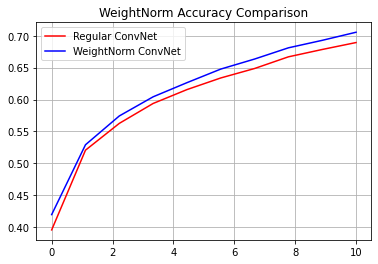

In [11]:
reg_accuracy = reg_history.history['accuracy']
wn_accuracy = wn_history.history['accuracy']

plt.plot(np.linspace(0, epochs,  epochs), reg_accuracy,
             color='red', label='Regular ConvNet')

plt.plot(np.linspace(0, epochs, epochs), wn_accuracy,
         color='blue', label='WeightNorm ConvNet')

plt.title('WeightNorm Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()